In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('./drive/MyDrive/CCS3')

Mounted at /content/drive


# CCS3 Project

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

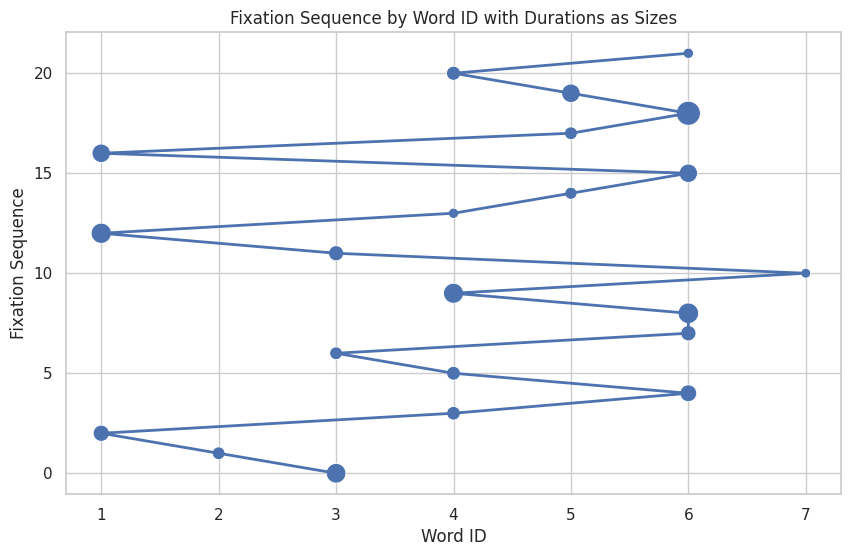

In [ ]:
sns.set(style="whitegrid")

word_id = [3, 2, 1, 4, 6, 4, 3, 6, 6, 4, 7, 3, 1, 4, 5, 6, 1, 5, 6, 5, 4, 6]
durations = [390, 199, 284, 219, 302, 222, 199, 260, 421, 403, 143, 256, 410, 150, 186, 350, 351, 200, 557, 352, 230, 152]

word_np = np.array(word_id)
durations_np = np.array(durations)
sizes = (durations_np - durations_np.min()) / (durations_np.max() - durations_np.min()) * 1000

plt.figure(figsize=(10, 6))

sns.scatterplot(x=word_np, y=np.arange(len(word_id)), marker='o', size=sizes, legend=False ,sizes=(50, 300))
plt.plot(word_np, np.arange(len(word_id)), linestyle='-', linewidth=2)

plt.xlabel('Word ID')
plt.ylabel('Fixation Sequence')
plt.title('Fixation Sequence by Word ID with Durations as Sizes')

plt.savefig('scanpath.svg', format='svg');

## Data Preprocessing

### Text

In [ ]:
data_text = pd.read_csv('text_and_annotations.csv')
print(f'Length of data:{len(data_text)}')

Length of data:994


In [ ]:
print(f'Negative data:{(data_text.Default_Polarity == -1).sum()}, Positive data:{(data_text.Default_Polarity == 1).sum()}')

Negative data:611, Positive data:383


In [ ]:
text_length = data_text['Text'].map(lambda x:len(x))
print(f'The mean text length:{text_length.mean()}, the min text length:{text_length.min()}, the max text length:{text_length.max()}, the std of data: {text_length.std()}')

The mean text length:124.52313883299799, the min text length:28, the max text length:997, the std of data: 83.97872919080376


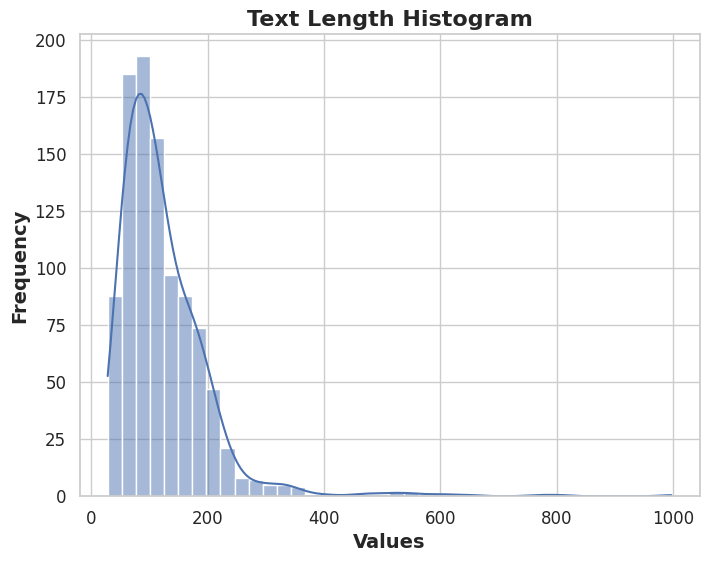

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(text_length, bins=40, kde=True)

# Add labels and a title
plt.xlabel('Values', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Text Length Histogram', fontsize=16, fontweight='bold')

# Customize the tick labels and their font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [ ]:
acc = None
for i in range(1,8):
  pred = (data_text['P'+str(i)] == data_text['Default_Polarity']).astype(int)
  if acc is not None:
    acc += pred
  else:
    acc = pred
print(f'Training samples:{acc.sum()}')
print(f'Mean human accuracy:{(acc / 7).mean()}')

Training samples:5997
Mean human accuracy:0.8618855993101466


### ScanPath


In [ ]:
data_fixation = pd.read_csv('fixation_sequence.csv')
print(f'Length of data:{len(data_fixation)}')

Length of data:161003


In [ ]:
fixation_length = data_fixation.groupby(['Participant_ID', 'Text_ID'])['Word'].apply(lambda x:len(x))
print(f'The mean fixation token length:{fixation_length.mean()}, the min length:{fixation_length.min()}, the max length:{fixation_length.max()}, the std: {fixation_length.std()}')

The mean fixation token length:23.607478005865104, the min length:2, the max length:161, the std: 14.857341951304743


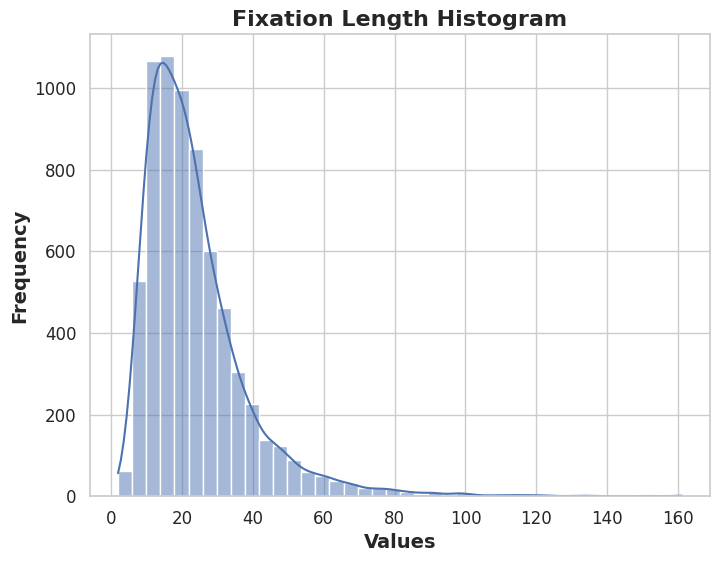

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(fixation_length, bins=40, kde=True)

# Add labels and a title
plt.xlabel('Values', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Fixation Length Histogram', fontsize=16, fontweight='bold')

# Customize the tick labels and their font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [ ]:
fixation_duration = data_fixation['Fixation_Duration']
print(f'The mean fixation duration:{fixation_duration.mean()}, the min duration:{fixation_duration.min()}, the max duration:{fixation_duration.max()}, the std: {fixation_duration.std()}')

The mean fixation duration:213.16136966391932, the min duration:0, the max duration:2790, the std: 98.47405674602318


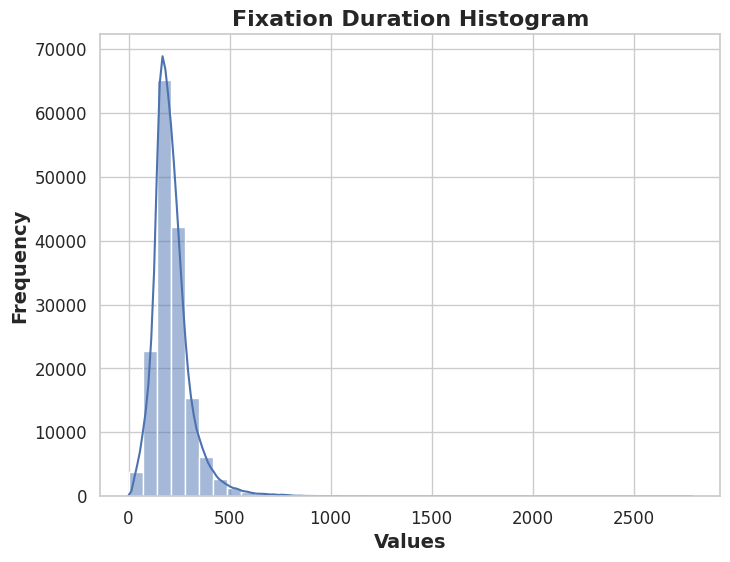

In [ ]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(fixation_duration, bins=40, kde=True)

# Add labels and a title
plt.xlabel('Values', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Fixation Duration Histogram', fontsize=16, fontweight='bold')

# Customize the tick labels and their font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

### Human Performance

In [ ]:
pred_total = []
true_total = []
for i in range(1,8):
  pred = data_text["P"+str(i)].tolist()
  true = data_text['Default_Polarity'].tolist()

  pred_total += pred
  true_total += true
len(pred_total), len(true_total)

(6958, 6958)

In [ ]:
from sklearn.metrics import confusion_matrix

cmat = confusion_matrix(true_total, pred_total)
tp = np.diag(cmat)
fp = (cmat.sum(0) - tp)
fn = (cmat.sum(1) - tp)
acc = (np.diag(cmat).sum() / cmat.sum())
pr = tp / (tp + fp)
re = tp / (tp + fn)
f1 = 2 * ((pr * re) / (pr + re))
print(f'Acc:{acc:.4f}, Pr/0:{pr[0]:.4f}, Pr/1:{pr[1]:.4f}, Re/0:{re[0]:.4f}, Re/1:{re[1]:.4f}, F1/0:{f1[0]:.4f}, F1/1:{f1[1]:.4f}')

Acc:0.8619, Pr/0:0.9062, Pr/1:0.7990, Re/0:0.8649, Re/1:0.8571, F1/0:0.8850, F1/1:0.8271


### Data Cleaning

In [ ]:
# Remove aspect
data_fixation = data_fixation[data_fixation['Word_ID'] != 1]
data_fixation = data_fixation.dropna()
data_fixation.head()

,Participant_ID,Text_ID,Word_ID,Word,Fixation_Duration
1,P1,1,3,work,275
2,P1,1,3,work,227
3,P1,1,4,40,219
4,P1,1,5,hours,211
5,P1,1,7,week,239


### Pre-save Data

In [ ]:
import os
import torch
from torch.utils.data import DataLoader, Dataset

from transformers import DistilBertModel, DistilBertTokenizerFast

In [ ]:
# Load the pre-trained DistilBERT model
model_name = "distilbert-base-uncased"

# Load the tokenizer for DistilBERT
tokenizer = DistilBertTokenizerFast.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
text = "You have delighted us long enough."
tokenizer.tokenize(text)

['you', 'have', 'delighted', 'us', 'long', 'enough', '.']

In [ ]:
import pdb
from tqdm import tqdm
save_path='./samples'
max_len = 400
cnt = 0

if not os.path.exists(save_path):
  os.mkdir(save_path)
for index, data in tqdm(data_text.iterrows()):
  for i in range(1,8):
    if data['P'+str(i)] == data['Default_Polarity']:
      sample = {}

      tokens = tokenizer(data['Text'], padding='max_length', max_length=max_len, truncation=True, return_tensors='pt', return_offsets_mapping=True)
      sample['inputs'] = tokens['input_ids']
      sample['masks'] = tokens['attention_mask']
      sample['label'] = torch.tensor([0 if data['Default_Polarity'] == -1 else 1], dtype=torch.float16)
      # Fetch scanpath
      indices = []
      durations = []
      filter = (data_fixation.Participant_ID == 'P'+str(i)) & (data_fixation.Text_ID == data.Text_ID)
      offsets = tokens['offset_mapping'].squeeze(0)
      fixations = data_fixation[filter]
      for _, row in fixations.iterrows():
        for idx, offset in enumerate(offsets):
          try:
            token = data['Text'][offset[0]:offset[1]]
            if len(token) > 0 and token in row['Word']:
              indices.append(idx)
              durations.append(row['Fixation_Duration'])
          except:
            pdb.set_trace()
      if len(indices) == 0:
        continue
      sample['indices'] = torch.tensor(indices)
      sample['durations'] = torch.tensor(durations)
      torch.save(sample, os.path.join(save_path, 'sample_'+str(cnt)+'.pt'))
      cnt += 1

994it [13:52,  1.19it/s]


In [ ]:
import glob

files = glob.glob('./samples/*.pt')
len(files)

5989

### Data Split

In [ ]:
train_split = 0.7

idx = np.arange(len(files))
np.random.shuffle(idx)
split = int(train_split*len(files))

train_idx = idx[:split]
val_idx = idx[split:]
len(train_idx), len(val_idx)

(4192, 1797)

## Dataset

In [ ]:
class SentimentAnalysisDataset(Dataset):
    def __init__(self, idx, max_len=200, save_path='./samples'):
      self.indices = idx
      self.save_path = save_path
      self.max_len = max_len

    def __len__(self):
      return len(self.indices)

    def __getitem__(self, idx):
      data_path = os.path.join(self.save_path,'sample_'+str(self.indices[idx])+'.pt')
      sample = torch.load(data_path)
      return sample

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_dataset = SentimentAnalysisDataset(train_idx)
val_dataset = SentimentAnalysisDataset(val_idx)

## Train

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence

from torchmetrics import ConfusionMatrix
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm
import pdb

### Model

In [ ]:
# Positional Encoding
class PositionalEncoding(nn.Module):
  def __init__(self, d_model, max_seq_length=2048):
      super(PositionalEncoding, self).__init__()

      # Compute positional encodings for up to max_seq_length positions
      pe = torch.zeros(max_seq_length, d_model)
      position = torch.arange(0, max_seq_length, dtype=torch.float32).unsqueeze(1)
      div_term = torch.exp(torch.arange(0, d_model, 2, dtype=torch.float32) * -(np.log(10000.0) / d_model))

      pe[:, 0::2] = torch.sin(position * div_term)
      pe[:, 1::2] = torch.cos(position * div_term)
      pe = pe.unsqueeze(0)  # Add a batch dimension

      self.register_buffer('pe', pe)

  def forward(self, x):
      # Add positional encodings to the input tensor 'x'
      return torch.cat((x, self.pe[:, :x.size(1)].expand(x.size(0), -1, -1)), dim=2)

In [ ]:
class OurModel(nn.Module):
  def __init__(self, bert, mode, hidden_size=768):
    super(OurModel, self).__init__()
    self.bert = bert
    self.mode = mode
    self.pe = PositionalEncoding(hidden_size)
    if mode == 'text-only':
      self.transformer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=1, batch_first=True)
      self.linear = nn.Linear(hidden_size, 1)
    elif mode == 'scanpath-only':
      self.transformer = nn.TransformerEncoderLayer(d_model=2*hidden_size, nhead=1, batch_first=True)
      self.linear = nn.Linear(2*hidden_size, 1)
    elif mode == 'duration-only':
      self.transformer = nn.TransformerEncoderLayer(d_model=2*hidden_size, nhead=1, batch_first=True)
      self.duration_transform = nn.Sequential(nn.Linear(1, hidden_size),
                           nn.ReLU(),
                           nn.Linear(hidden_size, hidden_size),
                           nn.Sigmoid())
      self.linear = nn.Linear(2*hidden_size, 1)
    else:
      self.transformer = nn.TransformerEncoderLayer(d_model=3*hidden_size, nhead=1, batch_first=True)
      self.duration_transform = nn.Sequential(nn.Linear(1, hidden_size),
                           nn.ReLU(),
                           nn.Linear(hidden_size, hidden_size),
                           nn.Sigmoid())
      self.linear = nn.Linear(3*hidden_size, 1)

    self.sigmoid = nn.Sigmoid()

    for param in self.bert.parameters():
      param.requires_grad = False

  def forward(self, batch):
    x = self.bert(batch['inputs'], batch['masks'])

    # Slice scanpath and pad them
    x = [torch.index_select(output, 0, indices) for output, indices in zip(x['last_hidden_state'], batch['indices'])]
    x = pad_sequence(x, batch_first=True, padding_value=0)

    mask = (x.sum(dim=2) == 0)
    if self.mode == 'text-only':
      pass
    elif self.mode == 'scanpath-only':
      x = self.pe(x)
    elif self.mode == 'duration-only':
      durations = pad_sequence(batch['durations'], batch_first=True, padding_value=0).unsqueeze(-1).to(torch.float32)
      durations = self.duration_transform(durations)
      x = torch.cat((x, durations),dim=2)
    else:
      x = self.pe(x)
      durations = pad_sequence(batch['durations'], batch_first=True, padding_value=0).unsqueeze(-1).to(torch.float32)
      durations = self.duration_transform(durations)
      x = torch.cat((x, durations),dim=2)

    # Create mask for transformer
    x = self.transformer(x, src_key_padding_mask=mask)

    # Extract using indices
    x = torch.stack([output[:len(idx),:].mean(0) for output, idx in zip(x, batch['indices'])],dim=0)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x.squeeze(1)

### Hyperparameters

In [ ]:
model_name = "distilbert-base-uncased"

bert = DistilBertModel.from_pretrained(model_name)
model = OurModel(bert, 'text-only').to(device)

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
lr = 1e-5
n_epochs = 5
batch_size = 32
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
criterion = nn.BCELoss()

### DataLoader

In [ ]:
def collate_fn(batch):
    inputs = [item["inputs"] for item in batch]
    masks = [item["masks"] for item in batch]
    labels = [item["label"] for item in batch]
    indices = [torch.tensor(item["indices"]).to(torch.int64).to(device) for item in batch]
    durations = [torch.tensor(item["durations"]).to(device) for item in batch]

    # Convert the lists of inputs, masks, and labels into tensors
    inputs = torch.stack(inputs, dim=0).squeeze(1).to(device)
    masks = torch.stack(masks, dim=0).squeeze(1).to(device)
    labels = torch.tensor(labels).to(torch.float32).to(device)

    return {
        "inputs": inputs,
        "masks": masks,
        "labels": labels,
        "indices": indices,
        "durations": durations
    }

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False)

### Training Functions

In [ ]:
def train_loop(model, train_loader, optimizer, criterion, epoch):
  model.train()
  train_loss = 0.0

  for batch in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{n_epochs}"):
    # Forward
    pred = model(batch)
    loss = criterion(pred, batch['labels'])
    print(f'Loss: {loss.item():.4f}')

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Update the training loss
    train_loss += loss.item()

  train_loss /= len(train_loader)
  print(f"Epoch {epoch+1}/{n_epochs}, Training Loss: {train_loss:.4f}")

  return train_loss

def evaluate(model, val_loader, criterion, epoch):
  model.eval()
  val_loss = 0.0
  acc = 0.0
  pr = torch.zeros(1,2)
  re = torch.zeros(1,2)
  metrics = ConfusionMatrix(task="binary", num_classes=2)

  for batch in tqdm(val_loader, desc=f"Evaluating Epoch {epoch+1}/{n_epochs}"):
    with torch.no_grad():
      # Forward
      pred = model(batch)
      loss = criterion(pred, batch['labels'])
      pred = (pred > 0.5)

      # Update the training loss
      val_loss += loss.item()

      # Evaluation Metrics
      cmat = metrics(pred.to(torch.int8).cpu(), batch['labels'].to(torch.int8).cpu())
      tp = torch.diag(cmat)
      fp = (cmat.sum(0) - tp)
      fn = (cmat.sum(1) - tp)
      acc += (torch.diag(cmat).sum() / cmat.sum()).item()
      pr += tp / (tp + fp + torch.finfo(torch.float32).eps)
      re += tp / (tp + fn + torch.finfo(torch.float32).eps)


  # Average metrics
  acc /= len(val_loader)
  pr = (pr/len(val_loader)).squeeze().numpy()
  re = (re/len(val_loader)).squeeze().numpy()
  f1 = 2 * ((pr * re) / (pr + re))
  val_loss /= len(val_loader)

  # Print
  print(f"Epoch {epoch+1}/{n_epochs}, Validation Loss: {val_loss:.4f}")
  print(f'Accuracy: {acc:.4f}')
  print(f'Precision/0: {pr[0]:.4f}')
  print(f'Precision/1: {pr[1]:.4f}')
  print(f'Recall/0: {re[0]:.4f}')
  print(f'Recall/1: {re[1]:.4f}')
  print(f'F1/0: {f1[0]:.4f}')
  print(f'F1/1: {f1[1]:.4f}')

  return val_loss, acc, pr, re, f1

def train(model, train_loader, val_loader, optimizer, criterion, n_epochs):
  # Initialize Tensorboard
  for epoch in range(n_epochs):
    # Training
    train_loss = train_loop(model, train_loader, optimizer, criterion, epoch)

    # Evaluating
    val_loss, accuracy, precision, recall, f1 = evaluate(model, val_loader, criterion, epoch)

### Text Only

In [ ]:
train(model, train_loader, val_loader, optimizer, criterion, n_epochs)

Training Epoch 1/5:   0%|          | 0/131 [00:00<?, ?it/s]<ipython-input-40-ad3904b61c96>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  indices = [torch.tensor(item["indices"]).to(torch.int64).to(device) for item in batch]
<ipython-input-40-ad3904b61c96>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  durations = [torch.tensor(item["durations"]).to(device) for item in batch]
Training Epoch 1/5:   1%|          | 1/131 [00:00<01:08,  1.89it/s]

Loss: 0.7141


Training Epoch 1/5:   2%|▏         | 2/131 [00:01<01:06,  1.93it/s]

Loss: 0.6362


Training Epoch 1/5:   2%|▏         | 3/131 [00:01<01:03,  2.00it/s]

Loss: 0.6817


Training Epoch 1/5:   3%|▎         | 4/131 [00:02<01:04,  1.96it/s]

Loss: 0.7001


Training Epoch 1/5:   4%|▍         | 5/131 [00:02<01:05,  1.93it/s]

Loss: 0.6549


Training Epoch 1/5:   5%|▍         | 6/131 [00:03<01:10,  1.78it/s]

Loss: 0.6716
Loss: 0.6584


Training Epoch 1/5:   6%|▌         | 8/131 [00:04<01:13,  1.67it/s]

Loss: 0.6151


Training Epoch 1/5:   7%|▋         | 9/131 [00:05<01:09,  1.74it/s]

Loss: 0.6708


Training Epoch 1/5:   8%|▊         | 10/131 [00:05<01:06,  1.81it/s]

Loss: 0.5945


Training Epoch 1/5:   8%|▊         | 11/131 [00:06<01:04,  1.86it/s]

Loss: 0.6019


Training Epoch 1/5:   9%|▉         | 12/131 [00:06<01:02,  1.91it/s]

Loss: 0.6319


Training Epoch 1/5:  10%|▉         | 13/131 [00:07<01:06,  1.78it/s]

Loss: 0.5782


Training Epoch 1/5:  11%|█         | 14/131 [00:07<01:05,  1.78it/s]

Loss: 0.6939


Training Epoch 1/5:  11%|█▏        | 15/131 [00:08<01:08,  1.69it/s]

Loss: 0.6124


Training Epoch 1/5:  12%|█▏        | 16/131 [00:08<01:04,  1.78it/s]

Loss: 0.5578


Training Epoch 1/5:  13%|█▎        | 17/131 [00:09<01:02,  1.82it/s]

Loss: 0.7551


Training Epoch 1/5:  14%|█▎        | 18/131 [00:09<01:01,  1.85it/s]

Loss: 0.5736


Training Epoch 1/5:  15%|█▍        | 19/131 [00:10<01:03,  1.78it/s]

Loss: 0.6832


Training Epoch 1/5:  15%|█▌        | 20/131 [00:11<01:02,  1.77it/s]

Loss: 0.6017


Training Epoch 1/5:  16%|█▌        | 21/131 [00:11<01:00,  1.83it/s]

Loss: 0.6831


Training Epoch 1/5:  17%|█▋        | 22/131 [00:12<01:00,  1.81it/s]

Loss: 0.6136


Training Epoch 1/5:  18%|█▊        | 23/131 [00:12<00:58,  1.86it/s]

Loss: 0.5611


Training Epoch 1/5:  18%|█▊        | 24/131 [00:13<01:00,  1.77it/s]

Loss: 0.6691


Training Epoch 1/5:  19%|█▉        | 25/131 [00:13<00:58,  1.82it/s]

Loss: 0.6239


Training Epoch 1/5:  20%|█▉        | 26/131 [00:14<01:03,  1.65it/s]

Loss: 0.5817


Training Epoch 1/5:  21%|██        | 27/131 [00:15<01:00,  1.71it/s]

Loss: 0.6725


Training Epoch 1/5:  21%|██▏       | 28/131 [00:15<00:58,  1.75it/s]

Loss: 0.7686


Training Epoch 1/5:  22%|██▏       | 29/131 [00:16<00:55,  1.82it/s]

Loss: 0.6231


Training Epoch 1/5:  23%|██▎       | 30/131 [00:16<00:53,  1.89it/s]

Loss: 0.6078


Training Epoch 1/5:  24%|██▎       | 31/131 [00:17<00:54,  1.84it/s]

Loss: 0.6432


Training Epoch 1/5:  24%|██▍       | 32/131 [00:17<00:52,  1.88it/s]

Loss: 0.6259


Training Epoch 1/5:  25%|██▌       | 33/131 [00:18<00:50,  1.93it/s]

Loss: 0.6219


Training Epoch 1/5:  26%|██▌       | 34/131 [00:18<00:50,  1.94it/s]

Loss: 0.5345


Training Epoch 1/5:  27%|██▋       | 35/131 [00:19<00:49,  1.93it/s]

Loss: 0.5876


Training Epoch 1/5:  27%|██▋       | 36/131 [00:19<00:51,  1.84it/s]

Loss: 0.6109


Training Epoch 1/5:  28%|██▊       | 37/131 [00:20<00:53,  1.76it/s]

Loss: 0.5728


Training Epoch 1/5:  29%|██▉       | 38/131 [00:20<00:51,  1.82it/s]

Loss: 0.6026


Training Epoch 1/5:  30%|██▉       | 39/131 [00:21<00:49,  1.87it/s]

Loss: 0.5629


Training Epoch 1/5:  31%|███       | 40/131 [00:22<00:47,  1.90it/s]

Loss: 0.6378


Training Epoch 1/5:  31%|███▏      | 41/131 [00:22<00:48,  1.86it/s]

Loss: 0.5549


Training Epoch 1/5:  32%|███▏      | 42/131 [00:23<00:47,  1.87it/s]

Loss: 0.6084


Training Epoch 1/5:  33%|███▎      | 43/131 [00:23<00:47,  1.87it/s]

Loss: 0.6299


Training Epoch 1/5:  34%|███▎      | 44/131 [00:24<00:49,  1.74it/s]

Loss: 0.5742


Training Epoch 1/5:  34%|███▍      | 45/131 [00:24<00:48,  1.76it/s]

Loss: 0.6067


Training Epoch 1/5:  35%|███▌      | 46/131 [00:25<00:50,  1.68it/s]

Loss: 0.5835


Training Epoch 1/5:  36%|███▌      | 47/131 [00:26<00:54,  1.53it/s]

Loss: 0.4861


Training Epoch 1/5:  37%|███▋      | 48/131 [00:26<00:50,  1.64it/s]

Loss: 0.5999


Training Epoch 1/5:  37%|███▋      | 49/131 [00:27<00:49,  1.67it/s]

Loss: 0.6127


Training Epoch 1/5:  38%|███▊      | 50/131 [00:28<00:49,  1.64it/s]

Loss: 0.5785


Training Epoch 1/5:  39%|███▉      | 51/131 [00:28<00:47,  1.69it/s]

Loss: 0.5995


Training Epoch 1/5:  40%|███▉      | 52/131 [00:29<00:45,  1.72it/s]

Loss: 0.5769


Training Epoch 1/5:  40%|████      | 53/131 [00:29<00:43,  1.77it/s]

Loss: 0.6490


Training Epoch 1/5:  41%|████      | 54/131 [00:30<00:43,  1.78it/s]

Loss: 0.5554


Training Epoch 1/5:  42%|████▏     | 55/131 [00:30<00:41,  1.84it/s]

Loss: 0.5387


Training Epoch 1/5:  43%|████▎     | 56/131 [00:31<00:42,  1.78it/s]

Loss: 0.5700


Training Epoch 1/5:  44%|████▎     | 57/131 [00:31<00:40,  1.81it/s]

Loss: 0.5358


Training Epoch 1/5:  44%|████▍     | 58/131 [00:32<00:39,  1.86it/s]

Loss: 0.4757


Training Epoch 1/5:  45%|████▌     | 59/131 [00:32<00:37,  1.91it/s]

Loss: 0.5352


Training Epoch 1/5:  46%|████▌     | 60/131 [00:33<00:40,  1.75it/s]

Loss: 0.4960


Training Epoch 1/5:  47%|████▋     | 61/131 [00:34<00:39,  1.79it/s]

Loss: 0.5017


Training Epoch 1/5:  47%|████▋     | 62/131 [00:34<00:37,  1.86it/s]

Loss: 0.5430


Training Epoch 1/5:  48%|████▊     | 63/131 [00:35<00:35,  1.91it/s]

Loss: 0.6074
Loss: 0.5167


Training Epoch 1/5:  50%|████▉     | 65/131 [00:36<00:37,  1.76it/s]

Loss: 0.5752


Training Epoch 1/5:  50%|█████     | 66/131 [00:36<00:35,  1.83it/s]

Loss: 0.4785


Training Epoch 1/5:  51%|█████     | 67/131 [00:37<00:37,  1.71it/s]

Loss: 0.5033


Training Epoch 1/5:  52%|█████▏    | 68/131 [00:38<00:39,  1.60it/s]

Loss: 0.5771
Loss: 0.5396


Training Epoch 1/5:  53%|█████▎    | 70/131 [00:39<00:37,  1.61it/s]

Loss: 0.6419


Training Epoch 1/5:  54%|█████▍    | 71/131 [00:39<00:35,  1.70it/s]

Loss: 0.5676


Training Epoch 1/5:  55%|█████▍    | 72/131 [00:40<00:34,  1.71it/s]

Loss: 0.6011


Training Epoch 1/5:  56%|█████▌    | 73/131 [00:41<00:32,  1.76it/s]

Loss: 0.5162


Training Epoch 1/5:  56%|█████▋    | 74/131 [00:41<00:31,  1.83it/s]

Loss: 0.4724


Training Epoch 1/5:  57%|█████▋    | 75/131 [00:42<00:30,  1.85it/s]

Loss: 0.4816


Training Epoch 1/5:  58%|█████▊    | 76/131 [00:42<00:32,  1.70it/s]

Loss: 0.5150


Training Epoch 1/5:  59%|█████▉    | 77/131 [00:43<00:31,  1.71it/s]

Loss: 0.6056


Training Epoch 1/5:  60%|█████▉    | 78/131 [00:44<00:32,  1.63it/s]

Loss: 0.5854
Loss: 0.5889


Training Epoch 1/5:  61%|██████    | 80/131 [00:45<00:35,  1.42it/s]

Loss: 0.6148


Training Epoch 1/5:  62%|██████▏   | 81/131 [00:46<00:32,  1.52it/s]

Loss: 0.5727


Training Epoch 1/5:  63%|██████▎   | 82/131 [00:46<00:30,  1.62it/s]

Loss: 0.5791


Training Epoch 1/5:  63%|██████▎   | 83/131 [00:47<00:28,  1.68it/s]

Loss: 0.4862


Training Epoch 1/5:  64%|██████▍   | 84/131 [00:47<00:27,  1.74it/s]

Loss: 0.4969


Training Epoch 1/5:  65%|██████▍   | 85/131 [00:48<00:25,  1.83it/s]

Loss: 0.4830


Training Epoch 1/5:  66%|██████▌   | 86/131 [00:49<00:26,  1.67it/s]

Loss: 0.5598


Training Epoch 1/5:  66%|██████▋   | 87/131 [00:49<00:24,  1.76it/s]

Loss: 0.4894


Training Epoch 1/5:  67%|██████▋   | 88/131 [00:50<00:26,  1.65it/s]

Loss: 0.4721


Training Epoch 1/5:  68%|██████▊   | 89/131 [00:50<00:24,  1.74it/s]

Loss: 0.5013


Training Epoch 1/5:  69%|██████▊   | 90/131 [00:51<00:22,  1.83it/s]

Loss: 0.5144


Training Epoch 1/5:  69%|██████▉   | 91/131 [00:51<00:21,  1.89it/s]

Loss: 0.5759


Training Epoch 1/5:  70%|███████   | 92/131 [00:52<00:20,  1.90it/s]

Loss: 0.4749


Training Epoch 1/5:  71%|███████   | 93/131 [00:52<00:19,  1.92it/s]

Loss: 0.4271


Training Epoch 1/5:  72%|███████▏  | 94/131 [00:53<00:19,  1.93it/s]

Loss: 0.5554


Training Epoch 1/5:  73%|███████▎  | 95/131 [00:53<00:18,  1.95it/s]

Loss: 0.4475


Training Epoch 1/5:  73%|███████▎  | 96/131 [00:54<00:22,  1.58it/s]

Loss: 0.4799


Training Epoch 1/5:  74%|███████▍  | 97/131 [00:55<00:20,  1.64it/s]

Loss: 0.4770


Training Epoch 1/5:  75%|███████▍  | 98/131 [00:55<00:18,  1.76it/s]

Loss: 0.5360


Training Epoch 1/5:  76%|███████▌  | 99/131 [00:56<00:18,  1.71it/s]

Loss: 0.4787


Training Epoch 1/5:  76%|███████▋  | 100/131 [00:57<00:19,  1.60it/s]

Loss: 0.4736


Training Epoch 1/5:  77%|███████▋  | 101/131 [00:57<00:17,  1.69it/s]

Loss: 0.4670


Training Epoch 1/5:  78%|███████▊  | 102/131 [00:58<00:16,  1.77it/s]

Loss: 0.4966


Training Epoch 1/5:  79%|███████▊  | 103/131 [00:58<00:15,  1.86it/s]

Loss: 0.6155


Training Epoch 1/5:  79%|███████▉  | 104/131 [00:59<00:14,  1.88it/s]

Loss: 0.5323


Training Epoch 1/5:  80%|████████  | 105/131 [00:59<00:14,  1.82it/s]

Loss: 0.4694


Training Epoch 1/5:  81%|████████  | 106/131 [01:00<00:13,  1.82it/s]

Loss: 0.4886


Training Epoch 1/5:  82%|████████▏ | 107/131 [01:00<00:13,  1.75it/s]

Loss: 0.5727
Loss: 0.4776


Training Epoch 1/5:  83%|████████▎ | 109/131 [01:02<00:15,  1.39it/s]

Loss: 0.4817


Training Epoch 1/5:  84%|████████▍ | 110/131 [01:03<00:13,  1.52it/s]

Loss: 0.4879


Training Epoch 1/5:  85%|████████▍ | 111/131 [01:03<00:12,  1.62it/s]

Loss: 0.5280


Training Epoch 1/5:  85%|████████▌ | 112/131 [01:04<00:10,  1.74it/s]

Loss: 0.4789


Training Epoch 1/5:  86%|████████▋ | 113/131 [01:04<00:09,  1.81it/s]

Loss: 0.4747


Training Epoch 1/5:  87%|████████▋ | 114/131 [01:05<00:08,  1.90it/s]

Loss: 0.3594


Training Epoch 1/5:  88%|████████▊ | 115/131 [01:05<00:08,  1.91it/s]

Loss: 0.3753


Training Epoch 1/5:  89%|████████▊ | 116/131 [01:06<00:07,  1.96it/s]

Loss: 0.4043


Training Epoch 1/5:  89%|████████▉ | 117/131 [01:06<00:07,  2.00it/s]

Loss: 0.3956


Training Epoch 1/5:  90%|█████████ | 118/131 [01:07<00:06,  2.04it/s]

Loss: 0.4906


Training Epoch 1/5:  91%|█████████ | 119/131 [01:07<00:05,  2.07it/s]

Loss: 0.4792


Training Epoch 1/5:  92%|█████████▏| 120/131 [01:08<00:05,  2.04it/s]

Loss: 0.4732


Training Epoch 1/5:  92%|█████████▏| 121/131 [01:08<00:05,  1.85it/s]

Loss: 0.5525


Training Epoch 1/5:  93%|█████████▎| 122/131 [01:09<00:04,  1.91it/s]

Loss: 0.5152


Training Epoch 1/5:  94%|█████████▍| 123/131 [01:09<00:04,  1.94it/s]

Loss: 0.5043
Loss: 0.5015


Training Epoch 1/5:  95%|█████████▌| 125/131 [01:10<00:03,  1.77it/s]

Loss: 0.5046


Training Epoch 1/5:  96%|█████████▌| 126/131 [01:11<00:02,  1.84it/s]

Loss: 0.3325


Training Epoch 1/5:  97%|█████████▋| 127/131 [01:11<00:02,  1.90it/s]

Loss: 0.4478


Training Epoch 1/5:  98%|█████████▊| 128/131 [01:12<00:01,  1.95it/s]

Loss: 0.4470


Training Epoch 1/5:  98%|█████████▊| 129/131 [01:12<00:01,  1.95it/s]

Loss: 0.4107


Training Epoch 1/5:  99%|█████████▉| 130/131 [01:13<00:00,  2.01it/s]

Loss: 0.3981


Training Epoch 1/5: 100%|██████████| 131/131 [01:13<00:00,  1.77it/s]


Loss: 0.4312
Epoch 1/5, Training Loss: 0.5524


Evaluating Epoch 1/5: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]


Epoch 1/5, Validation Loss: 0.4532
Accuracy: 0.8071
Precision/0: 0.8021
Precision/1: 0.8336
Recall/0: 0.9259
Recall/1: 0.6164
F1/0: 0.8596
F1/1: 0.7088


Training Epoch 2/5:   1%|          | 1/131 [00:00<01:03,  2.06it/s]

Loss: 0.5125


Training Epoch 2/5:   2%|▏         | 2/131 [00:01<01:05,  1.97it/s]

Loss: 0.4106


Training Epoch 2/5:   2%|▏         | 3/131 [00:01<01:03,  2.01it/s]

Loss: 0.5812


Training Epoch 2/5:   3%|▎         | 4/131 [00:02<01:09,  1.82it/s]

Loss: 0.5227
Loss: 0.4285


Training Epoch 2/5:   5%|▍         | 6/131 [00:04<01:34,  1.33it/s]

Loss: 0.4331


Training Epoch 2/5:   5%|▌         | 7/131 [00:04<01:23,  1.49it/s]

Loss: 0.4673


Training Epoch 2/5:   6%|▌         | 8/131 [00:05<01:15,  1.62it/s]

Loss: 0.3744


Training Epoch 2/5:   7%|▋         | 9/131 [00:05<01:10,  1.72it/s]

Loss: 0.3471


Training Epoch 2/5:   8%|▊         | 10/131 [00:06<01:08,  1.78it/s]

Loss: 0.3310


Training Epoch 2/5:   8%|▊         | 11/131 [00:06<01:05,  1.82it/s]

Loss: 0.4441


Training Epoch 2/5:   9%|▉         | 12/131 [00:07<01:06,  1.79it/s]

Loss: 0.4454


Training Epoch 2/5:  10%|▉         | 13/131 [00:07<01:09,  1.69it/s]

Loss: 0.4729


Training Epoch 2/5:  11%|█         | 14/131 [00:08<01:04,  1.80it/s]

Loss: 0.3612


Training Epoch 2/5:  11%|█▏        | 15/131 [00:08<01:03,  1.84it/s]

Loss: 0.4667


Training Epoch 2/5:  12%|█▏        | 16/131 [00:09<01:02,  1.83it/s]

Loss: 0.3469


Training Epoch 2/5:  13%|█▎        | 17/131 [00:09<01:00,  1.87it/s]

Loss: 0.3759


Training Epoch 2/5:  14%|█▎        | 18/131 [00:10<01:00,  1.86it/s]

Loss: 0.4064


Training Epoch 2/5:  15%|█▍        | 19/131 [00:10<00:58,  1.92it/s]

Loss: 0.3639


Training Epoch 2/5:  15%|█▌        | 20/131 [00:11<01:03,  1.75it/s]

Loss: 0.3398


Training Epoch 2/5:  16%|█▌        | 21/131 [00:12<01:00,  1.82it/s]

Loss: 0.4331


Training Epoch 2/5:  17%|█▋        | 22/131 [00:12<00:58,  1.86it/s]

Loss: 0.3402


Training Epoch 2/5:  18%|█▊        | 23/131 [00:13<01:00,  1.79it/s]

Loss: 0.4080


Training Epoch 2/5:  18%|█▊        | 24/131 [00:13<00:58,  1.84it/s]

Loss: 0.3914


Training Epoch 2/5:  19%|█▉        | 25/131 [00:14<00:59,  1.77it/s]

Loss: 0.3861


Training Epoch 2/5:  20%|█▉        | 26/131 [00:15<01:03,  1.66it/s]

Loss: 0.4644


Training Epoch 2/5:  21%|██        | 27/131 [00:15<01:00,  1.73it/s]

Loss: 0.4380


Training Epoch 2/5:  21%|██▏       | 28/131 [00:16<00:57,  1.81it/s]

Loss: 0.5001


Training Epoch 2/5:  22%|██▏       | 29/131 [00:16<00:55,  1.82it/s]

Loss: 0.4809


Training Epoch 2/5:  23%|██▎       | 30/131 [00:17<00:54,  1.84it/s]

Loss: 0.5624


Training Epoch 2/5:  24%|██▎       | 31/131 [00:17<00:52,  1.91it/s]

Loss: 0.3148


Training Epoch 2/5:  24%|██▍       | 32/131 [00:18<00:51,  1.92it/s]

Loss: 0.4121


Training Epoch 2/5:  25%|██▌       | 33/131 [00:18<00:50,  1.96it/s]

Loss: 0.3106
Loss: 0.6404


Training Epoch 2/5:  27%|██▋       | 35/131 [00:19<00:53,  1.79it/s]

Loss: 0.4069


Training Epoch 2/5:  27%|██▋       | 36/131 [00:20<00:53,  1.78it/s]

Loss: 0.4848


Training Epoch 2/5:  28%|██▊       | 37/131 [00:21<00:54,  1.74it/s]

Loss: 0.3778


Training Epoch 2/5:  29%|██▉       | 38/131 [00:21<00:54,  1.71it/s]

Loss: 0.4592


Training Epoch 2/5:  30%|██▉       | 39/131 [00:22<00:51,  1.79it/s]

Loss: 0.3717


Training Epoch 2/5:  31%|███       | 40/131 [00:22<00:51,  1.78it/s]

Loss: 0.5246


Training Epoch 2/5:  31%|███▏      | 41/131 [00:23<00:48,  1.86it/s]

Loss: 0.3339


Training Epoch 2/5:  32%|███▏      | 42/131 [00:23<00:47,  1.87it/s]

Loss: 0.3627


Training Epoch 2/5:  33%|███▎      | 43/131 [00:24<00:46,  1.91it/s]

Loss: 0.4074


Training Epoch 2/5:  34%|███▎      | 44/131 [00:24<00:46,  1.88it/s]

Loss: 0.4218


Training Epoch 2/5:  34%|███▍      | 45/131 [00:25<00:45,  1.87it/s]

Loss: 0.4287


Training Epoch 2/5:  35%|███▌      | 46/131 [00:25<00:44,  1.92it/s]

Loss: 0.2976


Training Epoch 2/5:  36%|███▌      | 47/131 [00:26<00:43,  1.92it/s]

Loss: 0.4153


Training Epoch 2/5:  37%|███▋      | 48/131 [00:26<00:42,  1.95it/s]

Loss: 0.3287


Training Epoch 2/5:  37%|███▋      | 49/131 [00:27<00:41,  1.98it/s]

Loss: 0.4338


Training Epoch 2/5:  38%|███▊      | 50/131 [00:27<00:41,  1.93it/s]

Loss: 0.3925


Training Epoch 2/5:  39%|███▉      | 51/131 [00:28<00:41,  1.93it/s]

Loss: 0.3401


Training Epoch 2/5:  40%|███▉      | 52/131 [00:29<00:43,  1.83it/s]

Loss: 0.5148


Training Epoch 2/5:  40%|████      | 53/131 [00:29<00:44,  1.77it/s]

Loss: 0.3328


Training Epoch 2/5:  41%|████      | 54/131 [00:30<00:42,  1.81it/s]

Loss: 0.3891


Training Epoch 2/5:  42%|████▏     | 55/131 [00:30<00:45,  1.68it/s]

Loss: 0.3519


Training Epoch 2/5:  43%|████▎     | 56/131 [00:31<00:42,  1.77it/s]

Loss: 0.3865


Training Epoch 2/5:  44%|████▎     | 57/131 [00:31<00:40,  1.82it/s]

Loss: 0.4004


Training Epoch 2/5:  44%|████▍     | 58/131 [00:32<00:39,  1.83it/s]

Loss: 0.4160


Training Epoch 2/5:  45%|████▌     | 59/131 [00:32<00:38,  1.88it/s]

Loss: 0.3785


Training Epoch 2/5:  46%|████▌     | 60/131 [00:33<00:36,  1.92it/s]

Loss: 0.3897


Training Epoch 2/5:  47%|████▋     | 61/131 [00:33<00:35,  1.96it/s]

Loss: 0.3591


Training Epoch 2/5:  47%|████▋     | 62/131 [00:34<00:34,  1.98it/s]

Loss: 0.3983


Training Epoch 2/5:  48%|████▊     | 63/131 [00:34<00:35,  1.93it/s]

Loss: 0.4625


Training Epoch 2/5:  49%|████▉     | 64/131 [00:35<00:34,  1.96it/s]

Loss: 0.4973


Training Epoch 2/5:  50%|████▉     | 65/131 [00:35<00:32,  2.01it/s]

Loss: 0.3178


Training Epoch 2/5:  50%|█████     | 66/131 [00:36<00:32,  2.02it/s]

Loss: 0.3509


Training Epoch 2/5:  51%|█████     | 67/131 [00:36<00:31,  2.05it/s]

Loss: 0.3058


Training Epoch 2/5:  52%|█████▏    | 68/131 [00:37<00:32,  1.93it/s]

Loss: 0.5852


Training Epoch 2/5:  53%|█████▎    | 69/131 [00:37<00:31,  1.99it/s]

Loss: 0.3381


Training Epoch 2/5:  53%|█████▎    | 70/131 [00:38<00:30,  1.97it/s]

Loss: 0.2932


Training Epoch 2/5:  54%|█████▍    | 71/131 [00:38<00:29,  2.00it/s]

Loss: 0.3036


Training Epoch 2/5:  55%|█████▍    | 72/131 [00:39<00:29,  2.00it/s]

Loss: 0.3926


Training Epoch 2/5:  56%|█████▌    | 73/131 [00:39<00:30,  1.88it/s]

Loss: 0.3228


Training Epoch 2/5:  56%|█████▋    | 74/131 [00:40<00:32,  1.73it/s]

Loss: 0.6158


Training Epoch 2/5:  57%|█████▋    | 75/131 [00:41<00:33,  1.66it/s]

Loss: 0.4316


Training Epoch 2/5:  58%|█████▊    | 76/131 [00:41<00:31,  1.75it/s]

Loss: 0.2705


Training Epoch 2/5:  59%|█████▉    | 77/131 [00:42<00:30,  1.80it/s]

Loss: 0.3660


Training Epoch 2/5:  60%|█████▉    | 78/131 [00:42<00:28,  1.84it/s]

Loss: 0.2843


Training Epoch 2/5:  60%|██████    | 79/131 [00:43<00:28,  1.85it/s]

Loss: 0.2986


Training Epoch 2/5:  61%|██████    | 80/131 [00:43<00:26,  1.90it/s]

Loss: 0.3774


Training Epoch 2/5:  62%|██████▏   | 81/131 [00:44<00:25,  1.94it/s]

Loss: 0.5560


Training Epoch 2/5:  63%|██████▎   | 82/131 [00:44<00:25,  1.92it/s]

Loss: 0.3232


Training Epoch 2/5:  63%|██████▎   | 83/131 [00:45<00:24,  1.95it/s]

Loss: 0.3749


Training Epoch 2/5:  64%|██████▍   | 84/131 [00:46<00:25,  1.85it/s]

Loss: 0.5275


Training Epoch 2/5:  65%|██████▍   | 85/131 [00:46<00:24,  1.90it/s]

Loss: 0.4537


Training Epoch 2/5:  66%|██████▌   | 86/131 [00:47<00:23,  1.94it/s]

Loss: 0.4375


Training Epoch 2/5:  66%|██████▋   | 87/131 [00:47<00:22,  1.99it/s]

Loss: 0.3873


Training Epoch 2/5:  67%|██████▋   | 88/131 [00:48<00:22,  1.91it/s]

Loss: 0.2655


Training Epoch 2/5:  68%|██████▊   | 89/131 [00:48<00:21,  1.97it/s]

Loss: 0.3651


Training Epoch 2/5:  69%|██████▊   | 90/131 [00:49<00:20,  2.00it/s]

Loss: 0.3164


Training Epoch 2/5:  69%|██████▉   | 91/131 [00:49<00:20,  1.97it/s]

Loss: 0.4224


Training Epoch 2/5:  70%|███████   | 92/131 [00:50<00:19,  2.00it/s]

Loss: 0.2896


Training Epoch 2/5:  71%|███████   | 93/131 [00:50<00:20,  1.83it/s]

Loss: 0.5306


Training Epoch 2/5:  72%|███████▏  | 94/131 [00:51<00:19,  1.90it/s]

Loss: 0.4778


Training Epoch 2/5:  73%|███████▎  | 95/131 [00:51<00:18,  1.93it/s]

Loss: 0.4565


Training Epoch 2/5:  73%|███████▎  | 96/131 [00:52<00:20,  1.73it/s]

Loss: 0.4127


Training Epoch 2/5:  74%|███████▍  | 97/131 [00:52<00:19,  1.75it/s]

Loss: 0.3626


Training Epoch 2/5:  75%|███████▍  | 98/131 [00:53<00:18,  1.82it/s]

Loss: 0.2992


Training Epoch 2/5:  76%|███████▌  | 99/131 [00:53<00:17,  1.84it/s]

Loss: 0.4692


Training Epoch 2/5:  76%|███████▋  | 100/131 [00:54<00:16,  1.83it/s]

Loss: 0.3703


Training Epoch 2/5:  77%|███████▋  | 101/131 [00:54<00:15,  1.88it/s]

Loss: 0.4173


Training Epoch 2/5:  78%|███████▊  | 102/131 [00:55<00:15,  1.89it/s]

Loss: 0.3497


Training Epoch 2/5:  79%|███████▊  | 103/131 [00:56<00:16,  1.70it/s]

Loss: 0.2501


Training Epoch 2/5:  79%|███████▉  | 104/131 [00:56<00:15,  1.76it/s]

Loss: 0.3566
Loss: 0.3598


Training Epoch 2/5:  81%|████████  | 106/131 [00:58<00:16,  1.53it/s]

Loss: 0.4004


Training Epoch 2/5:  82%|████████▏ | 107/131 [00:58<00:15,  1.59it/s]

Loss: 0.3875


Training Epoch 2/5:  82%|████████▏ | 108/131 [00:59<00:15,  1.48it/s]

Loss: 0.3469
Loss: 0.2887


Training Epoch 2/5:  84%|████████▍ | 110/131 [01:01<00:14,  1.41it/s]

Loss: 0.5531


Training Epoch 2/5:  85%|████████▍ | 111/131 [01:01<00:13,  1.51it/s]

Loss: 0.3173


Training Epoch 2/5:  85%|████████▌ | 112/131 [01:02<00:11,  1.59it/s]

Loss: 0.3087


Training Epoch 2/5:  86%|████████▋ | 113/131 [01:02<00:11,  1.61it/s]

Loss: 0.2693
Loss: 0.5605


Training Epoch 2/5:  88%|████████▊ | 115/131 [01:04<00:09,  1.63it/s]

Loss: 0.3053


Training Epoch 2/5:  89%|████████▊ | 116/131 [01:04<00:09,  1.55it/s]

Loss: 0.2936


Training Epoch 2/5:  89%|████████▉ | 117/131 [01:05<00:08,  1.66it/s]

Loss: 0.3702


Training Epoch 2/5:  90%|█████████ | 118/131 [01:05<00:07,  1.74it/s]

Loss: 0.3206


Training Epoch 2/5:  91%|█████████ | 119/131 [01:06<00:06,  1.83it/s]

Loss: 0.2927


Training Epoch 2/5:  92%|█████████▏| 120/131 [01:06<00:06,  1.71it/s]

Loss: 0.3750
Loss: 0.3765


Training Epoch 2/5:  93%|█████████▎| 122/131 [01:08<00:06,  1.48it/s]

Loss: 0.3267


Training Epoch 2/5:  94%|█████████▍| 123/131 [01:09<00:05,  1.55it/s]

Loss: 0.3532


Training Epoch 2/5:  95%|█████████▍| 124/131 [01:09<00:04,  1.62it/s]

Loss: 0.2657


Training Epoch 2/5:  95%|█████████▌| 125/131 [01:10<00:03,  1.70it/s]

Loss: 0.1996


Training Epoch 2/5:  96%|█████████▌| 126/131 [01:10<00:02,  1.76it/s]

Loss: 0.2626


Training Epoch 2/5:  97%|█████████▋| 127/131 [01:11<00:02,  1.81it/s]

Loss: 0.3574


Training Epoch 2/5:  98%|█████████▊| 128/131 [01:11<00:01,  1.89it/s]

Loss: 0.3329


Training Epoch 2/5:  98%|█████████▊| 129/131 [01:12<00:01,  1.90it/s]

Loss: 0.3645


Training Epoch 2/5:  99%|█████████▉| 130/131 [01:12<00:00,  1.88it/s]

Loss: 0.3922


Training Epoch 2/5: 100%|██████████| 131/131 [01:13<00:00,  1.79it/s]


Loss: 0.3046
Epoch 2/5, Training Loss: 0.3908


Evaluating Epoch 2/5: 100%|██████████| 57/57 [00:26<00:00,  2.16it/s]


Epoch 2/5, Validation Loss: 0.3494
Accuracy: 0.8545
Precision/0: 0.8742
Precision/1: 0.8293
Recall/0: 0.9022
Recall/1: 0.7793
F1/0: 0.8879
F1/1: 0.8035


Training Epoch 3/5:   1%|          | 1/131 [00:00<01:02,  2.08it/s]

Loss: 0.4071


Training Epoch 3/5:   2%|▏         | 2/131 [00:01<01:11,  1.81it/s]

Loss: 0.2550


Training Epoch 3/5:   2%|▏         | 3/131 [00:01<01:15,  1.70it/s]

Loss: 0.3705


Training Epoch 3/5:   3%|▎         | 4/131 [00:02<01:09,  1.84it/s]

Loss: 0.1932


Training Epoch 3/5:   4%|▍         | 5/131 [00:02<01:05,  1.91it/s]

Loss: 0.2703


Training Epoch 3/5:   5%|▍         | 6/131 [00:03<01:05,  1.92it/s]

Loss: 0.4657


Training Epoch 3/5:   5%|▌         | 7/131 [00:03<01:05,  1.91it/s]

Loss: 0.3281


Training Epoch 3/5:   6%|▌         | 8/131 [00:04<01:07,  1.81it/s]

Loss: 0.3088


Training Epoch 3/5:   7%|▋         | 9/131 [00:04<01:09,  1.76it/s]

Loss: 0.3206


Training Epoch 3/5:   8%|▊         | 10/131 [00:05<01:06,  1.81it/s]

Loss: 0.2885


Training Epoch 3/5:   8%|▊         | 11/131 [00:05<01:04,  1.87it/s]

Loss: 0.2580


Training Epoch 3/5:   9%|▉         | 12/131 [00:06<01:01,  1.93it/s]

Loss: 0.3776


Training Epoch 3/5:  10%|▉         | 13/131 [00:06<01:02,  1.89it/s]

Loss: 0.2820


Training Epoch 3/5:  11%|█         | 14/131 [00:07<01:02,  1.89it/s]

Loss: 0.2662


Training Epoch 3/5:  11%|█▏        | 15/131 [00:08<01:03,  1.84it/s]

Loss: 0.3420


Training Epoch 3/5:  12%|█▏        | 16/131 [00:08<01:00,  1.90it/s]

Loss: 0.2684


Training Epoch 3/5:  13%|█▎        | 17/131 [00:09<00:59,  1.90it/s]

Loss: 0.4070


Training Epoch 3/5:  14%|█▎        | 18/131 [00:09<00:58,  1.95it/s]

Loss: 0.2905


Training Epoch 3/5:  15%|█▍        | 19/131 [00:10<00:57,  1.96it/s]

Loss: 0.3085


Training Epoch 3/5:  15%|█▌        | 20/131 [00:10<00:57,  1.93it/s]

Loss: 0.3495


Training Epoch 3/5:  16%|█▌        | 21/131 [00:11<00:56,  1.94it/s]

Loss: 0.2421


Training Epoch 3/5:  17%|█▋        | 22/131 [00:11<00:56,  1.93it/s]

Loss: 0.2605


Training Epoch 3/5:  18%|█▊        | 23/131 [00:12<00:56,  1.92it/s]

Loss: 0.3217


Training Epoch 3/5:  18%|█▊        | 24/131 [00:12<00:56,  1.89it/s]

Loss: 0.3903


Training Epoch 3/5:  19%|█▉        | 25/131 [00:13<00:54,  1.94it/s]

Loss: 0.2798


Training Epoch 3/5:  20%|█▉        | 26/131 [00:13<00:59,  1.76it/s]

Loss: 0.3388


Training Epoch 3/5:  21%|██        | 27/131 [00:14<01:03,  1.63it/s]

Loss: 0.3305


Training Epoch 3/5:  21%|██▏       | 28/131 [00:15<01:04,  1.60it/s]

Loss: 0.2745


Training Epoch 3/5:  22%|██▏       | 29/131 [00:15<00:59,  1.72it/s]

Loss: 0.2115


Training Epoch 3/5:  23%|██▎       | 30/131 [00:16<00:56,  1.78it/s]

Loss: 0.4346
Loss: 0.3874


Training Epoch 3/5:  24%|██▍       | 32/131 [00:17<01:02,  1.58it/s]

Loss: 0.2203


Training Epoch 3/5:  25%|██▌       | 33/131 [00:18<00:58,  1.69it/s]

Loss: 0.2567


Training Epoch 3/5:  26%|██▌       | 34/131 [00:18<00:54,  1.79it/s]

Loss: 0.4104


Training Epoch 3/5:  27%|██▋       | 35/131 [00:19<00:53,  1.79it/s]

Loss: 0.3974


Training Epoch 3/5:  27%|██▋       | 36/131 [00:19<00:54,  1.75it/s]

Loss: 0.3340
Loss: 0.2405


Training Epoch 3/5:  29%|██▉       | 38/131 [00:21<00:54,  1.70it/s]

Loss: 0.2397


Training Epoch 3/5:  30%|██▉       | 39/131 [00:21<00:56,  1.63it/s]

Loss: 0.3427


Training Epoch 3/5:  31%|███       | 40/131 [00:22<00:52,  1.73it/s]

Loss: 0.4142


Training Epoch 3/5:  31%|███▏      | 41/131 [00:22<00:49,  1.83it/s]

Loss: 0.2470


Training Epoch 3/5:  32%|███▏      | 42/131 [00:23<00:49,  1.79it/s]

Loss: 0.3675


Training Epoch 3/5:  33%|███▎      | 43/131 [00:23<00:48,  1.81it/s]

Loss: 0.3454


Training Epoch 3/5:  34%|███▎      | 44/131 [00:24<00:52,  1.67it/s]

Loss: 0.3853


Training Epoch 3/5:  34%|███▍      | 45/131 [00:25<00:48,  1.78it/s]

Loss: 0.2972


Training Epoch 3/5:  35%|███▌      | 46/131 [00:25<00:45,  1.86it/s]

Loss: 0.2753


Training Epoch 3/5:  36%|███▌      | 47/131 [00:26<00:43,  1.92it/s]

Loss: 0.1654


Training Epoch 3/5:  37%|███▋      | 48/131 [00:26<00:43,  1.90it/s]

Loss: 0.4126


Training Epoch 3/5:  37%|███▋      | 49/131 [00:27<00:42,  1.93it/s]

Loss: 0.2881


Training Epoch 3/5:  38%|███▊      | 50/131 [00:27<00:41,  1.97it/s]

Loss: 0.2808
Loss: 0.2470


Training Epoch 3/5:  40%|███▉      | 52/131 [00:28<00:45,  1.75it/s]

Loss: 0.4565


Training Epoch 3/5:  40%|████      | 53/131 [00:29<00:43,  1.78it/s]

Loss: 0.4010


Training Epoch 3/5:  41%|████      | 54/131 [00:29<00:42,  1.83it/s]

Loss: 0.1764


Training Epoch 3/5:  42%|████▏     | 55/131 [00:30<00:40,  1.89it/s]

Loss: 0.2890


Training Epoch 3/5:  43%|████▎     | 56/131 [00:30<00:41,  1.81it/s]

Loss: 0.4563


Training Epoch 3/5:  44%|████▎     | 57/131 [00:31<00:40,  1.84it/s]

Loss: 0.4319


Training Epoch 3/5:  44%|████▍     | 58/131 [00:32<00:40,  1.78it/s]

Loss: 0.2769


Training Epoch 3/5:  45%|████▌     | 59/131 [00:32<00:39,  1.85it/s]

Loss: 0.3856


Training Epoch 3/5:  46%|████▌     | 60/131 [00:33<00:38,  1.85it/s]

Loss: 0.2606


Training Epoch 3/5:  47%|████▋     | 61/131 [00:33<00:36,  1.92it/s]

Loss: 0.2845


Training Epoch 3/5:  47%|████▋     | 62/131 [00:34<00:36,  1.91it/s]

Loss: 0.2990


Training Epoch 3/5:  48%|████▊     | 63/131 [00:34<00:35,  1.93it/s]

Loss: 0.2771


Training Epoch 3/5:  49%|████▉     | 64/131 [00:35<00:35,  1.91it/s]

Loss: 0.3750


Training Epoch 3/5:  50%|████▉     | 65/131 [00:35<00:34,  1.92it/s]

Loss: 0.2815


Training Epoch 3/5:  50%|█████     | 66/131 [00:36<00:34,  1.90it/s]

Loss: 0.4231


Training Epoch 3/5:  51%|█████     | 67/131 [00:36<00:33,  1.92it/s]

Loss: 0.4383


Training Epoch 3/5:  52%|█████▏    | 68/131 [00:37<00:34,  1.83it/s]

Loss: 0.2055


Training Epoch 3/5:  53%|█████▎    | 69/131 [00:37<00:32,  1.88it/s]

Loss: 0.6885


Training Epoch 3/5:  53%|█████▎    | 70/131 [00:38<00:32,  1.90it/s]

Loss: 0.1980


Training Epoch 3/5:  54%|█████▍    | 71/131 [00:39<00:34,  1.76it/s]

Loss: 0.4146


Training Epoch 3/5:  55%|█████▍    | 72/131 [00:39<00:32,  1.83it/s]

Loss: 0.2888


Training Epoch 3/5:  56%|█████▌    | 73/131 [00:40<00:30,  1.89it/s]

Loss: 0.3514


Training Epoch 3/5:  56%|█████▋    | 74/131 [00:40<00:29,  1.93it/s]

Loss: 0.1942


Training Epoch 3/5:  57%|█████▋    | 75/131 [00:40<00:28,  1.99it/s]

Loss: 0.3301


Training Epoch 3/5:  58%|█████▊    | 76/131 [00:41<00:28,  1.96it/s]

Loss: 0.3254


Training Epoch 3/5:  59%|█████▉    | 77/131 [00:42<00:27,  1.96it/s]

Loss: 0.3252


Training Epoch 3/5:  60%|█████▉    | 78/131 [00:42<00:26,  1.98it/s]

Loss: 0.2916


Training Epoch 3/5:  60%|██████    | 79/131 [00:43<00:26,  1.95it/s]

Loss: 0.2504


Training Epoch 3/5:  61%|██████    | 80/131 [00:43<00:26,  1.96it/s]

Loss: 0.2471


Training Epoch 3/5:  62%|██████▏   | 81/131 [00:44<00:25,  1.94it/s]

Loss: 0.2842


Training Epoch 3/5:  63%|██████▎   | 82/131 [00:44<00:25,  1.92it/s]

Loss: 0.3207


Training Epoch 3/5:  63%|██████▎   | 83/131 [00:45<00:24,  1.95it/s]

Loss: 0.2876
Loss: 0.4472


Training Epoch 3/5:  65%|██████▍   | 85/131 [00:47<00:32,  1.41it/s]

Loss: 0.4016
Loss: 0.3938


Training Epoch 3/5:  66%|██████▋   | 87/131 [00:48<00:32,  1.35it/s]

Loss: 0.4263


Training Epoch 3/5:  67%|██████▋   | 88/131 [00:49<00:28,  1.49it/s]

Loss: 0.2965


Training Epoch 3/5:  68%|██████▊   | 89/131 [00:49<00:25,  1.63it/s]

Loss: 0.2121


Training Epoch 3/5:  69%|██████▊   | 90/131 [00:50<00:24,  1.69it/s]

Loss: 0.3052


Training Epoch 3/5:  69%|██████▉   | 91/131 [00:50<00:22,  1.78it/s]

Loss: 0.2345


Training Epoch 3/5:  70%|███████   | 92/131 [00:51<00:21,  1.84it/s]

Loss: 0.2699


Training Epoch 3/5:  71%|███████   | 93/131 [00:51<00:20,  1.86it/s]

Loss: 0.3495


Training Epoch 3/5:  72%|███████▏  | 94/131 [00:52<00:19,  1.89it/s]

Loss: 0.4734


Training Epoch 3/5:  73%|███████▎  | 95/131 [00:52<00:18,  1.96it/s]

Loss: 0.2491


Training Epoch 3/5:  73%|███████▎  | 96/131 [00:53<00:17,  2.00it/s]

Loss: 0.1922


Training Epoch 3/5:  74%|███████▍  | 97/131 [00:53<00:17,  2.00it/s]

Loss: 0.2888


Training Epoch 3/5:  75%|███████▍  | 98/131 [00:54<00:16,  1.98it/s]

Loss: 0.3062


Training Epoch 3/5:  76%|███████▌  | 99/131 [00:54<00:15,  2.01it/s]

Loss: 0.2505


Training Epoch 3/5:  76%|███████▋  | 100/131 [00:55<00:16,  1.92it/s]

Loss: 0.2914


Training Epoch 3/5:  77%|███████▋  | 101/131 [00:55<00:15,  1.96it/s]

Loss: 0.3118


Training Epoch 3/5:  78%|███████▊  | 102/131 [00:56<00:15,  1.89it/s]

Loss: 0.4577


Training Epoch 3/5:  79%|███████▊  | 103/131 [00:56<00:14,  1.91it/s]

Loss: 0.2774


Training Epoch 3/5:  79%|███████▉  | 104/131 [00:57<00:15,  1.74it/s]

Loss: 0.2845


Training Epoch 3/5:  80%|████████  | 105/131 [00:58<00:14,  1.80it/s]

Loss: 0.2436


Training Epoch 3/5:  81%|████████  | 106/131 [00:58<00:13,  1.87it/s]

Loss: 0.3716


Training Epoch 3/5:  82%|████████▏ | 107/131 [00:59<00:12,  1.92it/s]

Loss: 0.3176


Training Epoch 3/5:  82%|████████▏ | 108/131 [00:59<00:12,  1.83it/s]

Loss: 0.2325


Training Epoch 3/5:  83%|████████▎ | 109/131 [01:00<00:12,  1.81it/s]

Loss: 0.3401


Training Epoch 3/5:  84%|████████▍ | 110/131 [01:00<00:11,  1.84it/s]

Loss: 0.2752


Training Epoch 3/5:  85%|████████▍ | 111/131 [01:01<00:10,  1.84it/s]

Loss: 0.2219


Training Epoch 3/5:  85%|████████▌ | 112/131 [01:01<00:10,  1.85it/s]

Loss: 0.3048


Training Epoch 3/5:  86%|████████▋ | 113/131 [01:02<00:09,  1.86it/s]

Loss: 0.2727


Training Epoch 3/5:  87%|████████▋ | 114/131 [01:02<00:08,  1.90it/s]

Loss: 0.4122


Training Epoch 3/5:  88%|████████▊ | 115/131 [01:03<00:08,  1.90it/s]

Loss: 0.2378


Training Epoch 3/5:  89%|████████▊ | 116/131 [01:03<00:07,  1.90it/s]

Loss: 0.2171


Training Epoch 3/5:  89%|████████▉ | 117/131 [01:04<00:07,  1.94it/s]

Loss: 0.2166


Training Epoch 3/5:  90%|█████████ | 118/131 [01:04<00:06,  1.89it/s]

Loss: 0.2646


Training Epoch 3/5:  91%|█████████ | 119/131 [01:05<00:06,  1.74it/s]

Loss: 0.3660


Training Epoch 3/5:  92%|█████████▏| 120/131 [01:06<00:06,  1.63it/s]

Loss: 0.2879
Loss: 0.5136


Training Epoch 3/5:  93%|█████████▎| 122/131 [01:07<00:05,  1.65it/s]

Loss: 0.3879


Training Epoch 3/5:  94%|█████████▍| 123/131 [01:08<00:04,  1.76it/s]

Loss: 0.3790


Training Epoch 3/5:  95%|█████████▍| 124/131 [01:08<00:04,  1.62it/s]

Loss: 0.3696


Training Epoch 3/5:  95%|█████████▌| 125/131 [01:09<00:03,  1.62it/s]

Loss: 0.3318


Training Epoch 3/5:  96%|█████████▌| 126/131 [01:09<00:02,  1.67it/s]

Loss: 0.2803


Training Epoch 3/5:  97%|█████████▋| 127/131 [01:10<00:02,  1.73it/s]

Loss: 0.1806


Training Epoch 3/5:  98%|█████████▊| 128/131 [01:10<00:01,  1.79it/s]

Loss: 0.3528


Training Epoch 3/5:  98%|█████████▊| 129/131 [01:11<00:01,  1.85it/s]

Loss: 0.3880


Training Epoch 3/5:  99%|█████████▉| 130/131 [01:11<00:00,  1.92it/s]

Loss: 0.4477


Training Epoch 3/5: 100%|██████████| 131/131 [01:12<00:00,  1.81it/s]


Loss: 0.3311
Epoch 3/5, Training Loss: 0.3189


Evaluating Epoch 3/5: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]


Epoch 3/5, Validation Loss: 0.3112
Accuracy: 0.8753
Precision/0: 0.9126
Precision/1: 0.8230
Recall/0: 0.8894
Recall/1: 0.8558
F1/0: 0.9009
F1/1: 0.8391


Training Epoch 4/5:   1%|          | 1/131 [00:00<01:02,  2.09it/s]

Loss: 0.3067


Training Epoch 4/5:   2%|▏         | 2/131 [00:01<01:09,  1.87it/s]

Loss: 0.3274


Training Epoch 4/5:   2%|▏         | 3/131 [00:01<01:08,  1.86it/s]

Loss: 0.3056


Training Epoch 4/5:   3%|▎         | 4/131 [00:02<01:05,  1.93it/s]

Loss: 0.2905


Training Epoch 4/5:   4%|▍         | 5/131 [00:02<01:04,  1.96it/s]

Loss: 0.2610


Training Epoch 4/5:   5%|▍         | 6/131 [00:03<01:04,  1.94it/s]

Loss: 0.4147


Training Epoch 4/5:   5%|▌         | 7/131 [00:03<01:06,  1.86it/s]

Loss: 0.3821


Training Epoch 4/5:   6%|▌         | 8/131 [00:04<01:04,  1.91it/s]

Loss: 0.2921


Training Epoch 4/5:   7%|▋         | 9/131 [00:04<01:07,  1.81it/s]

Loss: 0.3259


Training Epoch 4/5:   8%|▊         | 10/131 [00:05<01:04,  1.88it/s]

Loss: 0.4775
Loss: 0.2054


Training Epoch 4/5:   9%|▉         | 12/131 [00:06<01:08,  1.73it/s]

Loss: 0.3501


Training Epoch 4/5:  10%|▉         | 13/131 [00:07<01:09,  1.70it/s]

Loss: 0.2359


Training Epoch 4/5:  11%|█         | 14/131 [00:07<01:07,  1.74it/s]

Loss: 0.4607


Training Epoch 4/5:  11%|█▏        | 15/131 [00:08<01:04,  1.80it/s]

Loss: 0.3105


Training Epoch 4/5:  12%|█▏        | 16/131 [00:08<01:01,  1.87it/s]

Loss: 0.1878


Training Epoch 4/5:  13%|█▎        | 17/131 [00:09<00:59,  1.92it/s]

Loss: 0.2337


Training Epoch 4/5:  14%|█▎        | 18/131 [00:09<00:58,  1.95it/s]

Loss: 0.2737


Training Epoch 4/5:  15%|█▍        | 19/131 [00:10<00:58,  1.92it/s]

Loss: 0.4259


Training Epoch 4/5:  15%|█▌        | 20/131 [00:10<01:04,  1.72it/s]

Loss: 0.2702


Training Epoch 4/5:  16%|█▌        | 21/131 [00:11<01:01,  1.79it/s]

Loss: 0.2208


Training Epoch 4/5:  17%|█▋        | 22/131 [00:12<01:00,  1.80it/s]

Loss: 0.2603


Training Epoch 4/5:  18%|█▊        | 23/131 [00:12<01:01,  1.77it/s]

Loss: 0.2621


Training Epoch 4/5:  18%|█▊        | 24/131 [00:13<01:04,  1.65it/s]

Loss: 0.2728


Training Epoch 4/5:  19%|█▉        | 25/131 [00:13<01:04,  1.65it/s]

Loss: 0.2290


Training Epoch 4/5:  20%|█▉        | 26/131 [00:14<00:59,  1.75it/s]

Loss: 0.2713


Training Epoch 4/5:  21%|██        | 27/131 [00:14<00:57,  1.82it/s]

Loss: 0.1628


Training Epoch 4/5:  21%|██▏       | 28/131 [00:15<00:55,  1.87it/s]

Loss: 0.3939


Training Epoch 4/5:  22%|██▏       | 29/131 [00:15<00:53,  1.92it/s]

Loss: 0.2283


Training Epoch 4/5:  23%|██▎       | 30/131 [00:16<00:51,  1.95it/s]

Loss: 0.2553


Training Epoch 4/5:  24%|██▎       | 31/131 [00:17<00:53,  1.85it/s]

Loss: 0.3555


Training Epoch 4/5:  24%|██▍       | 32/131 [00:17<00:53,  1.87it/s]

Loss: 0.2765


Training Epoch 4/5:  25%|██▌       | 33/131 [00:18<00:54,  1.79it/s]

Loss: 0.4295


Training Epoch 4/5:  26%|██▌       | 34/131 [00:18<00:52,  1.84it/s]

Loss: 0.1804


Training Epoch 4/5:  27%|██▋       | 35/131 [00:19<00:51,  1.87it/s]

Loss: 0.2253


Training Epoch 4/5:  27%|██▋       | 36/131 [00:19<00:49,  1.93it/s]

Loss: 0.3158


Training Epoch 4/5:  28%|██▊       | 37/131 [00:20<00:47,  1.97it/s]

Loss: 0.2375


Training Epoch 4/5:  29%|██▉       | 38/131 [00:20<00:46,  2.02it/s]

Loss: 0.1226


Training Epoch 4/5:  30%|██▉       | 39/131 [00:21<00:46,  1.99it/s]

Loss: 0.3996


Training Epoch 4/5:  31%|███       | 40/131 [00:21<00:45,  2.00it/s]

Loss: 0.3038


Training Epoch 4/5:  31%|███▏      | 41/131 [00:22<00:45,  1.99it/s]

Loss: 0.3500


Training Epoch 4/5:  32%|███▏      | 42/131 [00:22<00:47,  1.87it/s]

Loss: 0.2054


Training Epoch 4/5:  33%|███▎      | 43/131 [00:23<00:47,  1.87it/s]

Loss: 0.4225


Training Epoch 4/5:  34%|███▎      | 44/131 [00:23<00:46,  1.87it/s]

Loss: 0.3185


Training Epoch 4/5:  34%|███▍      | 45/131 [00:24<00:46,  1.84it/s]

Loss: 0.2022


Training Epoch 4/5:  35%|███▌      | 46/131 [00:25<00:48,  1.75it/s]

Loss: 0.3475


Training Epoch 4/5:  36%|███▌      | 47/131 [00:25<00:47,  1.77it/s]

Loss: 0.3827


Training Epoch 4/5:  37%|███▋      | 48/131 [00:26<00:45,  1.83it/s]

Loss: 0.2060


Training Epoch 4/5:  37%|███▋      | 49/131 [00:26<00:43,  1.88it/s]

Loss: 0.3488


Training Epoch 4/5:  38%|███▊      | 50/131 [00:27<00:42,  1.92it/s]

Loss: 0.2696


Training Epoch 4/5:  39%|███▉      | 51/131 [00:27<00:40,  1.95it/s]

Loss: 0.2130


Training Epoch 4/5:  40%|███▉      | 52/131 [00:28<00:43,  1.80it/s]

Loss: 0.2766


Training Epoch 4/5:  40%|████      | 53/131 [00:28<00:42,  1.85it/s]

Loss: 0.2556


Training Epoch 4/5:  41%|████      | 54/131 [00:29<00:42,  1.82it/s]

Loss: 0.2950


Training Epoch 4/5:  42%|████▏     | 55/131 [00:29<00:40,  1.87it/s]

Loss: 0.1568


Training Epoch 4/5:  43%|████▎     | 56/131 [00:30<00:41,  1.80it/s]

Loss: 0.2198


Training Epoch 4/5:  44%|████▎     | 57/131 [00:30<00:40,  1.83it/s]

Loss: 0.2826


Training Epoch 4/5:  44%|████▍     | 58/131 [00:31<00:40,  1.81it/s]

Loss: 0.4466


Training Epoch 4/5:  45%|████▌     | 59/131 [00:31<00:39,  1.84it/s]

Loss: 0.4271


Training Epoch 4/5:  46%|████▌     | 60/131 [00:32<00:37,  1.87it/s]

Loss: 0.3154


Training Epoch 4/5:  47%|████▋     | 61/131 [00:33<00:39,  1.78it/s]

Loss: 0.3733


Training Epoch 4/5:  47%|████▋     | 62/131 [00:33<00:36,  1.87it/s]

Loss: 0.1349


Training Epoch 4/5:  48%|████▊     | 63/131 [00:34<00:36,  1.87it/s]

Loss: 0.2878


Training Epoch 4/5:  49%|████▉     | 64/131 [00:34<00:34,  1.94it/s]

Loss: 0.2942


Training Epoch 4/5:  50%|████▉     | 65/131 [00:35<00:34,  1.89it/s]

Loss: 0.3540


Training Epoch 4/5:  50%|█████     | 66/131 [00:35<00:33,  1.93it/s]

Loss: 0.3413
Loss: 0.3262


Training Epoch 4/5:  52%|█████▏    | 68/131 [00:37<00:48,  1.31it/s]

Loss: 0.3242


Training Epoch 4/5:  53%|█████▎    | 69/131 [00:38<00:42,  1.46it/s]

Loss: 0.2080


Training Epoch 4/5:  53%|█████▎    | 70/131 [00:38<00:39,  1.54it/s]

Loss: 0.2091


Training Epoch 4/5:  54%|█████▍    | 71/131 [00:39<00:36,  1.64it/s]

Loss: 0.1501


Training Epoch 4/5:  55%|█████▍    | 72/131 [00:39<00:34,  1.71it/s]

Loss: 0.1992


Training Epoch 4/5:  56%|█████▌    | 73/131 [00:40<00:32,  1.76it/s]

Loss: 0.2344


Training Epoch 4/5:  56%|█████▋    | 74/131 [00:40<00:31,  1.83it/s]

Loss: 0.2740


Training Epoch 4/5:  57%|█████▋    | 75/131 [00:41<00:32,  1.71it/s]

Loss: 0.3392


Training Epoch 4/5:  58%|█████▊    | 76/131 [00:42<00:33,  1.63it/s]

Loss: 0.3752


Training Epoch 4/5:  59%|█████▉    | 77/131 [00:42<00:31,  1.70it/s]

Loss: 0.2703


Training Epoch 4/5:  60%|█████▉    | 78/131 [00:43<00:29,  1.78it/s]

Loss: 0.3111


Training Epoch 4/5:  60%|██████    | 79/131 [00:43<00:28,  1.86it/s]

Loss: 0.2822


Training Epoch 4/5:  61%|██████    | 80/131 [00:44<00:30,  1.68it/s]

Loss: 0.1933


Training Epoch 4/5:  62%|██████▏   | 81/131 [00:45<00:28,  1.76it/s]

Loss: 0.2093


Training Epoch 4/5:  63%|██████▎   | 82/131 [00:45<00:26,  1.84it/s]

Loss: 0.2544


Training Epoch 4/5:  63%|██████▎   | 83/131 [00:46<00:25,  1.86it/s]

Loss: 0.2186


Training Epoch 4/5:  64%|██████▍   | 84/131 [00:46<00:25,  1.86it/s]

Loss: 0.4959


Training Epoch 4/5:  65%|██████▍   | 85/131 [00:47<00:26,  1.72it/s]

Loss: 0.2452
Loss: 0.4615


Training Epoch 4/5:  66%|██████▋   | 87/131 [00:48<00:28,  1.54it/s]

Loss: 0.2891


Training Epoch 4/5:  67%|██████▋   | 88/131 [00:49<00:28,  1.53it/s]

Loss: 0.3502


Training Epoch 4/5:  68%|██████▊   | 89/131 [00:49<00:25,  1.62it/s]

Loss: 0.3234


Training Epoch 4/5:  69%|██████▊   | 90/131 [00:50<00:23,  1.71it/s]

Loss: 0.1455


Training Epoch 4/5:  69%|██████▉   | 91/131 [00:51<00:23,  1.71it/s]

Loss: 0.3505


Training Epoch 4/5:  70%|███████   | 92/131 [00:51<00:21,  1.82it/s]

Loss: 0.3734


Training Epoch 4/5:  71%|███████   | 93/131 [00:52<00:21,  1.81it/s]

Loss: 0.1918


Training Epoch 4/5:  72%|███████▏  | 94/131 [00:52<00:19,  1.87it/s]

Loss: 0.2754


Training Epoch 4/5:  73%|███████▎  | 95/131 [00:53<00:18,  1.94it/s]

Loss: 0.3065


Training Epoch 4/5:  73%|███████▎  | 96/131 [00:53<00:17,  1.97it/s]

Loss: 0.2085
Loss: 0.2901


Training Epoch 4/5:  75%|███████▍  | 98/131 [00:54<00:19,  1.71it/s]

Loss: 0.2604


Training Epoch 4/5:  76%|███████▌  | 99/131 [00:55<00:17,  1.78it/s]

Loss: 0.2152


Training Epoch 4/5:  76%|███████▋  | 100/131 [00:55<00:17,  1.81it/s]

Loss: 0.3013


Training Epoch 4/5:  77%|███████▋  | 101/131 [00:56<00:17,  1.76it/s]

Loss: 0.1850


Training Epoch 4/5:  78%|███████▊  | 102/131 [00:57<00:16,  1.79it/s]

Loss: 0.2956


Training Epoch 4/5:  79%|███████▊  | 103/131 [00:57<00:15,  1.81it/s]

Loss: 0.1890


Training Epoch 4/5:  79%|███████▉  | 104/131 [00:58<00:14,  1.89it/s]

Loss: 0.2215


Training Epoch 4/5:  80%|████████  | 105/131 [00:58<00:15,  1.71it/s]

Loss: 0.3618


Training Epoch 4/5:  81%|████████  | 106/131 [00:59<00:14,  1.76it/s]

Loss: 0.3840


Training Epoch 4/5:  82%|████████▏ | 107/131 [00:59<00:13,  1.82it/s]

Loss: 0.1194


Training Epoch 4/5:  82%|████████▏ | 108/131 [01:00<00:13,  1.76it/s]

Loss: 0.2347


Training Epoch 4/5:  83%|████████▎ | 109/131 [01:00<00:12,  1.82it/s]

Loss: 0.1718


Training Epoch 4/5:  84%|████████▍ | 110/131 [01:01<00:11,  1.84it/s]

Loss: 0.2632


Training Epoch 4/5:  85%|████████▍ | 111/131 [01:01<00:10,  1.90it/s]

Loss: 0.1875


Training Epoch 4/5:  85%|████████▌ | 112/131 [01:02<00:10,  1.87it/s]

Loss: 0.2903


Training Epoch 4/5:  86%|████████▋ | 113/131 [01:03<00:09,  1.94it/s]

Loss: 0.3136


Training Epoch 4/5:  87%|████████▋ | 114/131 [01:03<00:09,  1.89it/s]

Loss: 0.2780
Loss: 0.2336


Training Epoch 4/5:  89%|████████▊ | 116/131 [01:04<00:08,  1.78it/s]

Loss: 0.3771


Training Epoch 4/5:  89%|████████▉ | 117/131 [01:05<00:07,  1.85it/s]

Loss: 0.3140


Training Epoch 4/5:  90%|█████████ | 118/131 [01:05<00:06,  1.92it/s]

Loss: 0.1776


Training Epoch 4/5:  91%|█████████ | 119/131 [01:06<00:06,  1.98it/s]

Loss: 0.2786


Training Epoch 4/5:  92%|█████████▏| 120/131 [01:06<00:05,  1.96it/s]

Loss: 0.2766
Loss: 0.3178


Training Epoch 4/5:  93%|█████████▎| 122/131 [01:08<00:05,  1.79it/s]

Loss: 0.3422


Training Epoch 4/5:  94%|█████████▍| 123/131 [01:08<00:04,  1.83it/s]

Loss: 0.2142


Training Epoch 4/5:  95%|█████████▍| 124/131 [01:09<00:03,  1.88it/s]

Loss: 0.2909


Training Epoch 4/5:  95%|█████████▌| 125/131 [01:09<00:03,  1.89it/s]

Loss: 0.2917


Training Epoch 4/5:  96%|█████████▌| 126/131 [01:10<00:02,  1.92it/s]

Loss: 0.3608


Training Epoch 4/5:  97%|█████████▋| 127/131 [01:10<00:02,  1.91it/s]

Loss: 0.2132


Training Epoch 4/5:  98%|█████████▊| 128/131 [01:11<00:01,  1.94it/s]

Loss: 0.2691


Training Epoch 4/5:  98%|█████████▊| 129/131 [01:11<00:01,  1.92it/s]

Loss: 0.2938


Training Epoch 4/5:  99%|█████████▉| 130/131 [01:12<00:00,  1.95it/s]

Loss: 0.1803


Training Epoch 4/5: 100%|██████████| 131/131 [01:12<00:00,  1.80it/s]


Loss: 0.3935
Epoch 4/5, Training Loss: 0.2844


Evaluating Epoch 4/5: 100%|██████████| 57/57 [00:25<00:00,  2.26it/s]


Epoch 4/5, Validation Loss: 0.2793
Accuracy: 0.8934
Precision/0: 0.9183
Precision/1: 0.8587
Recall/0: 0.9128
Recall/1: 0.8639
F1/0: 0.9156
F1/1: 0.8613


Training Epoch 5/5:   1%|          | 1/131 [00:00<01:03,  2.06it/s]

Loss: 0.2177


Training Epoch 5/5:   2%|▏         | 2/131 [00:00<01:04,  2.00it/s]

Loss: 0.3238


Training Epoch 5/5:   2%|▏         | 3/131 [00:01<01:13,  1.74it/s]

Loss: 0.1345


Training Epoch 5/5:   3%|▎         | 4/131 [00:02<01:08,  1.84it/s]

Loss: 0.2846


Training Epoch 5/5:   4%|▍         | 5/131 [00:02<01:11,  1.77it/s]

Loss: 0.2027


Training Epoch 5/5:   5%|▍         | 6/131 [00:03<01:07,  1.86it/s]

Loss: 0.2362


Training Epoch 5/5:   5%|▌         | 7/131 [00:03<01:11,  1.73it/s]

Loss: 0.2429


Training Epoch 5/5:   6%|▌         | 8/131 [00:04<01:08,  1.80it/s]

Loss: 0.2182


Training Epoch 5/5:   7%|▋         | 9/131 [00:04<01:05,  1.86it/s]

Loss: 0.2534


Training Epoch 5/5:   8%|▊         | 10/131 [00:05<01:03,  1.89it/s]

Loss: 0.2267


Training Epoch 5/5:   8%|▊         | 11/131 [00:05<01:02,  1.92it/s]

Loss: 0.2373


Training Epoch 5/5:   9%|▉         | 12/131 [00:06<01:00,  1.98it/s]

Loss: 0.3099


Training Epoch 5/5:  10%|▉         | 13/131 [00:06<00:58,  2.01it/s]

Loss: 0.2078


Training Epoch 5/5:  11%|█         | 14/131 [00:07<00:59,  1.97it/s]

Loss: 0.3376


Training Epoch 5/5:  11%|█▏        | 15/131 [00:07<00:59,  1.94it/s]

Loss: 0.2805


Training Epoch 5/5:  12%|█▏        | 16/131 [00:08<00:58,  1.97it/s]

Loss: 0.1823


Training Epoch 5/5:  13%|█▎        | 17/131 [00:08<00:57,  2.00it/s]

Loss: 0.2102
Loss: 0.2281


Training Epoch 5/5:  15%|█▍        | 19/131 [00:10<01:01,  1.83it/s]

Loss: 0.2189


Training Epoch 5/5:  15%|█▌        | 20/131 [00:10<01:00,  1.83it/s]

Loss: 0.3239


Training Epoch 5/5:  16%|█▌        | 21/131 [00:11<00:58,  1.89it/s]

Loss: 0.1760


Training Epoch 5/5:  17%|█▋        | 22/131 [00:11<00:57,  1.90it/s]

Loss: 0.2612


Training Epoch 5/5:  18%|█▊        | 23/131 [00:12<00:55,  1.94it/s]

Loss: 0.3802


Training Epoch 5/5:  18%|█▊        | 24/131 [00:12<00:54,  1.96it/s]

Loss: 0.3344


Training Epoch 5/5:  19%|█▉        | 25/131 [00:13<00:54,  1.94it/s]

Loss: 0.2385


Training Epoch 5/5:  20%|█▉        | 26/131 [00:13<00:53,  1.95it/s]

Loss: 0.2831


Training Epoch 5/5:  21%|██        | 27/131 [00:14<00:52,  1.96it/s]

Loss: 0.2302


Training Epoch 5/5:  21%|██▏       | 28/131 [00:14<00:53,  1.94it/s]

Loss: 0.2595


Training Epoch 5/5:  22%|██▏       | 29/131 [00:15<00:51,  1.98it/s]

Loss: 0.3342


Training Epoch 5/5:  23%|██▎       | 30/131 [00:15<00:53,  1.89it/s]

Loss: 0.2363


Training Epoch 5/5:  24%|██▎       | 31/131 [00:16<00:53,  1.86it/s]

Loss: 0.1683


Training Epoch 5/5:  24%|██▍       | 32/131 [00:16<00:53,  1.85it/s]

Loss: 0.2645


Training Epoch 5/5:  25%|██▌       | 33/131 [00:17<00:52,  1.86it/s]

Loss: 0.2404


Training Epoch 5/5:  26%|██▌       | 34/131 [00:17<00:50,  1.90it/s]

Loss: 0.2956


Training Epoch 5/5:  27%|██▋       | 35/131 [00:18<00:51,  1.87it/s]

Loss: 0.2737
Loss: 0.2113


Training Epoch 5/5:  28%|██▊       | 37/131 [00:20<01:00,  1.57it/s]

Loss: 0.2236


Training Epoch 5/5:  29%|██▉       | 38/131 [00:20<00:57,  1.62it/s]

Loss: 0.1258


Training Epoch 5/5:  30%|██▉       | 39/131 [00:21<00:57,  1.61it/s]

Loss: 0.2266
Loss: 0.4010


Training Epoch 5/5:  31%|███▏      | 41/131 [00:22<00:55,  1.63it/s]

Loss: 0.3888


Training Epoch 5/5:  32%|███▏      | 42/131 [00:23<00:57,  1.55it/s]

Loss: 0.2247


Training Epoch 5/5:  33%|███▎      | 43/131 [00:23<00:53,  1.64it/s]

Loss: 0.2440


Training Epoch 5/5:  34%|███▎      | 44/131 [00:24<00:51,  1.68it/s]

Loss: 0.3452


Training Epoch 5/5:  34%|███▍      | 45/131 [00:24<00:51,  1.67it/s]

Loss: 0.3066


Training Epoch 5/5:  35%|███▌      | 46/131 [00:25<00:49,  1.71it/s]

Loss: 0.1472


Training Epoch 5/5:  36%|███▌      | 47/131 [00:25<00:46,  1.81it/s]

Loss: 0.3037


Training Epoch 5/5:  37%|███▋      | 48/131 [00:26<00:48,  1.71it/s]

Loss: 0.5890


Training Epoch 5/5:  37%|███▋      | 49/131 [00:27<00:46,  1.75it/s]

Loss: 0.2216


Training Epoch 5/5:  38%|███▊      | 50/131 [00:27<00:44,  1.84it/s]

Loss: 0.1688


Training Epoch 5/5:  39%|███▉      | 51/131 [00:28<00:43,  1.82it/s]

Loss: 0.3618


Training Epoch 5/5:  40%|███▉      | 52/131 [00:28<00:47,  1.65it/s]

Loss: 0.3085


Training Epoch 5/5:  40%|████      | 53/131 [00:29<00:50,  1.55it/s]

Loss: 0.2735


Training Epoch 5/5:  41%|████      | 54/131 [00:30<00:48,  1.59it/s]

Loss: 0.3117


Training Epoch 5/5:  42%|████▏     | 55/131 [00:30<00:48,  1.58it/s]

Loss: 0.2483


Training Epoch 5/5:  43%|████▎     | 56/131 [00:31<00:45,  1.65it/s]

Loss: 0.3337
Loss: 0.2170


Training Epoch 5/5:  44%|████▍     | 58/131 [00:33<00:55,  1.32it/s]

Loss: 0.2652


Training Epoch 5/5:  45%|████▌     | 59/131 [00:33<00:49,  1.47it/s]

Loss: 0.1343


Training Epoch 5/5:  46%|████▌     | 60/131 [00:34<00:45,  1.55it/s]

Loss: 0.2189


Training Epoch 5/5:  47%|████▋     | 61/131 [00:35<00:45,  1.52it/s]

Loss: 0.3287


Training Epoch 5/5:  47%|████▋     | 62/131 [00:35<00:46,  1.48it/s]

Loss: 0.3170


Training Epoch 5/5:  48%|████▊     | 63/131 [00:36<00:43,  1.58it/s]

Loss: 0.2207


Training Epoch 5/5:  49%|████▉     | 64/131 [00:36<00:40,  1.64it/s]

Loss: 0.4190
Loss: 0.2468


Training Epoch 5/5:  50%|█████     | 66/131 [00:38<00:41,  1.57it/s]

Loss: 0.1812


Training Epoch 5/5:  51%|█████     | 67/131 [00:38<00:38,  1.66it/s]

Loss: 0.2238


Training Epoch 5/5:  52%|█████▏    | 68/131 [00:39<00:37,  1.69it/s]

Loss: 0.2666


Training Epoch 5/5:  53%|█████▎    | 69/131 [00:40<00:36,  1.72it/s]

Loss: 0.1746


Training Epoch 5/5:  53%|█████▎    | 70/131 [00:40<00:33,  1.81it/s]

Loss: 0.2186


Training Epoch 5/5:  54%|█████▍    | 71/131 [00:41<00:32,  1.83it/s]

Loss: 0.2920


Training Epoch 5/5:  55%|█████▍    | 72/131 [00:41<00:31,  1.85it/s]

Loss: 0.2385


Training Epoch 5/5:  56%|█████▌    | 73/131 [00:42<00:31,  1.86it/s]

Loss: 0.4226


Training Epoch 5/5:  56%|█████▋    | 74/131 [00:42<00:30,  1.86it/s]

Loss: 0.2779


Training Epoch 5/5:  57%|█████▋    | 75/131 [00:43<00:30,  1.84it/s]

Loss: 0.3205
Loss: 0.2452


Training Epoch 5/5:  59%|█████▉    | 77/131 [00:44<00:33,  1.62it/s]

Loss: 0.2860


Training Epoch 5/5:  60%|█████▉    | 78/131 [00:45<00:31,  1.67it/s]

Loss: 0.1206


Training Epoch 5/5:  60%|██████    | 79/131 [00:45<00:29,  1.75it/s]

Loss: 0.2212


Training Epoch 5/5:  61%|██████    | 80/131 [00:46<00:28,  1.81it/s]

Loss: 0.3966


Training Epoch 5/5:  62%|██████▏   | 81/131 [00:46<00:27,  1.82it/s]

Loss: 0.1697


Training Epoch 5/5:  63%|██████▎   | 82/131 [00:47<00:26,  1.86it/s]

Loss: 0.5262


Training Epoch 5/5:  63%|██████▎   | 83/131 [00:47<00:26,  1.83it/s]

Loss: 0.3618


Training Epoch 5/5:  64%|██████▍   | 84/131 [00:48<00:25,  1.84it/s]

Loss: 0.2120


Training Epoch 5/5:  65%|██████▍   | 85/131 [00:48<00:26,  1.75it/s]

Loss: 0.3089


Training Epoch 5/5:  66%|██████▌   | 86/131 [00:49<00:26,  1.67it/s]

Loss: 0.1780


Training Epoch 5/5:  66%|██████▋   | 87/131 [00:50<00:25,  1.75it/s]

Loss: 0.1480


Training Epoch 5/5:  67%|██████▋   | 88/131 [00:50<00:24,  1.77it/s]

Loss: 0.4578


Training Epoch 5/5:  68%|██████▊   | 89/131 [00:51<00:23,  1.78it/s]

Loss: 0.3465


Training Epoch 5/5:  69%|██████▊   | 90/131 [00:51<00:22,  1.84it/s]

Loss: 0.1732


Training Epoch 5/5:  69%|██████▉   | 91/131 [00:52<00:22,  1.78it/s]

Loss: 0.2279


Training Epoch 5/5:  70%|███████   | 92/131 [00:52<00:21,  1.80it/s]

Loss: 0.1741


Training Epoch 5/5:  71%|███████   | 93/131 [00:53<00:22,  1.67it/s]

Loss: 0.1371


Training Epoch 5/5:  72%|███████▏  | 94/131 [00:54<00:22,  1.68it/s]

Loss: 0.2982


Training Epoch 5/5:  73%|███████▎  | 95/131 [00:54<00:20,  1.77it/s]

Loss: 0.2982


Training Epoch 5/5:  73%|███████▎  | 96/131 [00:55<00:19,  1.80it/s]

Loss: 0.2369


Training Epoch 5/5:  74%|███████▍  | 97/131 [00:55<00:18,  1.83it/s]

Loss: 0.1870


Training Epoch 5/5:  75%|███████▍  | 98/131 [00:56<00:18,  1.82it/s]

Loss: 0.3079


Training Epoch 5/5:  76%|███████▌  | 99/131 [00:56<00:16,  1.90it/s]

Loss: 0.1669


Training Epoch 5/5:  76%|███████▋  | 100/131 [00:57<00:18,  1.71it/s]

Loss: 0.1887


Training Epoch 5/5:  77%|███████▋  | 101/131 [00:58<00:17,  1.70it/s]

Loss: 0.2427


Training Epoch 5/5:  78%|███████▊  | 102/131 [00:58<00:16,  1.79it/s]

Loss: 0.2903


Training Epoch 5/5:  79%|███████▊  | 103/131 [00:59<00:15,  1.86it/s]

Loss: 0.2437


Training Epoch 5/5:  79%|███████▉  | 104/131 [00:59<00:14,  1.84it/s]

Loss: 0.3565


Training Epoch 5/5:  80%|████████  | 105/131 [01:00<00:13,  1.86it/s]

Loss: 0.1776


Training Epoch 5/5:  81%|████████  | 106/131 [01:00<00:13,  1.90it/s]

Loss: 0.3284


Training Epoch 5/5:  82%|████████▏ | 107/131 [01:01<00:12,  1.89it/s]

Loss: 0.1642


Training Epoch 5/5:  82%|████████▏ | 108/131 [01:01<00:12,  1.89it/s]

Loss: 0.1430


Training Epoch 5/5:  83%|████████▎ | 109/131 [01:02<00:11,  1.93it/s]

Loss: 0.2054


Training Epoch 5/5:  84%|████████▍ | 110/131 [01:02<00:10,  1.93it/s]

Loss: 0.2344


Training Epoch 5/5:  85%|████████▍ | 111/131 [01:03<00:10,  1.91it/s]

Loss: 0.2138


Training Epoch 5/5:  85%|████████▌ | 112/131 [01:03<00:09,  1.95it/s]

Loss: 0.1572


Training Epoch 5/5:  86%|████████▋ | 113/131 [01:04<00:10,  1.77it/s]

Loss: 0.2283


Training Epoch 5/5:  87%|████████▋ | 114/131 [01:04<00:09,  1.81it/s]

Loss: 0.2773


Training Epoch 5/5:  88%|████████▊ | 115/131 [01:05<00:08,  1.87it/s]

Loss: 0.2513


Training Epoch 5/5:  89%|████████▊ | 116/131 [01:05<00:07,  1.88it/s]

Loss: 0.1439


Training Epoch 5/5:  89%|████████▉ | 117/131 [01:06<00:07,  1.92it/s]

Loss: 0.1895


Training Epoch 5/5:  90%|█████████ | 118/131 [01:06<00:06,  1.97it/s]

Loss: 0.2206


Training Epoch 5/5:  91%|█████████ | 119/131 [01:07<00:06,  1.88it/s]

Loss: 0.2190


Training Epoch 5/5:  92%|█████████▏| 120/131 [01:08<00:05,  1.91it/s]

Loss: 0.2805


Training Epoch 5/5:  92%|█████████▏| 121/131 [01:08<00:05,  1.85it/s]

Loss: 0.1841


Training Epoch 5/5:  93%|█████████▎| 122/131 [01:09<00:05,  1.79it/s]

Loss: 0.2098


Training Epoch 5/5:  94%|█████████▍| 123/131 [01:09<00:04,  1.84it/s]

Loss: 0.1536


Training Epoch 5/5:  95%|█████████▍| 124/131 [01:10<00:03,  1.90it/s]

Loss: 0.3698


Training Epoch 5/5:  95%|█████████▌| 125/131 [01:10<00:03,  1.76it/s]

Loss: 0.4293


Training Epoch 5/5:  96%|█████████▌| 126/131 [01:11<00:02,  1.78it/s]

Loss: 0.1450


Training Epoch 5/5:  97%|█████████▋| 127/131 [01:12<00:02,  1.74it/s]

Loss: 0.4488


Training Epoch 5/5:  98%|█████████▊| 128/131 [01:12<00:01,  1.61it/s]

Loss: 0.2955


Training Epoch 5/5:  98%|█████████▊| 129/131 [01:13<00:01,  1.72it/s]

Loss: 0.2341


Training Epoch 5/5:  99%|█████████▉| 130/131 [01:13<00:00,  1.74it/s]

Loss: 0.2710


Training Epoch 5/5: 100%|██████████| 131/131 [01:14<00:00,  1.76it/s]


Loss: 0.3852
Epoch 5/5, Training Loss: 0.2586


Evaluating Epoch 5/5: 100%|██████████| 57/57 [00:25<00:00,  2.25it/s]

Epoch 5/5, Validation Loss: 0.2629
Accuracy: 0.8995
Precision/0: 0.9296
Precision/1: 0.8585
Recall/0: 0.9107
Recall/1: 0.8839
F1/0: 0.9200
F1/1: 0.8710


### Scanpath Only

In [ ]:
model_name = "distilbert-base-uncased"

bert = DistilBertModel.from_pretrained(model_name)
model = OurModel(bert, 'scanpath-only').to(device)

In [ ]:
lr = 1e-5
n_epochs = 5
batch_size = 32
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
criterion = nn.BCELoss()

train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False)

In [ ]:
train(model, train_loader, val_loader, optimizer, criterion, n_epochs)

Training Epoch 1/5:   0%|          | 0/131 [00:00<?, ?it/s]<ipython-input-25-27102ef95bb1>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  indices = [torch.tensor(item["indices"]).to(torch.int64).to(device) for item in batch]
<ipython-input-25-27102ef95bb1>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  durations = [torch.tensor(item["durations"]).to(device) for item in batch]
Training Epoch 1/5:   1%|          | 1/131 [00:06<14:56,  6.90s/it]

Loss: 0.7113


Training Epoch 1/5:   2%|▏         | 2/131 [00:11<11:57,  5.57s/it]

Loss: 0.7138


Training Epoch 1/5:   2%|▏         | 3/131 [00:17<12:34,  5.89s/it]

Loss: 0.7164


Training Epoch 1/5:   3%|▎         | 4/131 [00:22<11:19,  5.35s/it]

Loss: 0.7183


Training Epoch 1/5:   4%|▍         | 5/131 [00:28<11:38,  5.55s/it]

Loss: 0.6678


Training Epoch 1/5:   5%|▍         | 6/131 [00:32<10:40,  5.12s/it]

Loss: 0.6748


Training Epoch 1/5:   5%|▌         | 7/131 [00:38<10:53,  5.27s/it]

Loss: 0.6576


Training Epoch 1/5:   6%|▌         | 8/131 [00:43<11:12,  5.47s/it]

Loss: 0.6175


Training Epoch 1/5:   7%|▋         | 9/131 [00:49<11:21,  5.58s/it]

Loss: 0.6651


Training Epoch 1/5:   8%|▊         | 10/131 [00:55<11:34,  5.74s/it]

Loss: 0.6019


Training Epoch 1/5:   8%|▊         | 11/131 [01:00<10:38,  5.32s/it]

Loss: 0.5719


Training Epoch 1/5:   9%|▉         | 12/131 [01:05<10:33,  5.32s/it]

Loss: 0.7154


Training Epoch 1/5:  10%|▉         | 13/131 [01:11<10:42,  5.44s/it]

Loss: 0.6840


Training Epoch 1/5:  11%|█         | 14/131 [01:14<09:33,  4.90s/it]

Loss: 0.7423


Training Epoch 1/5:  11%|█▏        | 15/131 [01:20<09:47,  5.07s/it]

Loss: 0.6474


Training Epoch 1/5:  12%|█▏        | 16/131 [01:25<09:48,  5.11s/it]

Loss: 0.6591


Training Epoch 1/5:  13%|█▎        | 17/131 [01:31<09:57,  5.24s/it]

Loss: 0.6331


Training Epoch 1/5:  14%|█▎        | 18/131 [01:36<09:38,  5.12s/it]

Loss: 0.6120


Training Epoch 1/5:  15%|█▍        | 19/131 [01:41<09:47,  5.25s/it]

Loss: 0.6072


Training Epoch 1/5:  15%|█▌        | 20/131 [01:48<10:24,  5.63s/it]

Loss: 0.6546


Training Epoch 1/5:  16%|█▌        | 21/131 [01:53<10:06,  5.52s/it]

Loss: 0.6316


Training Epoch 1/5:  17%|█▋        | 22/131 [01:58<10:05,  5.55s/it]

Loss: 0.6318


Training Epoch 1/5:  18%|█▊        | 23/131 [02:05<10:26,  5.81s/it]

Loss: 0.6640


Training Epoch 1/5:  18%|█▊        | 24/131 [02:10<09:45,  5.47s/it]

Loss: 0.5737


Training Epoch 1/5:  19%|█▉        | 25/131 [02:15<09:48,  5.55s/it]

Loss: 0.6138


Training Epoch 1/5:  20%|█▉        | 26/131 [02:20<09:26,  5.40s/it]

Loss: 0.6635


Training Epoch 1/5:  21%|██        | 27/131 [02:26<09:36,  5.55s/it]

Loss: 0.7087


Training Epoch 1/5:  21%|██▏       | 28/131 [02:31<09:15,  5.39s/it]

Loss: 0.5440


Training Epoch 1/5:  22%|██▏       | 29/131 [02:36<09:02,  5.32s/it]

Loss: 0.6174


Training Epoch 1/5:  23%|██▎       | 30/131 [02:42<09:04,  5.39s/it]

Loss: 0.6034


Training Epoch 1/5:  24%|██▎       | 31/131 [02:47<08:44,  5.24s/it]

Loss: 0.6384


Training Epoch 1/5:  24%|██▍       | 32/131 [02:52<08:39,  5.25s/it]

Loss: 0.6638


Training Epoch 1/5:  25%|██▌       | 33/131 [02:59<09:08,  5.60s/it]

Loss: 0.5719
Loss: 0.5758


Training Epoch 1/5:  27%|██▋       | 35/131 [03:09<08:34,  5.36s/it]

Loss: 0.6206


Training Epoch 1/5:  27%|██▋       | 36/131 [03:16<09:04,  5.73s/it]

Loss: 0.5940


Training Epoch 1/5:  28%|██▊       | 37/131 [03:21<08:50,  5.65s/it]

Loss: 0.5879


Training Epoch 1/5:  29%|██▉       | 38/131 [03:26<08:26,  5.44s/it]

Loss: 0.6115


Training Epoch 1/5:  30%|██▉       | 39/131 [03:32<08:36,  5.61s/it]

Loss: 0.5762


Training Epoch 1/5:  31%|███       | 40/131 [03:37<08:18,  5.48s/it]

Loss: 0.6147


Training Epoch 1/5:  31%|███▏      | 41/131 [03:43<08:09,  5.44s/it]

Loss: 0.5604


Training Epoch 1/5:  32%|███▏      | 42/131 [03:47<07:25,  5.00s/it]

Loss: 0.6895


Training Epoch 1/5:  33%|███▎      | 43/131 [03:53<07:52,  5.37s/it]

Loss: 0.6095


Training Epoch 1/5:  34%|███▎      | 44/131 [03:59<08:06,  5.59s/it]

Loss: 0.5730


Training Epoch 1/5:  34%|███▍      | 45/131 [04:04<07:40,  5.35s/it]

Loss: 0.5790


Training Epoch 1/5:  35%|███▌      | 46/131 [04:09<07:27,  5.26s/it]

Loss: 0.5693


Training Epoch 1/5:  36%|███▌      | 47/131 [04:16<08:12,  5.86s/it]

Loss: 0.6473


Training Epoch 1/5:  37%|███▋      | 48/131 [04:22<08:17,  6.00s/it]

Loss: 0.5950


Training Epoch 1/5:  37%|███▋      | 49/131 [04:28<08:11,  5.99s/it]

Loss: 0.6143


Training Epoch 1/5:  38%|███▊      | 50/131 [04:34<07:48,  5.78s/it]

Loss: 0.5930


Training Epoch 1/5:  39%|███▉      | 51/131 [04:39<07:36,  5.71s/it]

Loss: 0.5721


Training Epoch 1/5:  40%|███▉      | 52/131 [04:45<07:24,  5.63s/it]

Loss: 0.6083


Training Epoch 1/5:  40%|████      | 53/131 [04:50<07:18,  5.62s/it]

Loss: 0.6596


Training Epoch 1/5:  41%|████      | 54/131 [04:56<07:10,  5.59s/it]

Loss: 0.5924


Training Epoch 1/5:  42%|████▏     | 55/131 [05:01<07:01,  5.54s/it]

Loss: 0.5621


Training Epoch 1/5:  43%|████▎     | 56/131 [05:06<06:46,  5.42s/it]

Loss: 0.5009


Training Epoch 1/5:  44%|████▎     | 57/131 [05:12<06:46,  5.49s/it]

Loss: 0.5563


Training Epoch 1/5:  44%|████▍     | 58/131 [05:17<06:24,  5.27s/it]

Loss: 0.6150


Training Epoch 1/5:  45%|████▌     | 59/131 [05:21<06:00,  5.01s/it]

Loss: 0.5467


Training Epoch 1/5:  46%|████▌     | 60/131 [05:28<06:29,  5.49s/it]

Loss: 0.6095


Training Epoch 1/5:  47%|████▋     | 61/131 [05:33<06:26,  5.52s/it]

Loss: 0.6190


Training Epoch 1/5:  47%|████▋     | 62/131 [05:39<06:21,  5.53s/it]

Loss: 0.6019


Training Epoch 1/5:  48%|████▊     | 63/131 [05:45<06:35,  5.81s/it]

Loss: 0.5361


Training Epoch 1/5:  49%|████▉     | 64/131 [05:51<06:29,  5.81s/it]

Loss: 0.5853


Training Epoch 1/5:  50%|████▉     | 65/131 [05:57<06:26,  5.86s/it]

Loss: 0.5459


Training Epoch 1/5:  50%|█████     | 66/131 [06:01<05:49,  5.37s/it]

Loss: 0.6019


Training Epoch 1/5:  51%|█████     | 67/131 [06:08<06:08,  5.75s/it]

Loss: 0.5306


Training Epoch 1/5:  52%|█████▏    | 68/131 [06:14<06:10,  5.88s/it]

Loss: 0.5033


Training Epoch 1/5:  53%|█████▎    | 69/131 [06:18<05:24,  5.23s/it]

Loss: 0.5701


Training Epoch 1/5:  53%|█████▎    | 70/131 [06:24<05:35,  5.50s/it]

Loss: 0.4951


Training Epoch 1/5:  54%|█████▍    | 71/131 [06:30<05:46,  5.77s/it]

Loss: 0.6128


Training Epoch 1/5:  55%|█████▍    | 72/131 [06:36<05:44,  5.84s/it]

Loss: 0.5653


Training Epoch 1/5:  56%|█████▌    | 73/131 [06:43<05:42,  5.90s/it]

Loss: 0.5892


Training Epoch 1/5:  56%|█████▋    | 74/131 [06:48<05:31,  5.82s/it]

Loss: 0.5360


Training Epoch 1/5:  57%|█████▋    | 75/131 [06:53<05:12,  5.59s/it]

Loss: 0.5296


Training Epoch 1/5:  58%|█████▊    | 76/131 [07:00<05:22,  5.87s/it]

Loss: 0.5485


Training Epoch 1/5:  59%|█████▉    | 77/131 [07:06<05:21,  5.95s/it]

Loss: 0.4917


Training Epoch 1/5:  60%|█████▉    | 78/131 [07:12<05:14,  5.93s/it]

Loss: 0.5750


Training Epoch 1/5:  60%|██████    | 79/131 [07:18<05:09,  5.95s/it]

Loss: 0.5238


Training Epoch 1/5:  61%|██████    | 80/131 [07:24<05:05,  5.99s/it]

Loss: 0.5281


Training Epoch 1/5:  62%|██████▏   | 81/131 [07:30<04:55,  5.92s/it]

Loss: 0.5257


Training Epoch 1/5:  63%|██████▎   | 82/131 [07:37<05:10,  6.34s/it]

Loss: 0.4693


Training Epoch 1/5:  63%|██████▎   | 83/131 [07:41<04:37,  5.78s/it]

Loss: 0.5410


Training Epoch 1/5:  64%|██████▍   | 84/131 [07:47<04:26,  5.67s/it]

Loss: 0.5203


Training Epoch 1/5:  65%|██████▍   | 85/131 [07:52<04:11,  5.46s/it]

Loss: 0.5496


Training Epoch 1/5:  66%|██████▌   | 86/131 [07:59<04:31,  6.02s/it]

Loss: 0.5212


Training Epoch 1/5:  66%|██████▋   | 87/131 [08:03<04:01,  5.49s/it]

Loss: 0.4686


Training Epoch 1/5:  67%|██████▋   | 88/131 [08:10<04:09,  5.81s/it]

Loss: 0.4250


Training Epoch 1/5:  68%|██████▊   | 89/131 [08:14<03:40,  5.25s/it]

Loss: 0.4520


Training Epoch 1/5:  69%|██████▊   | 90/131 [08:20<03:49,  5.61s/it]

Loss: 0.4292


Training Epoch 1/5:  69%|██████▉   | 91/131 [08:25<03:36,  5.41s/it]

Loss: 0.6036


Training Epoch 1/5:  70%|███████   | 92/131 [08:32<03:46,  5.81s/it]

Loss: 0.4592


Training Epoch 1/5:  71%|███████   | 93/131 [08:37<03:28,  5.48s/it]

Loss: 0.4571


Training Epoch 1/5:  72%|███████▏  | 94/131 [08:44<03:39,  5.92s/it]

Loss: 0.4610


Training Epoch 1/5:  73%|███████▎  | 95/131 [08:49<03:24,  5.68s/it]

Loss: 0.4559


Training Epoch 1/5:  73%|███████▎  | 96/131 [08:54<03:18,  5.68s/it]

Loss: 0.4559


Training Epoch 1/5:  74%|███████▍  | 97/131 [09:01<03:27,  6.09s/it]

Loss: 0.4573


Training Epoch 1/5:  75%|███████▍  | 98/131 [09:07<03:19,  6.04s/it]

Loss: 0.5322


Training Epoch 1/5:  76%|███████▌  | 99/131 [09:12<03:00,  5.63s/it]

Loss: 0.5445


Training Epoch 1/5:  76%|███████▋  | 100/131 [09:17<02:51,  5.55s/it]

Loss: 0.4495


Training Epoch 1/5:  77%|███████▋  | 101/131 [09:22<02:35,  5.18s/it]

Loss: 0.4913


Training Epoch 1/5:  78%|███████▊  | 102/131 [09:27<02:30,  5.20s/it]

Loss: 0.5491


Training Epoch 1/5:  79%|███████▊  | 103/131 [09:33<02:33,  5.49s/it]

Loss: 0.4715


Training Epoch 1/5:  79%|███████▉  | 104/131 [09:40<02:37,  5.82s/it]

Loss: 0.5217


Training Epoch 1/5:  80%|████████  | 105/131 [09:45<02:27,  5.67s/it]

Loss: 0.4929


Training Epoch 1/5:  81%|████████  | 106/131 [09:50<02:13,  5.34s/it]

Loss: 0.5431


Training Epoch 1/5:  82%|████████▏ | 107/131 [09:57<02:22,  5.93s/it]

Loss: 0.4789


Training Epoch 1/5:  82%|████████▏ | 108/131 [10:02<02:08,  5.60s/it]

Loss: 0.4332


Training Epoch 1/5:  83%|████████▎ | 109/131 [10:07<02:03,  5.63s/it]

Loss: 0.5542


Training Epoch 1/5:  84%|████████▍ | 110/131 [10:13<02:00,  5.74s/it]

Loss: 0.5401


Training Epoch 1/5:  85%|████████▍ | 111/131 [10:19<01:53,  5.66s/it]

Loss: 0.4178


Training Epoch 1/5:  85%|████████▌ | 112/131 [10:26<01:56,  6.11s/it]

Loss: 0.5468
Loss: 0.4590


Training Epoch 1/5:  87%|████████▋ | 114/131 [10:36<01:34,  5.56s/it]

Loss: 0.6241


Training Epoch 1/5:  88%|████████▊ | 115/131 [10:42<01:29,  5.61s/it]

Loss: 0.5071


Training Epoch 1/5:  89%|████████▊ | 116/131 [10:49<01:29,  6.00s/it]

Loss: 0.3823


Training Epoch 1/5:  89%|████████▉ | 117/131 [10:55<01:25,  6.12s/it]

Loss: 0.5581


Training Epoch 1/5:  90%|█████████ | 118/131 [11:02<01:23,  6.46s/it]

Loss: 0.4170


Training Epoch 1/5:  91%|█████████ | 119/131 [11:08<01:13,  6.15s/it]

Loss: 0.5371


Training Epoch 1/5:  92%|█████████▏| 120/131 [11:13<01:06,  6.00s/it]

Loss: 0.5241


Training Epoch 1/5:  92%|█████████▏| 121/131 [11:20<01:01,  6.14s/it]

Loss: 0.3878


Training Epoch 1/5:  93%|█████████▎| 122/131 [11:25<00:52,  5.87s/it]

Loss: 0.3648


Training Epoch 1/5:  94%|█████████▍| 123/131 [11:31<00:46,  5.86s/it]

Loss: 0.5474


Training Epoch 1/5:  95%|█████████▍| 124/131 [11:37<00:41,  5.99s/it]

Loss: 0.4574


Training Epoch 1/5:  95%|█████████▌| 125/131 [11:44<00:36,  6.09s/it]

Loss: 0.5051


Training Epoch 1/5:  96%|█████████▌| 126/131 [11:48<00:27,  5.53s/it]

Loss: 0.4677


Training Epoch 1/5:  97%|█████████▋| 127/131 [11:53<00:21,  5.35s/it]

Loss: 0.5269


Training Epoch 1/5:  98%|█████████▊| 128/131 [11:59<00:17,  5.71s/it]

Loss: 0.4687


Training Epoch 1/5:  98%|█████████▊| 129/131 [12:06<00:11,  5.97s/it]

Loss: 0.4073


Training Epoch 1/5:  99%|█████████▉| 130/131 [12:11<00:05,  5.73s/it]

Loss: 0.4348
Loss: 0.4697


Training Epoch 1/5: 100%|██████████| 131/131 [12:17<00:00,  5.63s/it]


Epoch 1/5, Training Loss: 0.5602


Evaluating Epoch 1/5: 100%|██████████| 57/57 [09:07<00:00,  9.61s/it]


Epoch 1/5, Validation Loss: 0.4318
Accuracy: 0.8306
Precision/0: 0.8251
Precision/1: 0.8520
Recall/0: 0.9228
Recall/1: 0.6768
F1/0: 0.8712
F1/1: 0.7544


Training Epoch 2/5:   1%|          | 1/131 [00:00<00:25,  5.19it/s]

Loss: 0.4278
Loss: 0.4323


Training Epoch 2/5:   2%|▏         | 3/131 [00:00<00:25,  4.99it/s]

Loss: 0.5585
Loss: 0.3087


Training Epoch 2/5:   4%|▍         | 5/131 [00:01<00:26,  4.82it/s]

Loss: 0.4405


Training Epoch 2/5:   5%|▍         | 6/131 [00:01<00:27,  4.61it/s]

Loss: 0.4230


Training Epoch 2/5:   5%|▌         | 7/131 [00:01<00:29,  4.18it/s]

Loss: 0.3277


Training Epoch 2/5:   6%|▌         | 8/131 [00:01<00:28,  4.37it/s]

Loss: 0.5989


Training Epoch 2/5:   7%|▋         | 9/131 [00:01<00:26,  4.53it/s]

Loss: 0.3290


Training Epoch 2/5:   8%|▊         | 10/131 [00:02<00:27,  4.34it/s]

Loss: 0.4700


Training Epoch 2/5:   8%|▊         | 11/131 [00:02<00:27,  4.44it/s]

Loss: 0.3265


Training Epoch 2/5:   9%|▉         | 12/131 [00:02<00:26,  4.41it/s]

Loss: 0.4188


Training Epoch 2/5:  10%|▉         | 13/131 [00:02<00:26,  4.42it/s]

Loss: 0.4544


Training Epoch 2/5:  11%|█         | 14/131 [00:03<00:25,  4.52it/s]

Loss: 0.4482


Training Epoch 2/5:  11%|█▏        | 15/131 [00:03<00:25,  4.63it/s]

Loss: 0.4747


Training Epoch 2/5:  12%|█▏        | 16/131 [00:03<00:24,  4.73it/s]

Loss: 0.4513


Training Epoch 2/5:  13%|█▎        | 17/131 [00:03<00:24,  4.66it/s]

Loss: 0.4045


Training Epoch 2/5:  14%|█▎        | 18/131 [00:03<00:23,  4.82it/s]

Loss: 0.4125


Training Epoch 2/5:  15%|█▍        | 19/131 [00:04<00:23,  4.75it/s]

Loss: 0.5054


Training Epoch 2/5:  15%|█▌        | 20/131 [00:04<00:22,  4.85it/s]

Loss: 0.4291
Loss: 0.4021


Training Epoch 2/5:  17%|█▋        | 22/131 [00:04<00:22,  4.93it/s]

Loss: 0.4442


Training Epoch 2/5:  18%|█▊        | 23/131 [00:04<00:22,  4.84it/s]

Loss: 0.4791
Loss: 0.4430


Training Epoch 2/5:  19%|█▉        | 25/131 [00:05<00:31,  3.39it/s]

Loss: 0.3488


Training Epoch 2/5:  20%|█▉        | 26/131 [00:05<00:27,  3.80it/s]

Loss: 0.3844


Training Epoch 2/5:  21%|██        | 27/131 [00:06<00:31,  3.27it/s]

Loss: 0.4725


Training Epoch 2/5:  21%|██▏       | 28/131 [00:06<00:28,  3.66it/s]

Loss: 0.3490


Training Epoch 2/5:  22%|██▏       | 29/131 [00:06<00:26,  3.85it/s]

Loss: 0.4749


Training Epoch 2/5:  23%|██▎       | 30/131 [00:07<00:25,  4.01it/s]

Loss: 0.3559


Training Epoch 2/5:  24%|██▎       | 31/131 [00:07<00:23,  4.29it/s]

Loss: 0.2638
Loss: 0.4130


Training Epoch 2/5:  25%|██▌       | 33/131 [00:07<00:24,  4.06it/s]

Loss: 0.4298


Training Epoch 2/5:  26%|██▌       | 34/131 [00:07<00:22,  4.28it/s]

Loss: 0.3677


Training Epoch 2/5:  27%|██▋       | 35/131 [00:08<00:22,  4.32it/s]

Loss: 0.3392


Training Epoch 2/5:  27%|██▋       | 36/131 [00:08<00:21,  4.35it/s]

Loss: 0.4501


Training Epoch 2/5:  28%|██▊       | 37/131 [00:08<00:25,  3.71it/s]

Loss: 0.3530


Training Epoch 2/5:  29%|██▉       | 38/131 [00:08<00:23,  3.91it/s]

Loss: 0.3391


Training Epoch 2/5:  30%|██▉       | 39/131 [00:09<00:24,  3.70it/s]

Loss: 0.4388


Training Epoch 2/5:  31%|███       | 40/131 [00:09<00:25,  3.55it/s]

Loss: 0.4161


Training Epoch 2/5:  31%|███▏      | 41/131 [00:09<00:24,  3.62it/s]

Loss: 0.4170


Training Epoch 2/5:  32%|███▏      | 42/131 [00:10<00:24,  3.59it/s]

Loss: 0.3086


Training Epoch 2/5:  33%|███▎      | 43/131 [00:10<00:22,  3.90it/s]

Loss: 0.3601
Loss: 0.3022


Training Epoch 2/5:  34%|███▎      | 44/131 [00:10<00:20,  4.19it/s]

Loss: 0.3870


Training Epoch 2/5:  35%|███▌      | 46/131 [00:11<00:23,  3.56it/s]

Loss: 0.2988


Training Epoch 2/5:  36%|███▌      | 47/131 [00:11<00:22,  3.65it/s]

Loss: 0.5593


Training Epoch 2/5:  37%|███▋      | 48/131 [00:11<00:21,  3.95it/s]

Loss: 0.2262


Training Epoch 2/5:  37%|███▋      | 49/131 [00:11<00:21,  3.81it/s]

Loss: 0.4851


Training Epoch 2/5:  38%|███▊      | 50/131 [00:12<00:20,  3.97it/s]

Loss: 0.5138


Training Epoch 2/5:  39%|███▉      | 51/131 [00:12<00:19,  4.14it/s]

Loss: 0.5109


Training Epoch 2/5:  40%|███▉      | 52/131 [00:12<00:17,  4.40it/s]

Loss: 0.3498


Training Epoch 2/5:  40%|████      | 53/131 [00:12<00:19,  4.01it/s]

Loss: 0.3332


Training Epoch 2/5:  41%|████      | 54/131 [00:13<00:18,  4.19it/s]

Loss: 0.4407


Training Epoch 2/5:  42%|████▏     | 55/131 [00:13<00:17,  4.44it/s]

Loss: 0.4315


Training Epoch 2/5:  43%|████▎     | 56/131 [00:13<00:16,  4.46it/s]

Loss: 0.4114


Training Epoch 2/5:  44%|████▎     | 57/131 [00:13<00:16,  4.62it/s]

Loss: 0.2546
Loss: 0.3091


Training Epoch 2/5:  45%|████▌     | 59/131 [00:14<00:15,  4.60it/s]

Loss: 0.4554


Training Epoch 2/5:  46%|████▌     | 60/131 [00:14<00:16,  4.38it/s]

Loss: 0.2612


Training Epoch 2/5:  47%|████▋     | 61/131 [00:14<00:16,  4.37it/s]

Loss: 0.4696


Training Epoch 2/5:  47%|████▋     | 62/131 [00:14<00:15,  4.34it/s]

Loss: 0.5891


Training Epoch 2/5:  48%|████▊     | 63/131 [00:15<00:15,  4.49it/s]

Loss: 0.2686


Training Epoch 2/5:  49%|████▉     | 64/131 [00:15<00:15,  4.32it/s]

Loss: 0.3463


Training Epoch 2/5:  50%|████▉     | 65/131 [00:15<00:15,  4.22it/s]

Loss: 0.3666


Training Epoch 2/5:  50%|█████     | 66/131 [00:15<00:14,  4.42it/s]

Loss: 0.4576
Loss: 0.3342


Training Epoch 2/5:  52%|█████▏    | 68/131 [00:16<00:15,  3.99it/s]

Loss: 0.2699


Training Epoch 2/5:  53%|█████▎    | 69/131 [00:16<00:15,  3.93it/s]

Loss: 0.4185


Training Epoch 2/5:  53%|█████▎    | 70/131 [00:16<00:15,  4.02it/s]

Loss: 0.5395


Training Epoch 2/5:  54%|█████▍    | 71/131 [00:16<00:13,  4.30it/s]

Loss: 0.3501
Loss: 0.4220


Training Epoch 2/5:  56%|█████▌    | 73/131 [00:17<00:12,  4.73it/s]

Loss: 0.3266


Training Epoch 2/5:  56%|█████▋    | 74/131 [00:17<00:12,  4.49it/s]

Loss: 0.3203


Training Epoch 2/5:  57%|█████▋    | 75/131 [00:17<00:12,  4.64it/s]

Loss: 0.3771


Training Epoch 2/5:  58%|█████▊    | 76/131 [00:18<00:11,  4.68it/s]

Loss: 0.2231


Training Epoch 2/5:  59%|█████▉    | 77/131 [00:18<00:11,  4.75it/s]

Loss: 0.3989


Training Epoch 2/5:  60%|█████▉    | 78/131 [00:18<00:11,  4.59it/s]

Loss: 0.2525


Training Epoch 2/5:  60%|██████    | 79/131 [00:18<00:12,  4.33it/s]

Loss: 0.4827


Training Epoch 2/5:  61%|██████    | 80/131 [00:18<00:11,  4.35it/s]

Loss: 0.2944


Training Epoch 2/5:  62%|██████▏   | 81/131 [00:19<00:11,  4.49it/s]

Loss: 0.2585


Training Epoch 2/5:  63%|██████▎   | 82/131 [00:19<00:12,  3.79it/s]

Loss: 0.3250


Training Epoch 2/5:  63%|██████▎   | 83/131 [00:19<00:12,  3.78it/s]

Loss: 0.2687


Training Epoch 2/5:  64%|██████▍   | 84/131 [00:20<00:12,  3.66it/s]

Loss: 0.2234


Training Epoch 2/5:  65%|██████▍   | 85/131 [00:20<00:11,  3.93it/s]

Loss: 0.5425


Training Epoch 2/5:  66%|██████▌   | 86/131 [00:20<00:11,  4.00it/s]

Loss: 0.3086


Training Epoch 2/5:  66%|██████▋   | 87/131 [00:20<00:10,  4.19it/s]

Loss: 0.3508


Training Epoch 2/5:  67%|██████▋   | 88/131 [00:21<00:11,  3.71it/s]

Loss: 0.3589


Training Epoch 2/5:  68%|██████▊   | 89/131 [00:21<00:10,  3.98it/s]

Loss: 0.3319


Training Epoch 2/5:  69%|██████▊   | 90/131 [00:21<00:09,  4.16it/s]

Loss: 0.2822


Training Epoch 2/5:  69%|██████▉   | 91/131 [00:21<00:09,  4.26it/s]

Loss: 0.2607


Training Epoch 2/5:  70%|███████   | 92/131 [00:21<00:09,  4.27it/s]

Loss: 0.3140


Training Epoch 2/5:  71%|███████   | 93/131 [00:22<00:08,  4.27it/s]

Loss: 0.3642


Training Epoch 2/5:  72%|███████▏  | 94/131 [00:22<00:08,  4.48it/s]

Loss: 0.3417


Training Epoch 2/5:  73%|███████▎  | 95/131 [00:22<00:08,  4.49it/s]

Loss: 0.3123


Training Epoch 2/5:  73%|███████▎  | 96/131 [00:22<00:07,  4.46it/s]

Loss: 0.3547


Training Epoch 2/5:  74%|███████▍  | 97/131 [00:23<00:07,  4.61it/s]

Loss: 0.3027


Training Epoch 2/5:  75%|███████▍  | 98/131 [00:23<00:07,  4.46it/s]

Loss: 0.5848


Training Epoch 2/5:  76%|███████▌  | 99/131 [00:23<00:08,  3.93it/s]

Loss: 0.2193
Loss: 0.4374


Training Epoch 2/5:  77%|███████▋  | 101/131 [00:24<00:10,  2.97it/s]

Loss: 0.3769


Training Epoch 2/5:  78%|███████▊  | 102/131 [00:24<00:08,  3.35it/s]

Loss: 0.3424


Training Epoch 2/5:  79%|███████▊  | 103/131 [00:25<00:08,  3.35it/s]

Loss: 0.3351


Training Epoch 2/5:  79%|███████▉  | 104/131 [00:25<00:07,  3.67it/s]

Loss: 0.3769


Training Epoch 2/5:  80%|████████  | 105/131 [00:25<00:06,  4.00it/s]

Loss: 0.4998


Training Epoch 2/5:  81%|████████  | 106/131 [00:25<00:05,  4.21it/s]

Loss: 0.2753
Loss: 0.2821


Training Epoch 2/5:  82%|████████▏ | 108/131 [00:26<00:05,  4.45it/s]

Loss: 0.4246


Training Epoch 2/5:  83%|████████▎ | 109/131 [00:26<00:05,  3.92it/s]

Loss: 0.4654


Training Epoch 2/5:  84%|████████▍ | 110/131 [00:26<00:05,  3.98it/s]

Loss: 0.3112


Training Epoch 2/5:  85%|████████▍ | 111/131 [00:26<00:04,  4.07it/s]

Loss: 0.2264


Training Epoch 2/5:  85%|████████▌ | 112/131 [00:27<00:04,  4.30it/s]

Loss: 0.2352


Training Epoch 2/5:  86%|████████▋ | 113/131 [00:27<00:04,  4.40it/s]

Loss: 0.3416


Training Epoch 2/5:  87%|████████▋ | 114/131 [00:27<00:04,  3.77it/s]

Loss: 0.4126


Training Epoch 2/5:  88%|████████▊ | 115/131 [00:27<00:04,  3.99it/s]

Loss: 0.3641


Training Epoch 2/5:  89%|████████▊ | 116/131 [00:28<00:03,  4.19it/s]

Loss: 0.4040


Training Epoch 2/5:  90%|█████████ | 118/131 [00:28<00:03,  3.67it/s]

Loss: 0.3900
Loss: 0.4192


Training Epoch 2/5:  91%|█████████ | 119/131 [00:28<00:02,  4.02it/s]

Loss: 0.3331


Training Epoch 2/5:  92%|█████████▏| 120/131 [00:29<00:02,  4.14it/s]

Loss: 0.3056


Training Epoch 2/5:  92%|█████████▏| 121/131 [00:29<00:02,  4.40it/s]

Loss: 0.4149
Loss: 0.4375


Training Epoch 2/5:  94%|█████████▍| 123/131 [00:29<00:01,  4.62it/s]

Loss: 0.3668


Training Epoch 2/5:  95%|█████████▍| 124/131 [00:29<00:01,  4.22it/s]

Loss: 0.2496


Training Epoch 2/5:  95%|█████████▌| 125/131 [00:30<00:01,  4.27it/s]

Loss: 0.1521


Training Epoch 2/5:  96%|█████████▌| 126/131 [00:30<00:01,  4.30it/s]

Loss: 0.3882


Training Epoch 2/5:  97%|█████████▋| 127/131 [00:30<00:00,  4.40it/s]

Loss: 0.4706


Training Epoch 2/5:  98%|█████████▊| 128/131 [00:30<00:00,  4.05it/s]

Loss: 0.1824


Training Epoch 2/5:  98%|█████████▊| 129/131 [00:31<00:00,  4.07it/s]

Loss: 0.2816


Training Epoch 2/5:  99%|█████████▉| 130/131 [00:31<00:00,  3.41it/s]

Loss: 0.2966


Training Epoch 2/5: 100%|██████████| 131/131 [00:31<00:00,  4.13it/s]


Loss: 0.1748
Epoch 2/5, Training Loss: 0.3741


Evaluating Epoch 2/5: 100%|██████████| 57/57 [00:10<00:00,  5.51it/s]


Epoch 2/5, Validation Loss: 0.3181
Accuracy: 0.8591
Precision/0: 0.8545
Precision/1: 0.8738
Recall/0: 0.9294
Recall/1: 0.7400
F1/0: 0.8904
F1/1: 0.8013


Training Epoch 3/5:   0%|          | 0/131 [00:00<?, ?it/s]

Loss: 0.2817


Training Epoch 3/5:   2%|▏         | 2/131 [00:00<00:28,  4.57it/s]

Loss: 0.3221


Training Epoch 3/5:   2%|▏         | 3/131 [00:00<00:30,  4.18it/s]

Loss: 0.3579


Training Epoch 3/5:   3%|▎         | 4/131 [00:00<00:31,  4.02it/s]

Loss: 0.4161


Training Epoch 3/5:   4%|▍         | 5/131 [00:01<00:30,  4.14it/s]

Loss: 0.1483


Training Epoch 3/5:   5%|▍         | 6/131 [00:01<00:31,  3.98it/s]

Loss: 0.3964


Training Epoch 3/5:   5%|▌         | 7/131 [00:01<00:30,  4.11it/s]

Loss: 0.3068


Training Epoch 3/5:   6%|▌         | 8/131 [00:01<00:28,  4.25it/s]

Loss: 0.2798


Training Epoch 3/5:   7%|▋         | 9/131 [00:02<00:28,  4.30it/s]

Loss: 0.3063


Training Epoch 3/5:   8%|▊         | 10/131 [00:02<00:29,  4.04it/s]

Loss: 0.2822


Training Epoch 3/5:   8%|▊         | 11/131 [00:02<00:28,  4.18it/s]

Loss: 0.3939


Training Epoch 3/5:   9%|▉         | 12/131 [00:02<00:27,  4.29it/s]

Loss: 0.3677


Training Epoch 3/5:  10%|▉         | 13/131 [00:03<00:26,  4.38it/s]

Loss: 0.3048


Training Epoch 3/5:  11%|█         | 14/131 [00:03<00:26,  4.39it/s]

Loss: 0.2220


Training Epoch 3/5:  11%|█▏        | 15/131 [00:03<00:25,  4.52it/s]

Loss: 0.1165


Training Epoch 3/5:  12%|█▏        | 16/131 [00:03<00:24,  4.64it/s]

Loss: 0.2787


Training Epoch 3/5:  13%|█▎        | 17/131 [00:04<00:27,  4.20it/s]

Loss: 0.3430


Training Epoch 3/5:  14%|█▎        | 18/131 [00:04<00:26,  4.28it/s]

Loss: 0.3142


Training Epoch 3/5:  15%|█▍        | 19/131 [00:04<00:24,  4.52it/s]

Loss: 0.3095
Loss: 0.5238


Training Epoch 3/5:  16%|█▌        | 21/131 [00:04<00:24,  4.50it/s]

Loss: 0.3355


Training Epoch 3/5:  17%|█▋        | 22/131 [00:05<00:23,  4.62it/s]

Loss: 0.4135


Training Epoch 3/5:  18%|█▊        | 23/131 [00:05<00:23,  4.59it/s]

Loss: 0.2445


Training Epoch 3/5:  18%|█▊        | 24/131 [00:05<00:22,  4.75it/s]

Loss: 0.2115


Training Epoch 3/5:  19%|█▉        | 25/131 [00:05<00:26,  3.97it/s]

Loss: 0.3028


Training Epoch 3/5:  20%|█▉        | 26/131 [00:06<00:25,  4.04it/s]

Loss: 0.3465


Training Epoch 3/5:  21%|██        | 27/131 [00:06<00:24,  4.28it/s]

Loss: 0.3489


Training Epoch 3/5:  21%|██▏       | 28/131 [00:06<00:23,  4.48it/s]

Loss: 0.3020


Training Epoch 3/5:  22%|██▏       | 29/131 [00:06<00:28,  3.63it/s]

Loss: 0.4424


Training Epoch 3/5:  23%|██▎       | 30/131 [00:07<00:25,  3.95it/s]

Loss: 0.2556


Training Epoch 3/5:  24%|██▎       | 31/131 [00:07<00:24,  4.05it/s]

Loss: 0.1910


Training Epoch 3/5:  24%|██▍       | 32/131 [00:07<00:23,  4.18it/s]

Loss: 0.2463


Training Epoch 3/5:  25%|██▌       | 33/131 [00:07<00:24,  3.93it/s]

Loss: 0.1899


Training Epoch 3/5:  26%|██▌       | 34/131 [00:08<00:23,  4.15it/s]

Loss: 0.2589


Training Epoch 3/5:  27%|██▋       | 35/131 [00:08<00:22,  4.35it/s]

Loss: 0.2953


Training Epoch 3/5:  27%|██▋       | 36/131 [00:08<00:22,  4.31it/s]

Loss: 0.3289


Training Epoch 3/5:  28%|██▊       | 37/131 [00:08<00:21,  4.31it/s]

Loss: 0.4431
Loss: 0.2652


Training Epoch 3/5:  30%|██▉       | 39/131 [00:09<00:28,  3.26it/s]

Loss: 0.1961


Training Epoch 3/5:  31%|███       | 40/131 [00:09<00:25,  3.61it/s]

Loss: 0.1665


Training Epoch 3/5:  31%|███▏      | 41/131 [00:10<00:28,  3.18it/s]

Loss: 0.3611


Training Epoch 3/5:  32%|███▏      | 42/131 [00:10<00:25,  3.46it/s]

Loss: 0.4013


Training Epoch 3/5:  33%|███▎      | 43/131 [00:10<00:23,  3.76it/s]

Loss: 0.3346


Training Epoch 3/5:  34%|███▎      | 44/131 [00:10<00:21,  4.07it/s]

Loss: 0.2427


Training Epoch 3/5:  34%|███▍      | 45/131 [00:10<00:20,  4.27it/s]

Loss: 0.3327


Training Epoch 3/5:  35%|███▌      | 46/131 [00:11<00:19,  4.43it/s]

Loss: 0.2475


Training Epoch 3/5:  36%|███▌      | 47/131 [00:11<00:18,  4.46it/s]

Loss: 0.1981


Training Epoch 3/5:  37%|███▋      | 48/131 [00:11<00:18,  4.58it/s]

Loss: 0.2458


Training Epoch 3/5:  37%|███▋      | 49/131 [00:11<00:17,  4.65it/s]

Loss: 0.3593


Training Epoch 3/5:  38%|███▊      | 50/131 [00:12<00:17,  4.67it/s]

Loss: 0.3233


Training Epoch 3/5:  39%|███▉      | 51/131 [00:12<00:17,  4.70it/s]

Loss: 0.3521


Training Epoch 3/5:  40%|███▉      | 52/131 [00:12<00:17,  4.47it/s]

Loss: 0.2577


Training Epoch 3/5:  40%|████      | 53/131 [00:12<00:16,  4.63it/s]

Loss: 0.2406


Training Epoch 3/5:  41%|████      | 54/131 [00:12<00:17,  4.36it/s]

Loss: 0.3787


Training Epoch 3/5:  42%|████▏     | 55/131 [00:13<00:18,  4.04it/s]

Loss: 0.3135


Training Epoch 3/5:  43%|████▎     | 56/131 [00:13<00:17,  4.17it/s]

Loss: 0.3265


Training Epoch 3/5:  44%|████▎     | 57/131 [00:13<00:17,  4.17it/s]

Loss: 0.3198


Training Epoch 3/5:  44%|████▍     | 58/131 [00:13<00:16,  4.39it/s]

Loss: 0.3601
Loss: 0.2739


Training Epoch 3/5:  46%|████▌     | 60/131 [00:14<00:17,  4.04it/s]

Loss: 0.3141


Training Epoch 3/5:  47%|████▋     | 61/131 [00:14<00:16,  4.16it/s]

Loss: 0.2460


Training Epoch 3/5:  47%|████▋     | 62/131 [00:14<00:16,  4.26it/s]

Loss: 0.3235


Training Epoch 3/5:  48%|████▊     | 63/131 [00:15<00:15,  4.33it/s]

Loss: 0.3546


Training Epoch 3/5:  49%|████▉     | 64/131 [00:15<00:14,  4.54it/s]

Loss: 0.3999
Loss: 0.4610


Training Epoch 3/5:  50%|█████     | 66/131 [00:15<00:13,  4.70it/s]

Loss: 0.2260


Training Epoch 3/5:  51%|█████     | 67/131 [00:15<00:15,  4.16it/s]

Loss: 0.3103


Training Epoch 3/5:  52%|█████▏    | 68/131 [00:16<00:14,  4.40it/s]

Loss: 0.2451


Training Epoch 3/5:  53%|█████▎    | 69/131 [00:16<00:15,  4.08it/s]

Loss: 0.2499


Training Epoch 3/5:  53%|█████▎    | 70/131 [00:16<00:13,  4.38it/s]

Loss: 0.1584


Training Epoch 3/5:  54%|█████▍    | 71/131 [00:16<00:13,  4.43it/s]

Loss: 0.4018


Training Epoch 3/5:  55%|█████▍    | 72/131 [00:17<00:12,  4.58it/s]

Loss: 0.2888


Training Epoch 3/5:  56%|█████▌    | 73/131 [00:17<00:13,  4.43it/s]

Loss: 0.2822


Training Epoch 3/5:  56%|█████▋    | 74/131 [00:17<00:12,  4.60it/s]

Loss: 0.3216


Training Epoch 3/5:  57%|█████▋    | 75/131 [00:17<00:13,  4.13it/s]

Loss: 0.3037


Training Epoch 3/5:  58%|█████▊    | 76/131 [00:18<00:13,  3.97it/s]

Loss: 0.4935


Training Epoch 3/5:  59%|█████▉    | 77/131 [00:18<00:12,  4.23it/s]

Loss: 0.2830


Training Epoch 3/5:  60%|█████▉    | 78/131 [00:18<00:12,  4.35it/s]

Loss: 0.1942
Loss: 0.6072


Training Epoch 3/5:  61%|██████    | 80/131 [00:19<00:15,  3.26it/s]

Loss: 0.2375


Training Epoch 3/5:  62%|██████▏   | 81/131 [00:19<00:14,  3.41it/s]

Loss: 0.2866


Training Epoch 3/5:  63%|██████▎   | 82/131 [00:19<00:13,  3.71it/s]

Loss: 0.5561


Training Epoch 3/5:  63%|██████▎   | 83/131 [00:20<00:12,  3.94it/s]

Loss: 0.1163


Training Epoch 3/5:  64%|██████▍   | 84/131 [00:20<00:11,  4.15it/s]

Loss: 0.2860
Loss: 0.3487


Training Epoch 3/5:  66%|██████▌   | 86/131 [00:20<00:09,  4.55it/s]

Loss: 0.2500


Training Epoch 3/5:  66%|██████▋   | 87/131 [00:20<00:09,  4.52it/s]

Loss: 0.2629


Training Epoch 3/5:  67%|██████▋   | 88/131 [00:21<00:09,  4.56it/s]

Loss: 0.2246


Training Epoch 3/5:  68%|██████▊   | 89/131 [00:21<00:08,  4.78it/s]

Loss: 0.2163
Loss: 0.1914


Training Epoch 3/5:  69%|██████▉   | 91/131 [00:21<00:08,  4.72it/s]

Loss: 0.2187


Training Epoch 3/5:  70%|███████   | 92/131 [00:21<00:08,  4.59it/s]

Loss: 0.2653


Training Epoch 3/5:  71%|███████   | 93/131 [00:22<00:08,  4.64it/s]

Loss: 0.1810


Training Epoch 3/5:  72%|███████▏  | 94/131 [00:22<00:10,  3.68it/s]

Loss: 0.3591


Training Epoch 3/5:  73%|███████▎  | 95/131 [00:22<00:09,  3.94it/s]

Loss: 0.2054


Training Epoch 3/5:  73%|███████▎  | 96/131 [00:22<00:08,  4.06it/s]

Loss: 0.1996


Training Epoch 3/5:  74%|███████▍  | 97/131 [00:23<00:08,  4.16it/s]

Loss: 0.3011


Training Epoch 3/5:  75%|███████▍  | 98/131 [00:23<00:07,  4.40it/s]

Loss: 0.1941
Loss: 0.2889


Training Epoch 3/5:  76%|███████▋  | 100/131 [00:23<00:06,  4.45it/s]

Loss: 0.2897


Training Epoch 3/5:  77%|███████▋  | 101/131 [00:24<00:07,  3.93it/s]

Loss: 0.1889


Training Epoch 3/5:  78%|███████▊  | 102/131 [00:24<00:08,  3.42it/s]

Loss: 0.2367


Training Epoch 3/5:  79%|███████▊  | 103/131 [00:24<00:07,  3.63it/s]

Loss: 0.3723


Training Epoch 3/5:  79%|███████▉  | 104/131 [00:24<00:06,  3.96it/s]

Loss: 0.2569


Training Epoch 3/5:  80%|████████  | 105/131 [00:25<00:06,  3.72it/s]

Loss: 0.1207


Training Epoch 3/5:  81%|████████  | 106/131 [00:25<00:06,  4.00it/s]

Loss: 0.2660


Training Epoch 3/5:  82%|████████▏ | 107/131 [00:25<00:05,  4.17it/s]

Loss: 0.3479


Training Epoch 3/5:  82%|████████▏ | 108/131 [00:25<00:05,  4.04it/s]

Loss: 0.2667


Training Epoch 3/5:  83%|████████▎ | 109/131 [00:26<00:05,  4.33it/s]

Loss: 0.3410


Training Epoch 3/5:  84%|████████▍ | 110/131 [00:26<00:05,  3.81it/s]

Loss: 0.1353


Training Epoch 3/5:  85%|████████▍ | 111/131 [00:26<00:04,  4.10it/s]

Loss: 0.1854


Training Epoch 3/5:  85%|████████▌ | 112/131 [00:26<00:04,  4.12it/s]

Loss: 0.2590


Training Epoch 3/5:  86%|████████▋ | 113/131 [00:27<00:04,  4.13it/s]

Loss: 0.2504


Training Epoch 3/5:  87%|████████▋ | 114/131 [00:27<00:03,  4.33it/s]

Loss: 0.2699


Training Epoch 3/5:  88%|████████▊ | 115/131 [00:27<00:04,  3.82it/s]

Loss: 0.3048


Training Epoch 3/5:  89%|████████▊ | 116/131 [00:27<00:03,  3.89it/s]

Loss: 0.3501
Loss: 0.2847


Training Epoch 3/5:  90%|█████████ | 118/131 [00:28<00:04,  3.20it/s]

Loss: 0.3533


Training Epoch 3/5:  91%|█████████ | 119/131 [00:29<00:03,  3.25it/s]

Loss: 0.2000


Training Epoch 3/5:  92%|█████████▏| 120/131 [00:29<00:02,  3.68it/s]

Loss: 0.5315
Loss: 0.1660


Training Epoch 3/5:  93%|█████████▎| 122/131 [00:29<00:02,  4.19it/s]

Loss: 0.2186


Training Epoch 3/5:  94%|█████████▍| 123/131 [00:29<00:02,  3.68it/s]

Loss: 0.2820


Training Epoch 3/5:  95%|█████████▍| 124/131 [00:30<00:01,  3.69it/s]

Loss: 0.1929


Training Epoch 3/5:  95%|█████████▌| 125/131 [00:30<00:01,  3.96it/s]

Loss: 0.2463


Training Epoch 3/5:  96%|█████████▌| 126/131 [00:30<00:01,  3.93it/s]

Loss: 0.2377


Training Epoch 3/5:  97%|█████████▋| 127/131 [00:30<00:01,  3.85it/s]

Loss: 0.2386


Training Epoch 3/5:  98%|█████████▊| 128/131 [00:31<00:00,  3.45it/s]

Loss: 0.2763


Training Epoch 3/5:  98%|█████████▊| 129/131 [00:31<00:00,  3.81it/s]

Loss: 0.2422
Loss: 0.2562


Training Epoch 3/5: 100%|██████████| 131/131 [00:31<00:00,  4.10it/s]


Loss: 0.3161
Epoch 3/5, Training Loss: 0.2906


Evaluating Epoch 3/5: 100%|██████████| 57/57 [00:10<00:00,  5.45it/s]


Epoch 3/5, Validation Loss: 0.2915
Accuracy: 0.8794
Precision/0: 0.8555
Precision/1: 0.9403
Recall/0: 0.9705
Recall/1: 0.7275
F1/0: 0.9094
F1/1: 0.8203


Training Epoch 4/5:   0%|          | 0/131 [00:00<?, ?it/s]

Loss: 0.3572


Training Epoch 4/5:   2%|▏         | 2/131 [00:00<00:26,  4.85it/s]

Loss: 0.1834


Training Epoch 4/5:   2%|▏         | 3/131 [00:00<00:26,  4.84it/s]

Loss: 0.1589
Loss: 0.2397


Training Epoch 4/5:   4%|▍         | 5/131 [00:01<00:25,  4.85it/s]

Loss: 0.3285


Training Epoch 4/5:   5%|▍         | 6/131 [00:01<00:25,  4.94it/s]

Loss: 0.1750
Loss: 0.4068


Training Epoch 4/5:   6%|▌         | 8/131 [00:01<00:25,  4.76it/s]

Loss: 0.2047


Training Epoch 4/5:   7%|▋         | 9/131 [00:01<00:26,  4.68it/s]

Loss: 0.1724


Training Epoch 4/5:   8%|▊         | 10/131 [00:02<00:25,  4.74it/s]

Loss: 0.3162


Training Epoch 4/5:   8%|▊         | 11/131 [00:02<00:27,  4.39it/s]

Loss: 0.2444


Training Epoch 4/5:   9%|▉         | 12/131 [00:02<00:26,  4.54it/s]

Loss: 0.3611


Training Epoch 4/5:  10%|▉         | 13/131 [00:02<00:25,  4.64it/s]

Loss: 0.2510
Loss: 0.1896


Training Epoch 4/5:  11%|█▏        | 15/131 [00:03<00:23,  4.93it/s]

Loss: 0.1867
Loss: 0.2254


Training Epoch 4/5:  13%|█▎        | 17/131 [00:03<00:23,  4.79it/s]

Loss: 0.3409


Training Epoch 4/5:  14%|█▎        | 18/131 [00:03<00:24,  4.64it/s]

Loss: 0.2109


Training Epoch 4/5:  15%|█▍        | 19/131 [00:04<00:27,  4.05it/s]

Loss: 0.3027


Training Epoch 4/5:  15%|█▌        | 20/131 [00:04<00:28,  3.84it/s]

Loss: 0.2264


Training Epoch 4/5:  16%|█▌        | 21/131 [00:04<00:27,  4.00it/s]

Loss: 0.3697


Training Epoch 4/5:  17%|█▋        | 22/131 [00:04<00:29,  3.76it/s]

Loss: 0.2062


Training Epoch 4/5:  18%|█▊        | 23/131 [00:05<00:29,  3.70it/s]

Loss: 0.3920


Training Epoch 4/5:  18%|█▊        | 24/131 [00:05<00:29,  3.62it/s]

Loss: 0.2418


Training Epoch 4/5:  19%|█▉        | 25/131 [00:05<00:27,  3.82it/s]

Loss: 0.2454


Training Epoch 4/5:  20%|█▉        | 26/131 [00:06<00:28,  3.73it/s]

Loss: 0.3547


Training Epoch 4/5:  21%|██        | 27/131 [00:06<00:29,  3.48it/s]

Loss: 0.1882


Training Epoch 4/5:  21%|██▏       | 28/131 [00:06<00:26,  3.89it/s]

Loss: 0.2370
Loss: 0.4084


Training Epoch 4/5:  23%|██▎       | 30/131 [00:07<00:29,  3.47it/s]

Loss: 0.2664


Training Epoch 4/5:  24%|██▎       | 31/131 [00:07<00:26,  3.75it/s]

Loss: 0.2860


Training Epoch 4/5:  24%|██▍       | 32/131 [00:07<00:25,  3.83it/s]

Loss: 0.2345


Training Epoch 4/5:  25%|██▌       | 33/131 [00:07<00:24,  4.00it/s]

Loss: 0.4489


Training Epoch 4/5:  26%|██▌       | 34/131 [00:08<00:27,  3.53it/s]

Loss: 0.3000


Training Epoch 4/5:  27%|██▋       | 35/131 [00:08<00:25,  3.72it/s]

Loss: 0.1523


Training Epoch 4/5:  27%|██▋       | 36/131 [00:08<00:24,  3.95it/s]

Loss: 0.2157


Training Epoch 4/5:  28%|██▊       | 37/131 [00:08<00:25,  3.62it/s]

Loss: 0.3288


Training Epoch 4/5:  29%|██▉       | 38/131 [00:09<00:23,  4.00it/s]

Loss: 0.2212


Training Epoch 4/5:  30%|██▉       | 39/131 [00:09<00:22,  4.16it/s]

Loss: 0.3400


Training Epoch 4/5:  31%|███       | 40/131 [00:09<00:20,  4.37it/s]

Loss: 0.1991
Loss: 0.1970


Training Epoch 4/5:  32%|███▏      | 42/131 [00:10<00:20,  4.42it/s]

Loss: 0.2006


Training Epoch 4/5:  33%|███▎      | 43/131 [00:10<00:20,  4.36it/s]

Loss: 0.1353


Training Epoch 4/5:  34%|███▎      | 44/131 [00:10<00:19,  4.40it/s]

Loss: 0.2166


Training Epoch 4/5:  34%|███▍      | 45/131 [00:10<00:22,  3.80it/s]

Loss: 0.2692


Training Epoch 4/5:  35%|███▌      | 46/131 [00:11<00:20,  4.15it/s]

Loss: 0.3494
Loss: 0.2838


Training Epoch 4/5:  36%|███▌      | 47/131 [00:11<00:19,  4.41it/s]

Loss: 0.3265


Training Epoch 4/5:  37%|███▋      | 48/131 [00:11<00:28,  2.90it/s]

Loss: 0.3501


Training Epoch 4/5:  38%|███▊      | 50/131 [00:12<00:26,  3.05it/s]

Loss: 0.1536


Training Epoch 4/5:  39%|███▉      | 51/131 [00:12<00:23,  3.41it/s]

Loss: 0.1992


Training Epoch 4/5:  40%|███▉      | 52/131 [00:12<00:21,  3.74it/s]

Loss: 0.3978
Loss: 0.2767


Training Epoch 4/5:  41%|████      | 54/131 [00:13<00:18,  4.17it/s]

Loss: 0.1697


Training Epoch 4/5:  42%|████▏     | 55/131 [00:13<00:17,  4.44it/s]

Loss: 0.2807


Training Epoch 4/5:  43%|████▎     | 56/131 [00:13<00:16,  4.47it/s]

Loss: 0.3172


Training Epoch 4/5:  44%|████▎     | 57/131 [00:13<00:17,  4.31it/s]

Loss: 0.4018


Training Epoch 4/5:  44%|████▍     | 58/131 [00:14<00:17,  4.18it/s]

Loss: 0.2188


Training Epoch 4/5:  45%|████▌     | 59/131 [00:14<00:17,  4.20it/s]

Loss: 0.1747


Training Epoch 4/5:  46%|████▌     | 60/131 [00:14<00:16,  4.31it/s]

Loss: 0.2028


Training Epoch 4/5:  47%|████▋     | 61/131 [00:14<00:16,  4.37it/s]

Loss: 0.1825


Training Epoch 4/5:  47%|████▋     | 62/131 [00:15<00:15,  4.58it/s]

Loss: 0.5913
Loss: 0.1938


Training Epoch 4/5:  49%|████▉     | 64/131 [00:15<00:15,  4.40it/s]

Loss: 0.2756


Training Epoch 4/5:  50%|████▉     | 65/131 [00:15<00:16,  4.06it/s]

Loss: 0.3975


Training Epoch 4/5:  50%|█████     | 66/131 [00:16<00:15,  4.31it/s]

Loss: 0.1475
Loss: 0.2590


Training Epoch 4/5:  52%|█████▏    | 68/131 [00:16<00:13,  4.64it/s]

Loss: 0.2887
Loss: 0.2132


Training Epoch 4/5:  53%|█████▎    | 70/131 [00:16<00:13,  4.62it/s]

Loss: 0.3380


Training Epoch 4/5:  54%|█████▍    | 71/131 [00:17<00:12,  4.62it/s]

Loss: 0.2187


Training Epoch 4/5:  55%|█████▍    | 72/131 [00:17<00:13,  4.50it/s]

Loss: 0.3569


Training Epoch 4/5:  56%|█████▌    | 73/131 [00:17<00:13,  4.40it/s]

Loss: 0.3709


Training Epoch 4/5:  56%|█████▋    | 74/131 [00:17<00:13,  4.17it/s]

Loss: 0.2032


Training Epoch 4/5:  57%|█████▋    | 75/131 [00:18<00:13,  4.10it/s]

Loss: 0.2166


Training Epoch 4/5:  58%|█████▊    | 76/131 [00:18<00:12,  4.33it/s]

Loss: 0.4814


Training Epoch 4/5:  59%|█████▉    | 77/131 [00:18<00:12,  4.18it/s]

Loss: 0.2631


Training Epoch 4/5:  60%|█████▉    | 78/131 [00:18<00:12,  4.35it/s]

Loss: 0.3664


Training Epoch 4/5:  60%|██████    | 79/131 [00:19<00:12,  4.20it/s]

Loss: 0.1256


Training Epoch 4/5:  61%|██████    | 80/131 [00:19<00:12,  3.99it/s]

Loss: 0.1982


Training Epoch 4/5:  62%|██████▏   | 81/131 [00:19<00:12,  4.14it/s]

Loss: 0.2938


Training Epoch 4/5:  63%|██████▎   | 82/131 [00:19<00:11,  4.31it/s]

Loss: 0.2100


Training Epoch 4/5:  63%|██████▎   | 83/131 [00:20<00:11,  4.02it/s]

Loss: 0.2678


Training Epoch 4/5:  64%|██████▍   | 84/131 [00:20<00:11,  4.26it/s]

Loss: 0.2384
Loss: 0.3083


Training Epoch 4/5:  66%|██████▌   | 86/131 [00:20<00:10,  4.22it/s]

Loss: 0.2091


Training Epoch 4/5:  66%|██████▋   | 87/131 [00:20<00:09,  4.41it/s]

Loss: 0.2607


Training Epoch 4/5:  67%|██████▋   | 88/131 [00:21<00:10,  4.13it/s]

Loss: 0.4554


Training Epoch 4/5:  68%|██████▊   | 89/131 [00:21<00:09,  4.36it/s]

Loss: 0.1714
Loss: 0.3145


Training Epoch 4/5:  69%|██████▉   | 91/131 [00:21<00:08,  4.58it/s]

Loss: 0.2242


Training Epoch 4/5:  70%|███████   | 92/131 [00:22<00:08,  4.65it/s]

Loss: 0.3555


Training Epoch 4/5:  71%|███████   | 93/131 [00:22<00:07,  4.77it/s]

Loss: 0.1676
Loss: 0.1906


Training Epoch 4/5:  73%|███████▎  | 95/131 [00:22<00:07,  4.90it/s]

Loss: 0.2282
Loss: 0.3236


Training Epoch 4/5:  74%|███████▍  | 97/131 [00:22<00:06,  5.01it/s]

Loss: 0.1649


Training Epoch 4/5:  75%|███████▍  | 98/131 [00:23<00:06,  4.74it/s]

Loss: 0.2684


Training Epoch 4/5:  76%|███████▌  | 99/131 [00:23<00:06,  4.77it/s]

Loss: 0.1649


Training Epoch 4/5:  76%|███████▋  | 100/131 [00:23<00:06,  4.47it/s]

Loss: 0.1494


Training Epoch 4/5:  77%|███████▋  | 101/131 [00:23<00:06,  4.62it/s]

Loss: 0.1745


Training Epoch 4/5:  78%|███████▊  | 102/131 [00:24<00:07,  3.65it/s]

Loss: 0.4289


Training Epoch 4/5:  79%|███████▊  | 103/131 [00:24<00:07,  3.92it/s]

Loss: 0.1264
Loss: 0.4569


Training Epoch 4/5:  80%|████████  | 105/131 [00:25<00:07,  3.50it/s]

Loss: 0.3966


Training Epoch 4/5:  81%|████████  | 106/131 [00:25<00:06,  3.80it/s]

Loss: 0.2940


Training Epoch 4/5:  82%|████████▏ | 107/131 [00:25<00:06,  3.91it/s]

Loss: 0.3530


Training Epoch 4/5:  82%|████████▏ | 108/131 [00:25<00:05,  4.14it/s]

Loss: 0.2900


Training Epoch 4/5:  83%|████████▎ | 109/131 [00:25<00:05,  4.13it/s]

Loss: 0.3072


Training Epoch 4/5:  84%|████████▍ | 110/131 [00:26<00:04,  4.33it/s]

Loss: 0.3014
Loss: 0.2837


Training Epoch 4/5:  85%|████████▌ | 112/131 [00:27<00:05,  3.28it/s]

Loss: 0.1666


Training Epoch 4/5:  86%|████████▋ | 113/131 [00:27<00:04,  3.67it/s]

Loss: 0.0865


Training Epoch 4/5:  87%|████████▋ | 114/131 [00:27<00:04,  3.67it/s]

Loss: 0.1775


Training Epoch 4/5:  88%|████████▊ | 115/131 [00:27<00:04,  3.62it/s]

Loss: 0.4006


Training Epoch 4/5:  89%|████████▊ | 116/131 [00:28<00:03,  3.85it/s]

Loss: 0.2237


Training Epoch 4/5:  89%|████████▉ | 117/131 [00:28<00:03,  4.13it/s]

Loss: 0.1617


Training Epoch 4/5:  90%|█████████ | 118/131 [00:28<00:03,  3.60it/s]

Loss: 0.5249


Training Epoch 4/5:  91%|█████████ | 119/131 [00:28<00:03,  3.89it/s]

Loss: 0.2011


Training Epoch 4/5:  92%|█████████▏| 120/131 [00:28<00:02,  4.04it/s]

Loss: 0.2039


Training Epoch 4/5:  92%|█████████▏| 121/131 [00:29<00:02,  4.16it/s]

Loss: 0.2548


Training Epoch 4/5:  93%|█████████▎| 122/131 [00:29<00:02,  4.26it/s]

Loss: 0.2062


Training Epoch 4/5:  94%|█████████▍| 123/131 [00:29<00:02,  3.59it/s]

Loss: 0.1570


Training Epoch 4/5:  95%|█████████▍| 124/131 [00:30<00:01,  3.79it/s]

Loss: 0.2248


Training Epoch 4/5:  95%|█████████▌| 125/131 [00:30<00:01,  3.55it/s]

Loss: 0.3557


Training Epoch 4/5:  96%|█████████▌| 126/131 [00:30<00:01,  3.72it/s]

Loss: 0.1789


Training Epoch 4/5:  97%|█████████▋| 127/131 [00:30<00:00,  4.01it/s]

Loss: 0.3022


Training Epoch 4/5:  98%|█████████▊| 128/131 [00:31<00:00,  4.25it/s]

Loss: 0.1971


Training Epoch 4/5:  98%|█████████▊| 129/131 [00:31<00:00,  4.36it/s]

Loss: 0.1693


Training Epoch 4/5:  99%|█████████▉| 130/131 [00:31<00:00,  4.43it/s]

Loss: 0.1898


Training Epoch 4/5: 100%|██████████| 131/131 [00:31<00:00,  4.14it/s]


Loss: 0.2908
Epoch 4/5, Training Loss: 0.2640


Evaluating Epoch 4/5: 100%|██████████| 57/57 [00:10<00:00,  5.53it/s]


Epoch 4/5, Validation Loss: 0.3534
Accuracy: 0.8635
Precision/0: 0.8268
Precision/1: 0.9818
Recall/0: 0.9923
Recall/1: 0.6537
F1/0: 0.9020
F1/1: 0.7849


Training Epoch 5/5:   1%|          | 1/131 [00:00<00:37,  3.45it/s]

Loss: 0.3670


Training Epoch 5/5:   2%|▏         | 2/131 [00:00<00:33,  3.89it/s]

Loss: 0.2659


Training Epoch 5/5:   2%|▏         | 3/131 [00:00<00:41,  3.10it/s]

Loss: 0.2729


Training Epoch 5/5:   3%|▎         | 4/131 [00:01<00:35,  3.60it/s]

Loss: 0.1964


Training Epoch 5/5:   4%|▍         | 5/131 [00:01<00:36,  3.46it/s]

Loss: 0.2675


Training Epoch 5/5:   5%|▍         | 6/131 [00:01<00:33,  3.68it/s]

Loss: 0.3150


Training Epoch 5/5:   5%|▌         | 7/131 [00:01<00:33,  3.71it/s]

Loss: 0.2345


Training Epoch 5/5:   6%|▌         | 8/131 [00:02<00:33,  3.63it/s]

Loss: 0.1743


Training Epoch 5/5:   7%|▋         | 9/131 [00:02<00:30,  3.97it/s]

Loss: 0.1997
Loss: 0.2362


Training Epoch 5/5:   8%|▊         | 11/131 [00:03<00:42,  2.82it/s]

Loss: 0.3270


Training Epoch 5/5:   9%|▉         | 12/131 [00:03<00:37,  3.20it/s]

Loss: 0.1425


Training Epoch 5/5:  10%|▉         | 13/131 [00:03<00:33,  3.51it/s]

Loss: 0.3638


Training Epoch 5/5:  11%|█         | 14/131 [00:04<00:30,  3.88it/s]

Loss: 0.0882


Training Epoch 5/5:  11%|█▏        | 15/131 [00:04<00:30,  3.76it/s]

Loss: 0.3106


Training Epoch 5/5:  12%|█▏        | 16/131 [00:04<00:27,  4.11it/s]

Loss: 0.1338
Loss: 0.3141


Training Epoch 5/5:  14%|█▎        | 18/131 [00:04<00:25,  4.41it/s]

Loss: 0.2168


Training Epoch 5/5:  15%|█▍        | 19/131 [00:05<00:24,  4.58it/s]

Loss: 0.1440


Training Epoch 5/5:  15%|█▌        | 20/131 [00:05<00:25,  4.27it/s]

Loss: 0.2170


Training Epoch 5/5:  16%|█▌        | 21/131 [00:05<00:27,  3.99it/s]

Loss: 0.2266


Training Epoch 5/5:  17%|█▋        | 22/131 [00:05<00:28,  3.80it/s]

Loss: 0.4327


Training Epoch 5/5:  18%|█▊        | 23/131 [00:06<00:26,  4.04it/s]

Loss: 0.2879


Training Epoch 5/5:  18%|█▊        | 24/131 [00:06<00:26,  4.09it/s]

Loss: 0.3196


Training Epoch 5/5:  19%|█▉        | 25/131 [00:06<00:24,  4.35it/s]

Loss: 0.1561
Loss: 0.2358


Training Epoch 5/5:  21%|██        | 27/131 [00:07<00:23,  4.49it/s]

Loss: 0.4227


Training Epoch 5/5:  21%|██▏       | 28/131 [00:07<00:21,  4.68it/s]

Loss: 0.1692
Loss: 0.1482


Training Epoch 5/5:  23%|██▎       | 30/131 [00:07<00:23,  4.28it/s]

Loss: 0.1501


Training Epoch 5/5:  24%|██▎       | 31/131 [00:07<00:22,  4.38it/s]

Loss: 0.2676


Training Epoch 5/5:  24%|██▍       | 32/131 [00:08<00:22,  4.50it/s]

Loss: 0.1907


Training Epoch 5/5:  25%|██▌       | 33/131 [00:08<00:27,  3.60it/s]

Loss: 0.2212


Training Epoch 5/5:  26%|██▌       | 34/131 [00:08<00:26,  3.64it/s]

Loss: 0.3136


Training Epoch 5/5:  27%|██▋       | 35/131 [00:09<00:23,  4.01it/s]

Loss: 0.0799


Training Epoch 5/5:  27%|██▋       | 36/131 [00:09<00:22,  4.16it/s]

Loss: 0.4761


Training Epoch 5/5:  28%|██▊       | 37/131 [00:09<00:21,  4.30it/s]

Loss: 0.1735


Training Epoch 5/5:  29%|██▉       | 38/131 [00:09<00:21,  4.32it/s]

Loss: 0.3084


Training Epoch 5/5:  30%|██▉       | 39/131 [00:09<00:20,  4.50it/s]

Loss: 0.2356
Loss: 0.3295


Training Epoch 5/5:  31%|███▏      | 41/131 [00:10<00:19,  4.73it/s]

Loss: 0.2078


Training Epoch 5/5:  32%|███▏      | 42/131 [00:10<00:19,  4.59it/s]

Loss: 0.2077


Training Epoch 5/5:  33%|███▎      | 43/131 [00:10<00:18,  4.74it/s]

Loss: 0.1591


Training Epoch 5/5:  34%|███▎      | 44/131 [00:10<00:20,  4.28it/s]

Loss: 0.2737


Training Epoch 5/5:  34%|███▍      | 45/131 [00:11<00:20,  4.18it/s]

Loss: 0.3057


Training Epoch 5/5:  35%|███▌      | 46/131 [00:11<00:20,  4.24it/s]

Loss: 0.2075


Training Epoch 5/5:  36%|███▌      | 47/131 [00:11<00:18,  4.47it/s]

Loss: 0.1053
Loss: 0.1121


Training Epoch 5/5:  37%|███▋      | 49/131 [00:12<00:17,  4.71it/s]

Loss: 0.1680


Training Epoch 5/5:  38%|███▊      | 50/131 [00:12<00:18,  4.43it/s]

Loss: 0.3235


Training Epoch 5/5:  39%|███▉      | 51/131 [00:12<00:20,  3.90it/s]

Loss: 0.1683


Training Epoch 5/5:  40%|███▉      | 52/131 [00:12<00:19,  4.15it/s]

Loss: 0.1792


Training Epoch 5/5:  40%|████      | 53/131 [00:13<00:18,  4.18it/s]

Loss: 0.2558


Training Epoch 5/5:  41%|████      | 54/131 [00:13<00:17,  4.29it/s]

Loss: 0.2856
Loss: 0.2714


Training Epoch 5/5:  43%|████▎     | 56/131 [00:14<00:23,  3.23it/s]

Loss: 0.2093


Training Epoch 5/5:  44%|████▎     | 57/131 [00:14<00:20,  3.62it/s]

Loss: 0.1776


Training Epoch 5/5:  44%|████▍     | 58/131 [00:14<00:21,  3.45it/s]

Loss: 0.1671


Training Epoch 5/5:  45%|████▌     | 59/131 [00:14<00:21,  3.30it/s]

Loss: 0.2274


Training Epoch 5/5:  46%|████▌     | 60/131 [00:15<00:20,  3.50it/s]

Loss: 0.2070
Loss: 0.3356


Training Epoch 5/5:  47%|████▋     | 62/131 [00:15<00:21,  3.25it/s]

Loss: 0.1445


Training Epoch 5/5:  48%|████▊     | 63/131 [00:16<00:22,  3.06it/s]

Loss: 0.4455


Training Epoch 5/5:  49%|████▉     | 64/131 [00:16<00:19,  3.49it/s]

Loss: 0.2880


Training Epoch 5/5:  50%|████▉     | 65/131 [00:16<00:17,  3.77it/s]

Loss: 0.2907


Training Epoch 5/5:  50%|█████     | 66/131 [00:16<00:16,  4.06it/s]

Loss: 0.2307


Training Epoch 5/5:  51%|█████     | 67/131 [00:17<00:17,  3.60it/s]

Loss: 0.2749


Training Epoch 5/5:  52%|█████▏    | 68/131 [00:17<00:17,  3.64it/s]

Loss: 0.3547


Training Epoch 5/5:  53%|█████▎    | 69/131 [00:17<00:15,  3.93it/s]

Loss: 0.1137


Training Epoch 5/5:  53%|█████▎    | 70/131 [00:17<00:14,  4.10it/s]

Loss: 0.4282


Training Epoch 5/5:  54%|█████▍    | 71/131 [00:18<00:14,  4.23it/s]

Loss: 0.1162


Training Epoch 5/5:  55%|█████▍    | 72/131 [00:18<00:14,  4.09it/s]

Loss: 0.1626


Training Epoch 5/5:  56%|█████▌    | 73/131 [00:18<00:13,  4.16it/s]

Loss: 0.4764


Training Epoch 5/5:  56%|█████▋    | 74/131 [00:18<00:13,  4.21it/s]

Loss: 0.1766


Training Epoch 5/5:  57%|█████▋    | 75/131 [00:19<00:12,  4.33it/s]

Loss: 0.2424


Training Epoch 5/5:  58%|█████▊    | 76/131 [00:19<00:12,  4.39it/s]

Loss: 0.0723


Training Epoch 5/5:  59%|█████▉    | 77/131 [00:19<00:12,  4.33it/s]

Loss: 0.0843


Training Epoch 5/5:  60%|█████▉    | 78/131 [00:19<00:12,  4.16it/s]

Loss: 0.3802


Training Epoch 5/5:  60%|██████    | 79/131 [00:20<00:12,  4.27it/s]

Loss: 0.1266


Training Epoch 5/5:  61%|██████    | 80/131 [00:20<00:11,  4.39it/s]

Loss: 0.4965


Training Epoch 5/5:  62%|██████▏   | 81/131 [00:20<00:11,  4.46it/s]

Loss: 0.1395


Training Epoch 5/5:  63%|██████▎   | 82/131 [00:20<00:10,  4.69it/s]

Loss: 0.4584
Loss: 0.0979


Training Epoch 5/5:  64%|██████▍   | 84/131 [00:21<00:10,  4.56it/s]

Loss: 0.2439


Training Epoch 5/5:  65%|██████▍   | 85/131 [00:21<00:10,  4.55it/s]

Loss: 0.1105


Training Epoch 5/5:  66%|██████▌   | 86/131 [00:21<00:09,  4.77it/s]

Loss: 0.2910


Training Epoch 5/5:  66%|██████▋   | 87/131 [00:21<00:09,  4.63it/s]

Loss: 0.3578


Training Epoch 5/5:  67%|██████▋   | 88/131 [00:21<00:09,  4.70it/s]

Loss: 0.2300


Training Epoch 5/5:  68%|██████▊   | 89/131 [00:22<00:08,  4.77it/s]

Loss: 0.2058


Training Epoch 5/5:  69%|██████▊   | 90/131 [00:22<00:10,  3.83it/s]

Loss: 0.3203


Training Epoch 5/5:  69%|██████▉   | 91/131 [00:22<00:10,  3.88it/s]

Loss: 0.3487


Training Epoch 5/5:  70%|███████   | 92/131 [00:23<00:09,  4.09it/s]

Loss: 0.3119


Training Epoch 5/5:  71%|███████   | 93/131 [00:23<00:08,  4.31it/s]

Loss: 0.2052


Training Epoch 5/5:  72%|███████▏  | 94/131 [00:23<00:08,  4.30it/s]

Loss: 0.3047


Training Epoch 5/5:  73%|███████▎  | 95/131 [00:23<00:08,  4.10it/s]

Loss: 0.2457


Training Epoch 5/5:  73%|███████▎  | 96/131 [00:23<00:08,  4.06it/s]

Loss: 0.4500


Training Epoch 5/5:  74%|███████▍  | 97/131 [00:24<00:08,  3.90it/s]

Loss: 0.1675


Training Epoch 5/5:  75%|███████▍  | 98/131 [00:24<00:07,  4.15it/s]

Loss: 0.2117
Loss: 0.2178


Training Epoch 5/5:  76%|███████▋  | 100/131 [00:24<00:06,  4.53it/s]

Loss: 0.1456


Training Epoch 5/5:  77%|███████▋  | 101/131 [00:25<00:08,  3.61it/s]

Loss: 0.1726


Training Epoch 5/5:  78%|███████▊  | 102/131 [00:25<00:08,  3.49it/s]

Loss: 0.1286


Training Epoch 5/5:  79%|███████▊  | 103/131 [00:25<00:07,  3.93it/s]

Loss: 0.1298
Loss: 0.2067


Training Epoch 5/5:  80%|████████  | 105/131 [00:26<00:06,  4.16it/s]

Loss: 0.4367


Training Epoch 5/5:  81%|████████  | 106/131 [00:26<00:05,  4.39it/s]

Loss: 0.1573


Training Epoch 5/5:  82%|████████▏ | 107/131 [00:26<00:05,  4.31it/s]

Loss: 0.2310


Training Epoch 5/5:  82%|████████▏ | 108/131 [00:26<00:05,  4.15it/s]

Loss: 0.2495


Training Epoch 5/5:  83%|████████▎ | 109/131 [00:27<00:05,  3.90it/s]

Loss: 0.2472


Training Epoch 5/5:  84%|████████▍ | 110/131 [00:27<00:05,  4.18it/s]

Loss: 0.2427


Training Epoch 5/5:  85%|████████▍ | 111/131 [00:27<00:04,  4.31it/s]

Loss: 0.2092


Training Epoch 5/5:  85%|████████▌ | 112/131 [00:27<00:05,  3.75it/s]

Loss: 0.1640


Training Epoch 5/5:  86%|████████▋ | 113/131 [00:28<00:04,  3.78it/s]

Loss: 0.1077


Training Epoch 5/5:  87%|████████▋ | 114/131 [00:28<00:04,  4.06it/s]

Loss: 0.1373


Training Epoch 5/5:  88%|████████▊ | 115/131 [00:28<00:03,  4.31it/s]

Loss: 0.2467
Loss: 0.2636


Training Epoch 5/5:  89%|████████▉ | 117/131 [00:29<00:03,  4.35it/s]

Loss: 0.3926


Training Epoch 5/5:  90%|█████████ | 118/131 [00:29<00:02,  4.51it/s]

Loss: 0.1294


Training Epoch 5/5:  91%|█████████ | 119/131 [00:29<00:02,  4.62it/s]

Loss: 0.4114


Training Epoch 5/5:  92%|█████████▏| 120/131 [00:29<00:02,  4.53it/s]

Loss: 0.1679


Training Epoch 5/5:  92%|█████████▏| 121/131 [00:29<00:02,  4.66it/s]

Loss: 0.2942


Training Epoch 5/5:  93%|█████████▎| 122/131 [00:30<00:02,  4.41it/s]

Loss: 0.1727


Training Epoch 5/5:  94%|█████████▍| 123/131 [00:30<00:01,  4.33it/s]

Loss: 0.1490


Training Epoch 5/5:  95%|█████████▍| 124/131 [00:30<00:01,  4.51it/s]

Loss: 0.3247


Training Epoch 5/5:  95%|█████████▌| 125/131 [00:30<00:01,  4.51it/s]

Loss: 0.2098


Training Epoch 5/5:  96%|█████████▌| 126/131 [00:31<00:01,  4.48it/s]

Loss: 0.2820


Training Epoch 5/5:  97%|█████████▋| 127/131 [00:31<00:00,  4.54it/s]

Loss: 0.1555


Training Epoch 5/5:  98%|█████████▊| 128/131 [00:31<00:00,  4.67it/s]

Loss: 0.2023


Training Epoch 5/5:  98%|█████████▊| 129/131 [00:31<00:00,  4.61it/s]

Loss: 0.1914


Training Epoch 5/5:  99%|█████████▉| 130/131 [00:31<00:00,  4.22it/s]

Loss: 0.2527


Training Epoch 5/5: 100%|██████████| 131/131 [00:32<00:00,  4.07it/s]


Loss: 0.1579
Epoch 5/5, Training Loss: 0.2388


Evaluating Epoch 5/5: 100%|██████████| 57/57 [00:10<00:00,  5.44it/s]

Epoch 5/5, Validation Loss: 0.2314
Accuracy: 0.9128
Precision/0: 0.9011
Precision/1: 0.9366
Recall/0: 0.9661
Recall/1: 0.8256
F1/0: 0.9325
F1/1: 0.8776


### Duration Only

In [ ]:
model_name = "distilbert-base-uncased"

bert = DistilBertModel.from_pretrained(model_name)
model = OurModel(bert, 'duration-only').to(device)

In [ ]:
lr = 1e-5
n_epochs = 5
batch_size = 32
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
criterion = nn.BCELoss()

train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False)

In [ ]:
train(model, train_loader, val_loader, optimizer, criterion, n_epochs)

Training Epoch 1/5:   0%|          | 0/131 [00:00<?, ?it/s]<ipython-input-25-27102ef95bb1>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  indices = [torch.tensor(item["indices"]).to(torch.int64).to(device) for item in batch]
<ipython-input-25-27102ef95bb1>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  durations = [torch.tensor(item["durations"]).to(device) for item in batch]
Training Epoch 1/5:   1%|          | 1/131 [00:00<00:28,  4.55it/s]

Loss: 0.6879


Training Epoch 1/5:   2%|▏         | 2/131 [00:00<00:27,  4.67it/s]

Loss: 0.6838


Training Epoch 1/5:   2%|▏         | 3/131 [00:00<00:26,  4.83it/s]

Loss: 0.7056
Loss: 0.6829


Training Epoch 1/5:   4%|▍         | 5/131 [00:01<00:24,  5.08it/s]

Loss: 0.7195
Loss: 0.6763


Training Epoch 1/5:   5%|▌         | 7/131 [00:01<00:26,  4.63it/s]

Loss: 0.6467


Training Epoch 1/5:   6%|▌         | 8/131 [00:01<00:30,  3.97it/s]

Loss: 0.6628


Training Epoch 1/5:   7%|▋         | 9/131 [00:02<00:29,  4.10it/s]

Loss: 0.6380


Training Epoch 1/5:   8%|▊         | 10/131 [00:02<00:29,  4.16it/s]

Loss: 0.6224


Training Epoch 1/5:   8%|▊         | 11/131 [00:02<00:33,  3.55it/s]

Loss: 0.5713


Training Epoch 1/5:   9%|▉         | 12/131 [00:03<00:37,  3.21it/s]

Loss: 0.5979


Training Epoch 1/5:  10%|▉         | 13/131 [00:03<00:33,  3.56it/s]

Loss: 0.7495


Training Epoch 1/5:  11%|█         | 14/131 [00:03<00:29,  3.92it/s]

Loss: 0.5995
Loss: 0.7220


Training Epoch 1/5:  12%|█▏        | 16/131 [00:03<00:27,  4.25it/s]

Loss: 0.5978


Training Epoch 1/5:  13%|█▎        | 17/131 [00:04<00:26,  4.31it/s]

Loss: 0.6247


Training Epoch 1/5:  14%|█▎        | 18/131 [00:04<00:25,  4.39it/s]

Loss: 0.6796


Training Epoch 1/5:  15%|█▍        | 19/131 [00:04<00:26,  4.25it/s]

Loss: 0.6273


Training Epoch 1/5:  15%|█▌        | 20/131 [00:04<00:25,  4.38it/s]

Loss: 0.6191


Training Epoch 1/5:  16%|█▌        | 21/131 [00:05<00:26,  4.15it/s]

Loss: 0.6497


Training Epoch 1/5:  17%|█▋        | 22/131 [00:05<00:26,  4.12it/s]

Loss: 0.6243


Training Epoch 1/5:  18%|█▊        | 23/131 [00:05<00:25,  4.23it/s]

Loss: 0.6482


Training Epoch 1/5:  18%|█▊        | 24/131 [00:05<00:24,  4.31it/s]

Loss: 0.5442


Training Epoch 1/5:  19%|█▉        | 25/131 [00:05<00:24,  4.40it/s]

Loss: 0.7895


Training Epoch 1/5:  20%|█▉        | 26/131 [00:06<00:24,  4.33it/s]

Loss: 0.5982


Training Epoch 1/5:  21%|██        | 27/131 [00:06<00:22,  4.53it/s]

Loss: 0.6206
Loss: 0.6104


Training Epoch 1/5:  22%|██▏       | 29/131 [00:06<00:23,  4.42it/s]

Loss: 0.6706


Training Epoch 1/5:  23%|██▎       | 30/131 [00:07<00:22,  4.53it/s]

Loss: 0.6104


Training Epoch 1/5:  24%|██▎       | 31/131 [00:07<00:24,  4.03it/s]

Loss: 0.5794


Training Epoch 1/5:  24%|██▍       | 32/131 [00:07<00:23,  4.29it/s]

Loss: 0.6218
Loss: 0.5944


Training Epoch 1/5:  26%|██▌       | 34/131 [00:08<00:24,  3.98it/s]

Loss: 0.5547


Training Epoch 1/5:  27%|██▋       | 35/131 [00:08<00:23,  4.00it/s]

Loss: 0.5803


Training Epoch 1/5:  27%|██▋       | 36/131 [00:08<00:24,  3.88it/s]

Loss: 0.6322


Training Epoch 1/5:  28%|██▊       | 37/131 [00:08<00:22,  4.16it/s]

Loss: 0.5768
Loss: 0.6392


Training Epoch 1/5:  30%|██▉       | 39/131 [00:09<00:25,  3.55it/s]

Loss: 0.5960


Training Epoch 1/5:  31%|███       | 40/131 [00:09<00:23,  3.91it/s]

Loss: 0.5403


Training Epoch 1/5:  31%|███▏      | 41/131 [00:09<00:24,  3.71it/s]

Loss: 0.6006


Training Epoch 1/5:  32%|███▏      | 42/131 [00:10<00:23,  3.76it/s]

Loss: 0.6856


Training Epoch 1/5:  33%|███▎      | 43/131 [00:10<00:22,  3.97it/s]

Loss: 0.6354


Training Epoch 1/5:  34%|███▎      | 44/131 [00:10<00:22,  3.86it/s]

Loss: 0.5974


Training Epoch 1/5:  34%|███▍      | 45/131 [00:10<00:21,  4.07it/s]

Loss: 0.6463


Training Epoch 1/5:  35%|███▌      | 46/131 [00:11<00:19,  4.37it/s]

Loss: 0.6072


Training Epoch 1/5:  36%|███▌      | 47/131 [00:11<00:19,  4.28it/s]

Loss: 0.5948


Training Epoch 1/5:  37%|███▋      | 48/131 [00:11<00:20,  4.09it/s]

Loss: 0.5860


Training Epoch 1/5:  37%|███▋      | 49/131 [00:11<00:19,  4.21it/s]

Loss: 0.6668


Training Epoch 1/5:  38%|███▊      | 50/131 [00:12<00:19,  4.19it/s]

Loss: 0.6140


Training Epoch 1/5:  39%|███▉      | 51/131 [00:12<00:19,  4.01it/s]

Loss: 0.6016


Training Epoch 1/5:  40%|███▉      | 52/131 [00:12<00:19,  4.02it/s]

Loss: 0.6091


Training Epoch 1/5:  40%|████      | 53/131 [00:12<00:19,  4.10it/s]

Loss: 0.5954


Training Epoch 1/5:  41%|████      | 54/131 [00:12<00:17,  4.31it/s]

Loss: 0.5688


Training Epoch 1/5:  42%|████▏     | 55/131 [00:13<00:17,  4.34it/s]

Loss: 0.6264


Training Epoch 1/5:  43%|████▎     | 56/131 [00:13<00:17,  4.35it/s]

Loss: 0.4795


Training Epoch 1/5:  44%|████▎     | 57/131 [00:13<00:17,  4.27it/s]

Loss: 0.6180


Training Epoch 1/5:  44%|████▍     | 58/131 [00:13<00:16,  4.30it/s]

Loss: 0.4737


Training Epoch 1/5:  45%|████▌     | 59/131 [00:14<00:16,  4.40it/s]

Loss: 0.5863


Training Epoch 1/5:  46%|████▌     | 60/131 [00:14<00:16,  4.34it/s]

Loss: 0.6512


Training Epoch 1/5:  47%|████▋     | 61/131 [00:14<00:18,  3.73it/s]

Loss: 0.5154


Training Epoch 1/5:  47%|████▋     | 62/131 [00:14<00:17,  3.93it/s]

Loss: 0.5464


Training Epoch 1/5:  48%|████▊     | 63/131 [00:15<00:18,  3.68it/s]

Loss: 0.5219
Loss: 0.5587


Training Epoch 1/5:  50%|████▉     | 65/131 [00:15<00:20,  3.30it/s]

Loss: 0.4774


Training Epoch 1/5:  50%|█████     | 66/131 [00:16<00:19,  3.31it/s]

Loss: 0.5972


Training Epoch 1/5:  51%|█████     | 67/131 [00:16<00:17,  3.58it/s]

Loss: 0.5510


Training Epoch 1/5:  52%|█████▏    | 68/131 [00:16<00:17,  3.51it/s]

Loss: 0.5455


Training Epoch 1/5:  53%|█████▎    | 69/131 [00:16<00:16,  3.86it/s]

Loss: 0.5467


Training Epoch 1/5:  53%|█████▎    | 70/131 [00:17<00:17,  3.59it/s]

Loss: 0.5878


Training Epoch 1/5:  54%|█████▍    | 71/131 [00:17<00:15,  3.87it/s]

Loss: 0.5386


Training Epoch 1/5:  55%|█████▍    | 72/131 [00:17<00:15,  3.91it/s]

Loss: 0.5369


Training Epoch 1/5:  56%|█████▌    | 73/131 [00:18<00:14,  4.03it/s]

Loss: 0.5161


Training Epoch 1/5:  56%|█████▋    | 74/131 [00:18<00:13,  4.27it/s]

Loss: 0.4616


Training Epoch 1/5:  57%|█████▋    | 75/131 [00:18<00:12,  4.39it/s]

Loss: 0.5072


Training Epoch 1/5:  58%|█████▊    | 76/131 [00:18<00:12,  4.47it/s]

Loss: 0.5195


Training Epoch 1/5:  59%|█████▉    | 77/131 [00:18<00:11,  4.54it/s]

Loss: 0.5764


Training Epoch 1/5:  60%|█████▉    | 78/131 [00:19<00:12,  4.08it/s]

Loss: 0.5094


Training Epoch 1/5:  60%|██████    | 79/131 [00:19<00:15,  3.31it/s]

Loss: 0.4832


Training Epoch 1/5:  61%|██████    | 80/131 [00:19<00:13,  3.65it/s]

Loss: 0.5720


Training Epoch 1/5:  62%|██████▏   | 81/131 [00:20<00:15,  3.26it/s]

Loss: 0.4340


Training Epoch 1/5:  63%|██████▎   | 82/131 [00:20<00:13,  3.61it/s]

Loss: 0.5241
Loss: 0.4857


Training Epoch 1/5:  64%|██████▍   | 84/131 [00:21<00:16,  2.82it/s]

Loss: 0.5915


Training Epoch 1/5:  65%|██████▍   | 85/131 [00:21<00:14,  3.19it/s]

Loss: 0.4187


Training Epoch 1/5:  66%|██████▌   | 86/131 [00:21<00:12,  3.48it/s]

Loss: 0.4122


Training Epoch 1/5:  66%|██████▋   | 87/131 [00:21<00:11,  3.84it/s]

Loss: 0.5393
Loss: 0.4474


Training Epoch 1/5:  68%|██████▊   | 89/131 [00:22<00:09,  4.26it/s]

Loss: 0.5593


Training Epoch 1/5:  69%|██████▊   | 90/131 [00:22<00:10,  4.04it/s]

Loss: 0.5079


Training Epoch 1/5:  69%|██████▉   | 91/131 [00:22<00:09,  4.24it/s]

Loss: 0.4735


Training Epoch 1/5:  70%|███████   | 92/131 [00:23<00:09,  4.24it/s]

Loss: 0.5142


Training Epoch 1/5:  71%|███████   | 93/131 [00:23<00:08,  4.28it/s]

Loss: 0.5894


Training Epoch 1/5:  72%|███████▏  | 94/131 [00:23<00:08,  4.22it/s]

Loss: 0.5069


Training Epoch 1/5:  73%|███████▎  | 95/131 [00:23<00:08,  4.09it/s]

Loss: 0.5169


Training Epoch 1/5:  73%|███████▎  | 96/131 [00:24<00:08,  4.07it/s]

Loss: 0.5488


Training Epoch 1/5:  74%|███████▍  | 97/131 [00:24<00:08,  3.95it/s]

Loss: 0.4960


Training Epoch 1/5:  75%|███████▍  | 98/131 [00:24<00:08,  4.12it/s]

Loss: 0.4670


Training Epoch 1/5:  76%|███████▌  | 99/131 [00:24<00:07,  4.19it/s]

Loss: 0.4328


Training Epoch 1/5:  76%|███████▋  | 100/131 [00:25<00:07,  4.31it/s]

Loss: 0.4781


Training Epoch 1/5:  77%|███████▋  | 101/131 [00:25<00:08,  3.41it/s]

Loss: 0.5086


Training Epoch 1/5:  78%|███████▊  | 102/131 [00:25<00:08,  3.55it/s]

Loss: 0.4941


Training Epoch 1/5:  79%|███████▊  | 103/131 [00:25<00:07,  3.84it/s]

Loss: 0.4452


Training Epoch 1/5:  79%|███████▉  | 104/131 [00:26<00:06,  3.99it/s]

Loss: 0.4063


Training Epoch 1/5:  80%|████████  | 105/131 [00:26<00:06,  4.14it/s]

Loss: 0.5801


Training Epoch 1/5:  81%|████████  | 106/131 [00:26<00:06,  3.82it/s]

Loss: 0.4808


Training Epoch 1/5:  82%|████████▏ | 107/131 [00:26<00:06,  3.74it/s]

Loss: 0.4201


Training Epoch 1/5:  82%|████████▏ | 108/131 [00:27<00:05,  4.01it/s]

Loss: 0.4986


Training Epoch 1/5:  83%|████████▎ | 109/131 [00:27<00:06,  3.55it/s]

Loss: 0.5379


Training Epoch 1/5:  84%|████████▍ | 110/131 [00:27<00:06,  3.02it/s]

Loss: 0.4987


Training Epoch 1/5:  85%|████████▍ | 111/131 [00:28<00:05,  3.36it/s]

Loss: 0.4144


Training Epoch 1/5:  85%|████████▌ | 112/131 [00:28<00:05,  3.77it/s]

Loss: 0.4063
Loss: 0.4812


Training Epoch 1/5:  87%|████████▋ | 114/131 [00:28<00:04,  4.24it/s]

Loss: 0.4476


Training Epoch 1/5:  88%|████████▊ | 115/131 [00:28<00:03,  4.42it/s]

Loss: 0.5292


Training Epoch 1/5:  89%|████████▊ | 116/131 [00:29<00:03,  3.79it/s]

Loss: 0.4283


Training Epoch 1/5:  89%|████████▉ | 117/131 [00:29<00:03,  4.09it/s]

Loss: 0.3618


Training Epoch 1/5:  90%|█████████ | 118/131 [00:29<00:03,  3.83it/s]

Loss: 0.5234


Training Epoch 1/5:  91%|█████████ | 119/131 [00:30<00:02,  4.02it/s]

Loss: 0.5651


Training Epoch 1/5:  92%|█████████▏| 120/131 [00:30<00:03,  3.55it/s]

Loss: 0.3128


Training Epoch 1/5:  92%|█████████▏| 121/131 [00:30<00:02,  3.43it/s]

Loss: 0.3747


Training Epoch 1/5:  93%|█████████▎| 122/131 [00:30<00:02,  3.71it/s]

Loss: 0.4802


Training Epoch 1/5:  94%|█████████▍| 123/131 [00:31<00:02,  3.95it/s]

Loss: 0.4272


Training Epoch 1/5:  95%|█████████▍| 124/131 [00:31<00:01,  4.12it/s]

Loss: 0.4470


Training Epoch 1/5:  95%|█████████▌| 125/131 [00:31<00:01,  4.01it/s]

Loss: 0.3659


Training Epoch 1/5:  96%|█████████▌| 126/131 [00:31<00:01,  4.03it/s]

Loss: 0.3512


Training Epoch 1/5:  97%|█████████▋| 127/131 [00:32<00:01,  3.86it/s]

Loss: 0.3867


Training Epoch 1/5:  98%|█████████▊| 128/131 [00:32<00:00,  3.94it/s]

Loss: 0.3899
Loss: 0.5104


Training Epoch 1/5:  99%|█████████▉| 130/131 [00:33<00:00,  3.01it/s]

Loss: 0.4428


Training Epoch 1/5: 100%|██████████| 131/131 [00:33<00:00,  3.90it/s]


Loss: 0.4504
Epoch 1/5, Training Loss: 0.5498


Evaluating Epoch 1/5: 100%|██████████| 57/57 [00:10<00:00,  5.38it/s]


Epoch 1/5, Validation Loss: 0.4199
Accuracy: 0.8279
Precision/0: 0.8585
Precision/1: 0.7736
Recall/0: 0.8640
Recall/1: 0.7654
F1/0: 0.8612
F1/1: 0.7694


Training Epoch 2/5:   1%|          | 1/131 [00:00<00:36,  3.54it/s]

Loss: 0.4667


Training Epoch 2/5:   2%|▏         | 2/131 [00:00<00:33,  3.86it/s]

Loss: 0.4001
Loss: 0.4175


Training Epoch 2/5:   3%|▎         | 4/131 [00:01<00:44,  2.85it/s]

Loss: 0.2833


Training Epoch 2/5:   4%|▍         | 5/131 [00:01<00:39,  3.23it/s]

Loss: 0.3451


Training Epoch 2/5:   5%|▍         | 6/131 [00:01<00:35,  3.50it/s]

Loss: 0.3972


Training Epoch 2/5:   5%|▌         | 7/131 [00:02<00:39,  3.15it/s]

Loss: 0.4520


Training Epoch 2/5:   6%|▌         | 8/131 [00:02<00:36,  3.35it/s]

Loss: 0.3525


Training Epoch 2/5:   7%|▋         | 9/131 [00:02<00:37,  3.23it/s]

Loss: 0.2975


Training Epoch 2/5:   8%|▊         | 10/131 [00:03<00:34,  3.49it/s]

Loss: 0.5615


Training Epoch 2/5:   8%|▊         | 11/131 [00:03<00:33,  3.53it/s]

Loss: 0.4325


Training Epoch 2/5:   9%|▉         | 12/131 [00:03<00:31,  3.76it/s]

Loss: 0.3017


Training Epoch 2/5:  10%|▉         | 13/131 [00:03<00:29,  4.01it/s]

Loss: 0.3588


Training Epoch 2/5:  11%|█         | 14/131 [00:04<00:28,  4.11it/s]

Loss: 0.4418


Training Epoch 2/5:  11%|█▏        | 15/131 [00:04<00:26,  4.33it/s]

Loss: 0.3271
Loss: 0.3599


Training Epoch 2/5:  13%|█▎        | 17/131 [00:04<00:24,  4.62it/s]

Loss: 0.3893


Training Epoch 2/5:  14%|█▎        | 18/131 [00:04<00:24,  4.69it/s]

Loss: 0.4337


Training Epoch 2/5:  15%|█▍        | 19/131 [00:05<00:29,  3.82it/s]

Loss: 0.3767


Training Epoch 2/5:  15%|█▌        | 20/131 [00:05<00:28,  3.95it/s]

Loss: 0.5174


Training Epoch 2/5:  16%|█▌        | 21/131 [00:05<00:26,  4.08it/s]

Loss: 0.4301


Training Epoch 2/5:  17%|█▋        | 22/131 [00:05<00:28,  3.77it/s]

Loss: 0.4322


Training Epoch 2/5:  18%|█▊        | 23/131 [00:06<00:26,  4.06it/s]

Loss: 0.3382


Training Epoch 2/5:  18%|█▊        | 24/131 [00:06<00:25,  4.25it/s]

Loss: 0.3382


Training Epoch 2/5:  19%|█▉        | 25/131 [00:06<00:25,  4.15it/s]

Loss: 0.3386


Training Epoch 2/5:  20%|█▉        | 26/131 [00:06<00:24,  4.24it/s]

Loss: 0.4292


Training Epoch 2/5:  21%|██        | 27/131 [00:07<00:23,  4.42it/s]

Loss: 0.4668


Training Epoch 2/5:  21%|██▏       | 28/131 [00:07<00:23,  4.41it/s]

Loss: 0.2922


Training Epoch 2/5:  22%|██▏       | 29/131 [00:07<00:22,  4.49it/s]

Loss: 0.4590


Training Epoch 2/5:  23%|██▎       | 30/131 [00:07<00:21,  4.61it/s]

Loss: 0.2973


Training Epoch 2/5:  24%|██▎       | 31/131 [00:07<00:20,  4.77it/s]

Loss: 0.4142
Loss: 0.3227


Training Epoch 2/5:  25%|██▌       | 33/131 [00:08<00:21,  4.56it/s]

Loss: 0.3099


Training Epoch 2/5:  26%|██▌       | 34/131 [00:08<00:20,  4.73it/s]

Loss: 0.3012


Training Epoch 2/5:  27%|██▋       | 35/131 [00:08<00:21,  4.49it/s]

Loss: 0.3664


Training Epoch 2/5:  27%|██▋       | 36/131 [00:09<00:20,  4.54it/s]

Loss: 0.3468


Training Epoch 2/5:  28%|██▊       | 37/131 [00:09<00:22,  4.09it/s]

Loss: 0.4582


Training Epoch 2/5:  29%|██▉       | 38/131 [00:09<00:23,  4.01it/s]

Loss: 0.4588


Training Epoch 2/5:  30%|██▉       | 39/131 [00:09<00:23,  3.90it/s]

Loss: 0.3920


Training Epoch 2/5:  31%|███       | 40/131 [00:10<00:22,  4.01it/s]

Loss: 0.3455


Training Epoch 2/5:  31%|███▏      | 41/131 [00:10<00:21,  4.15it/s]

Loss: 0.5304


Training Epoch 2/5:  32%|███▏      | 42/131 [00:10<00:20,  4.35it/s]

Loss: 0.3152


Training Epoch 2/5:  33%|███▎      | 43/131 [00:10<00:19,  4.48it/s]

Loss: 0.3051


Training Epoch 2/5:  34%|███▎      | 44/131 [00:10<00:19,  4.49it/s]

Loss: 0.5589


Training Epoch 2/5:  34%|███▍      | 45/131 [00:11<00:19,  4.39it/s]

Loss: 0.3645


Training Epoch 2/5:  35%|███▌      | 46/131 [00:11<00:19,  4.45it/s]

Loss: 0.4090


Training Epoch 2/5:  36%|███▌      | 47/131 [00:11<00:18,  4.64it/s]

Loss: 0.3442


Training Epoch 2/5:  37%|███▋      | 48/131 [00:11<00:21,  3.84it/s]

Loss: 0.3360


Training Epoch 2/5:  37%|███▋      | 49/131 [00:12<00:21,  3.90it/s]

Loss: 0.3542


Training Epoch 2/5:  38%|███▊      | 50/131 [00:12<00:19,  4.10it/s]

Loss: 0.3659


Training Epoch 2/5:  39%|███▉      | 51/131 [00:12<00:19,  4.19it/s]

Loss: 0.3989


Training Epoch 2/5:  40%|███▉      | 52/131 [00:12<00:19,  4.11it/s]

Loss: 0.5636
Loss: 0.5368


Training Epoch 2/5:  41%|████      | 54/131 [00:13<00:24,  3.15it/s]

Loss: 0.4150


Training Epoch 2/5:  42%|████▏     | 55/131 [00:13<00:21,  3.52it/s]

Loss: 0.2462


Training Epoch 2/5:  43%|████▎     | 56/131 [00:14<00:20,  3.70it/s]

Loss: 0.3383


Training Epoch 2/5:  44%|████▎     | 57/131 [00:14<00:19,  3.89it/s]

Loss: 0.3384


Training Epoch 2/5:  44%|████▍     | 58/131 [00:14<00:17,  4.07it/s]

Loss: 0.3682


Training Epoch 2/5:  45%|████▌     | 59/131 [00:14<00:17,  4.22it/s]

Loss: 0.3494


Training Epoch 2/5:  46%|████▌     | 60/131 [00:15<00:20,  3.44it/s]

Loss: 0.3380


Training Epoch 2/5:  47%|████▋     | 61/131 [00:15<00:18,  3.76it/s]

Loss: 0.3697


Training Epoch 2/5:  47%|████▋     | 62/131 [00:15<00:18,  3.82it/s]

Loss: 0.3652


Training Epoch 2/5:  48%|████▊     | 63/131 [00:16<00:19,  3.56it/s]

Loss: 0.6032


Training Epoch 2/5:  49%|████▉     | 64/131 [00:16<00:20,  3.29it/s]

Loss: 0.4789


Training Epoch 2/5:  50%|████▉     | 65/131 [00:16<00:18,  3.66it/s]

Loss: 0.5500
Loss: 0.2913


Training Epoch 2/5:  51%|█████     | 67/131 [00:17<00:17,  3.68it/s]

Loss: 0.2940


Training Epoch 2/5:  52%|█████▏    | 68/131 [00:17<00:15,  3.99it/s]

Loss: 0.3164


Training Epoch 2/5:  53%|█████▎    | 69/131 [00:17<00:15,  4.09it/s]

Loss: 0.2871


Training Epoch 2/5:  53%|█████▎    | 70/131 [00:17<00:15,  3.94it/s]

Loss: 0.3257


Training Epoch 2/5:  54%|█████▍    | 71/131 [00:18<00:14,  4.18it/s]

Loss: 0.3821


Training Epoch 2/5:  55%|█████▍    | 72/131 [00:18<00:13,  4.28it/s]

Loss: 0.3974


Training Epoch 2/5:  56%|█████▌    | 73/131 [00:18<00:12,  4.50it/s]

Loss: 0.2696


Training Epoch 2/5:  56%|█████▋    | 74/131 [00:18<00:13,  4.33it/s]

Loss: 0.2853


Training Epoch 2/5:  57%|█████▋    | 75/131 [00:18<00:13,  4.19it/s]

Loss: 0.3410


Training Epoch 2/5:  58%|█████▊    | 76/131 [00:19<00:13,  4.05it/s]

Loss: 0.4497


Training Epoch 2/5:  59%|█████▉    | 77/131 [00:19<00:12,  4.19it/s]

Loss: 0.3882


Training Epoch 2/5:  60%|█████▉    | 78/131 [00:19<00:13,  3.90it/s]

Loss: 0.3288


Training Epoch 2/5:  60%|██████    | 79/131 [00:19<00:12,  4.01it/s]

Loss: 0.3504


Training Epoch 2/5:  61%|██████    | 80/131 [00:20<00:14,  3.57it/s]

Loss: 0.2084


Training Epoch 2/5:  62%|██████▏   | 81/131 [00:20<00:13,  3.65it/s]

Loss: 0.2646


Training Epoch 2/5:  63%|██████▎   | 82/131 [00:20<00:13,  3.74it/s]

Loss: 0.3752


Training Epoch 2/5:  63%|██████▎   | 83/131 [00:21<00:13,  3.65it/s]

Loss: 0.3073


Training Epoch 2/5:  64%|██████▍   | 84/131 [00:21<00:11,  3.96it/s]

Loss: 0.3664


Training Epoch 2/5:  65%|██████▍   | 85/131 [00:21<00:11,  3.97it/s]

Loss: 0.3845


Training Epoch 2/5:  66%|██████▌   | 86/131 [00:21<00:11,  4.08it/s]

Loss: 0.3871


Training Epoch 2/5:  66%|██████▋   | 87/131 [00:22<00:10,  4.20it/s]

Loss: 0.2489


Training Epoch 2/5:  67%|██████▋   | 88/131 [00:22<00:10,  4.20it/s]

Loss: 0.3181


Training Epoch 2/5:  68%|██████▊   | 89/131 [00:22<00:09,  4.36it/s]

Loss: 0.4127


Training Epoch 2/5:  69%|██████▊   | 90/131 [00:22<00:09,  4.53it/s]

Loss: 0.2551


Training Epoch 2/5:  69%|██████▉   | 91/131 [00:22<00:09,  4.15it/s]

Loss: 0.2870


Training Epoch 2/5:  70%|███████   | 92/131 [00:23<00:09,  3.91it/s]

Loss: 0.2911


Training Epoch 2/5:  71%|███████   | 93/131 [00:23<00:11,  3.20it/s]

Loss: 0.3402


Training Epoch 2/5:  72%|███████▏  | 94/131 [00:23<00:10,  3.56it/s]

Loss: 0.3027


Training Epoch 2/5:  73%|███████▎  | 95/131 [00:24<00:11,  3.04it/s]

Loss: 0.2768


Training Epoch 2/5:  73%|███████▎  | 96/131 [00:24<00:10,  3.30it/s]

Loss: 0.3640


Training Epoch 2/5:  74%|███████▍  | 97/131 [00:24<00:09,  3.59it/s]

Loss: 0.3181


Training Epoch 2/5:  75%|███████▍  | 98/131 [00:25<00:08,  3.90it/s]

Loss: 0.3191


Training Epoch 2/5:  76%|███████▌  | 99/131 [00:25<00:08,  3.68it/s]

Loss: 0.2707


Training Epoch 2/5:  76%|███████▋  | 100/131 [00:25<00:08,  3.87it/s]

Loss: 0.3736


Training Epoch 2/5:  77%|███████▋  | 101/131 [00:25<00:07,  4.07it/s]

Loss: 0.3227


Training Epoch 2/5:  78%|███████▊  | 102/131 [00:25<00:06,  4.28it/s]

Loss: 0.2512


Training Epoch 2/5:  79%|███████▊  | 103/131 [00:26<00:06,  4.24it/s]

Loss: 0.3886


Training Epoch 2/5:  79%|███████▉  | 104/131 [00:26<00:06,  3.91it/s]

Loss: 0.3493


Training Epoch 2/5:  80%|████████  | 105/131 [00:26<00:06,  3.97it/s]

Loss: 0.2772


Training Epoch 2/5:  81%|████████  | 106/131 [00:27<00:07,  3.40it/s]

Loss: 0.3586


Training Epoch 2/5:  82%|████████▏ | 107/131 [00:27<00:06,  3.70it/s]

Loss: 0.3032


Training Epoch 2/5:  82%|████████▏ | 108/131 [00:27<00:06,  3.50it/s]

Loss: 0.2914


Training Epoch 2/5:  83%|████████▎ | 109/131 [00:27<00:05,  3.70it/s]

Loss: 0.5547


Training Epoch 2/5:  84%|████████▍ | 110/131 [00:28<00:05,  3.98it/s]

Loss: 0.2875


Training Epoch 2/5:  85%|████████▍ | 111/131 [00:28<00:05,  3.76it/s]

Loss: 0.2045


Training Epoch 2/5:  85%|████████▌ | 112/131 [00:28<00:04,  3.94it/s]

Loss: 0.2086


Training Epoch 2/5:  86%|████████▋ | 113/131 [00:29<00:05,  3.50it/s]

Loss: 0.2895


Training Epoch 2/5:  87%|████████▋ | 114/131 [00:29<00:04,  3.53it/s]

Loss: 0.5137


Training Epoch 2/5:  88%|████████▊ | 115/131 [00:29<00:04,  3.83it/s]

Loss: 0.2003


Training Epoch 2/5:  89%|████████▊ | 116/131 [00:29<00:03,  4.13it/s]

Loss: 0.2107


Training Epoch 2/5:  89%|████████▉ | 117/131 [00:29<00:03,  4.25it/s]

Loss: 0.2049


Training Epoch 2/5:  90%|█████████ | 118/131 [00:30<00:02,  4.40it/s]

Loss: 0.3951


Training Epoch 2/5:  91%|█████████ | 119/131 [00:30<00:02,  4.39it/s]

Loss: 0.2768


Training Epoch 2/5:  92%|█████████▏| 120/131 [00:30<00:02,  4.09it/s]

Loss: 0.3568


Training Epoch 2/5:  92%|█████████▏| 121/131 [00:30<00:02,  4.15it/s]

Loss: 0.2909


Training Epoch 2/5:  93%|█████████▎| 122/131 [00:31<00:02,  4.40it/s]

Loss: 0.3087
Loss: 0.3522


Training Epoch 2/5:  95%|█████████▍| 124/131 [00:31<00:01,  4.56it/s]

Loss: 0.2198


Training Epoch 2/5:  95%|█████████▌| 125/131 [00:31<00:01,  4.51it/s]

Loss: 0.4043


Training Epoch 2/5:  96%|█████████▌| 126/131 [00:31<00:01,  4.51it/s]

Loss: 0.3475


Training Epoch 2/5:  97%|█████████▋| 127/131 [00:32<00:00,  4.51it/s]

Loss: 0.2934


Training Epoch 2/5:  98%|█████████▊| 128/131 [00:32<00:00,  4.53it/s]

Loss: 0.2424


Training Epoch 2/5:  98%|█████████▊| 129/131 [00:32<00:00,  4.69it/s]

Loss: 0.1995
Loss: 0.2788


Training Epoch 2/5: 100%|██████████| 131/131 [00:33<00:00,  3.92it/s]


Loss: 0.3121
Epoch 2/5, Training Loss: 0.3547


Evaluating Epoch 2/5: 100%|██████████| 57/57 [00:10<00:00,  5.50it/s]


Epoch 2/5, Validation Loss: 0.4277
Accuracy: 0.8147
Precision/0: 0.7767
Precision/1: 0.9733
Recall/0: 0.9916
Recall/1: 0.5312
F1/0: 0.8711
F1/1: 0.6873


Training Epoch 3/5:   1%|          | 1/131 [00:00<00:23,  5.44it/s]

Loss: 0.5704


Training Epoch 3/5:   2%|▏         | 2/131 [00:00<00:29,  4.37it/s]

Loss: 0.4638


Training Epoch 3/5:   2%|▏         | 3/131 [00:00<00:32,  4.00it/s]

Loss: 0.3940


Training Epoch 3/5:   3%|▎         | 4/131 [00:00<00:31,  4.06it/s]

Loss: 0.1895


Training Epoch 3/5:   4%|▍         | 5/131 [00:01<00:29,  4.30it/s]

Loss: 0.2721


Training Epoch 3/5:   5%|▍         | 6/131 [00:01<00:29,  4.26it/s]

Loss: 0.2810


Training Epoch 3/5:   5%|▌         | 7/131 [00:01<00:28,  4.37it/s]

Loss: 0.5171


Training Epoch 3/5:   6%|▌         | 8/131 [00:01<00:27,  4.55it/s]

Loss: 0.2820


Training Epoch 3/5:   7%|▋         | 9/131 [00:02<00:26,  4.60it/s]

Loss: 0.1895


Training Epoch 3/5:   8%|▊         | 10/131 [00:02<00:25,  4.69it/s]

Loss: 0.2238


Training Epoch 3/5:   8%|▊         | 11/131 [00:02<00:25,  4.72it/s]

Loss: 0.2701


Training Epoch 3/5:   9%|▉         | 12/131 [00:02<00:24,  4.77it/s]

Loss: 0.4520


Training Epoch 3/5:  10%|▉         | 13/131 [00:02<00:24,  4.75it/s]

Loss: 0.2100
Loss: 0.1971


Training Epoch 3/5:  11%|█▏        | 15/131 [00:03<00:24,  4.69it/s]

Loss: 0.2841


Training Epoch 3/5:  12%|█▏        | 16/131 [00:03<00:24,  4.61it/s]

Loss: 0.1767


Training Epoch 3/5:  13%|█▎        | 17/131 [00:03<00:25,  4.46it/s]

Loss: 0.4767


Training Epoch 3/5:  14%|█▎        | 18/131 [00:03<00:24,  4.63it/s]

Loss: 0.4329


Training Epoch 3/5:  15%|█▍        | 19/131 [00:04<00:24,  4.50it/s]

Loss: 0.1849


Training Epoch 3/5:  15%|█▌        | 20/131 [00:04<00:26,  4.27it/s]

Loss: 0.3116


Training Epoch 3/5:  16%|█▌        | 21/131 [00:04<00:25,  4.26it/s]

Loss: 0.2079


Training Epoch 3/5:  17%|█▋        | 22/131 [00:04<00:25,  4.30it/s]

Loss: 0.3538


Training Epoch 3/5:  18%|█▊        | 23/131 [00:05<00:25,  4.22it/s]

Loss: 0.2884


Training Epoch 3/5:  18%|█▊        | 24/131 [00:05<00:24,  4.37it/s]

Loss: 0.2364


Training Epoch 3/5:  19%|█▉        | 25/131 [00:05<00:24,  4.30it/s]

Loss: 0.3075


Training Epoch 3/5:  20%|█▉        | 26/131 [00:05<00:23,  4.54it/s]

Loss: 0.2772
Loss: 0.5169


Training Epoch 3/5:  21%|██▏       | 28/131 [00:06<00:22,  4.67it/s]

Loss: 0.1994


Training Epoch 3/5:  22%|██▏       | 29/131 [00:06<00:28,  3.56it/s]

Loss: 0.4009


Training Epoch 3/5:  23%|██▎       | 30/131 [00:06<00:25,  3.90it/s]

Loss: 0.2772


Training Epoch 3/5:  24%|██▎       | 31/131 [00:07<00:28,  3.49it/s]

Loss: 0.1902


Training Epoch 3/5:  24%|██▍       | 32/131 [00:07<00:26,  3.67it/s]

Loss: 0.2152


Training Epoch 3/5:  25%|██▌       | 33/131 [00:07<00:25,  3.79it/s]

Loss: 0.3281


Training Epoch 3/5:  26%|██▌       | 34/131 [00:07<00:23,  4.05it/s]

Loss: 0.2162


Training Epoch 3/5:  27%|██▋       | 35/131 [00:08<00:24,  3.91it/s]

Loss: 0.2481


Training Epoch 3/5:  27%|██▋       | 36/131 [00:08<00:24,  3.89it/s]

Loss: 0.5058


Training Epoch 3/5:  28%|██▊       | 37/131 [00:08<00:25,  3.71it/s]

Loss: 0.3564


Training Epoch 3/5:  29%|██▉       | 38/131 [00:09<00:27,  3.35it/s]

Loss: 0.3023


Training Epoch 3/5:  30%|██▉       | 39/131 [00:09<00:25,  3.66it/s]

Loss: 0.4321


Training Epoch 3/5:  31%|███       | 40/131 [00:09<00:25,  3.62it/s]

Loss: 0.2080


Training Epoch 3/5:  31%|███▏      | 41/131 [00:09<00:23,  3.89it/s]

Loss: 0.3023


Training Epoch 3/5:  32%|███▏      | 42/131 [00:10<00:22,  4.03it/s]

Loss: 0.4233


Training Epoch 3/5:  33%|███▎      | 43/131 [00:10<00:22,  3.92it/s]

Loss: 0.4379


Training Epoch 3/5:  34%|███▎      | 44/131 [00:10<00:21,  4.14it/s]

Loss: 0.1611


Training Epoch 3/5:  34%|███▍      | 45/131 [00:10<00:22,  3.83it/s]

Loss: 0.2294


Training Epoch 3/5:  35%|███▌      | 46/131 [00:11<00:21,  3.97it/s]

Loss: 0.3774


Training Epoch 3/5:  36%|███▌      | 47/131 [00:11<00:20,  4.13it/s]

Loss: 0.4280


Training Epoch 3/5:  37%|███▋      | 48/131 [00:11<00:21,  3.86it/s]

Loss: 0.2693


Training Epoch 3/5:  37%|███▋      | 49/131 [00:11<00:20,  4.05it/s]

Loss: 0.1871


Training Epoch 3/5:  38%|███▊      | 50/131 [00:12<00:22,  3.58it/s]

Loss: 0.3616


Training Epoch 3/5:  39%|███▉      | 51/131 [00:12<00:21,  3.73it/s]

Loss: 0.2644


Training Epoch 3/5:  40%|███▉      | 52/131 [00:12<00:20,  3.92it/s]

Loss: 0.2251
Loss: 0.3448


Training Epoch 3/5:  41%|████      | 54/131 [00:13<00:26,  2.94it/s]

Loss: 0.2803


Training Epoch 3/5:  42%|████▏     | 55/131 [00:13<00:22,  3.36it/s]

Loss: 0.3198
Loss: 0.3746


Training Epoch 3/5:  44%|████▎     | 57/131 [00:14<00:20,  3.67it/s]

Loss: 0.2398


Training Epoch 3/5:  44%|████▍     | 58/131 [00:14<00:19,  3.78it/s]

Loss: 0.1168


Training Epoch 3/5:  45%|████▌     | 59/131 [00:14<00:18,  3.99it/s]

Loss: 0.2338


Training Epoch 3/5:  46%|████▌     | 60/131 [00:15<00:20,  3.45it/s]

Loss: 0.3373


Training Epoch 3/5:  47%|████▋     | 61/131 [00:15<00:18,  3.75it/s]

Loss: 0.3447


Training Epoch 3/5:  47%|████▋     | 62/131 [00:15<00:17,  3.90it/s]

Loss: 0.2505


Training Epoch 3/5:  48%|████▊     | 63/131 [00:15<00:16,  4.13it/s]

Loss: 0.2885


Training Epoch 3/5:  49%|████▉     | 64/131 [00:16<00:18,  3.71it/s]

Loss: 0.2510


Training Epoch 3/5:  50%|████▉     | 65/131 [00:16<00:16,  3.95it/s]

Loss: 0.3446


Training Epoch 3/5:  50%|█████     | 66/131 [00:16<00:15,  4.11it/s]

Loss: 0.3118
Loss: 0.4206


Training Epoch 3/5:  52%|█████▏    | 68/131 [00:17<00:18,  3.45it/s]

Loss: 0.2336


Training Epoch 3/5:  53%|█████▎    | 69/131 [00:17<00:18,  3.41it/s]

Loss: 0.2931


Training Epoch 3/5:  53%|█████▎    | 70/131 [00:17<00:16,  3.61it/s]

Loss: 0.2500


Training Epoch 3/5:  54%|█████▍    | 71/131 [00:17<00:15,  3.76it/s]

Loss: 0.2823


Training Epoch 3/5:  55%|█████▍    | 72/131 [00:18<00:14,  3.94it/s]

Loss: 0.2231


Training Epoch 3/5:  56%|█████▌    | 73/131 [00:18<00:14,  4.05it/s]

Loss: 0.2374


Training Epoch 3/5:  56%|█████▋    | 74/131 [00:18<00:14,  3.87it/s]

Loss: 0.2816


Training Epoch 3/5:  57%|█████▋    | 75/131 [00:18<00:13,  4.05it/s]

Loss: 0.4186


Training Epoch 3/5:  58%|█████▊    | 76/131 [00:19<00:13,  4.17it/s]

Loss: 0.2188


Training Epoch 3/5:  59%|█████▉    | 77/131 [00:19<00:12,  4.44it/s]

Loss: 0.1768
Loss: 0.2723


Training Epoch 3/5:  60%|██████    | 79/131 [00:19<00:12,  4.02it/s]

Loss: 0.3257


Training Epoch 3/5:  61%|██████    | 80/131 [00:20<00:12,  4.03it/s]

Loss: 0.2741


Training Epoch 3/5:  62%|██████▏   | 81/131 [00:20<00:11,  4.20it/s]

Loss: 0.3201


Training Epoch 3/5:  63%|██████▎   | 82/131 [00:20<00:11,  4.33it/s]

Loss: 0.2428


Training Epoch 3/5:  63%|██████▎   | 83/131 [00:20<00:10,  4.37it/s]

Loss: 0.2246


Training Epoch 3/5:  64%|██████▍   | 84/131 [00:20<00:10,  4.55it/s]

Loss: 0.2725
Loss: 0.3492


Training Epoch 3/5:  66%|██████▌   | 86/131 [00:21<00:10,  4.43it/s]

Loss: 0.2695
Loss: 0.3234


Training Epoch 3/5:  67%|██████▋   | 88/131 [00:22<00:15,  2.81it/s]

Loss: 0.2080


Training Epoch 3/5:  68%|██████▊   | 89/131 [00:22<00:13,  3.13it/s]

Loss: 0.3857


Training Epoch 3/5:  69%|██████▊   | 90/131 [00:22<00:12,  3.18it/s]

Loss: 0.2864


Training Epoch 3/5:  69%|██████▉   | 91/131 [00:23<00:11,  3.52it/s]

Loss: 0.3158


Training Epoch 3/5:  70%|███████   | 92/131 [00:23<00:10,  3.77it/s]

Loss: 0.1961


Training Epoch 3/5:  71%|███████   | 93/131 [00:23<00:10,  3.60it/s]

Loss: 0.3523


Training Epoch 3/5:  72%|███████▏  | 94/131 [00:23<00:09,  3.85it/s]

Loss: 0.2931


Training Epoch 3/5:  73%|███████▎  | 95/131 [00:24<00:08,  4.08it/s]

Loss: 0.3083


Training Epoch 3/5:  73%|███████▎  | 96/131 [00:24<00:08,  4.06it/s]

Loss: 0.2099


Training Epoch 3/5:  74%|███████▍  | 97/131 [00:24<00:09,  3.72it/s]

Loss: 0.3788


Training Epoch 3/5:  75%|███████▍  | 98/131 [00:24<00:08,  3.91it/s]

Loss: 0.2547


Training Epoch 3/5:  76%|███████▌  | 99/131 [00:25<00:09,  3.32it/s]

Loss: 0.4558


Training Epoch 3/5:  76%|███████▋  | 100/131 [00:25<00:09,  3.28it/s]

Loss: 0.2296


Training Epoch 3/5:  77%|███████▋  | 101/131 [00:25<00:08,  3.65it/s]

Loss: 0.2517
Loss: 0.1228


Training Epoch 3/5:  79%|███████▊  | 103/131 [00:26<00:07,  3.92it/s]

Loss: 0.2082


Training Epoch 3/5:  79%|███████▉  | 104/131 [00:26<00:06,  4.20it/s]

Loss: 0.1318
Loss: 0.3169


Training Epoch 3/5:  81%|████████  | 106/131 [00:27<00:06,  3.97it/s]

Loss: 0.2601


Training Epoch 3/5:  82%|████████▏ | 107/131 [00:27<00:06,  3.84it/s]

Loss: 0.2865


Training Epoch 3/5:  82%|████████▏ | 108/131 [00:27<00:05,  4.06it/s]

Loss: 0.0981


Training Epoch 3/5:  83%|████████▎ | 109/131 [00:27<00:05,  4.06it/s]

Loss: 0.1957


Training Epoch 3/5:  84%|████████▍ | 110/131 [00:28<00:05,  4.08it/s]

Loss: 0.4133


Training Epoch 3/5:  85%|████████▍ | 111/131 [00:28<00:06,  3.31it/s]

Loss: 0.5779


Training Epoch 3/5:  85%|████████▌ | 112/131 [00:28<00:05,  3.62it/s]

Loss: 0.1888


Training Epoch 3/5:  86%|████████▋ | 113/131 [00:28<00:04,  3.94it/s]

Loss: 0.4892
Loss: 0.3048


Training Epoch 3/5:  88%|████████▊ | 115/131 [00:29<00:03,  4.18it/s]

Loss: 0.2081


Training Epoch 3/5:  89%|████████▊ | 116/131 [00:29<00:03,  4.36it/s]

Loss: 0.2322


Training Epoch 3/5:  89%|████████▉ | 117/131 [00:29<00:03,  3.61it/s]

Loss: 0.1596


Training Epoch 3/5:  90%|█████████ | 118/131 [00:30<00:03,  3.94it/s]

Loss: 0.2111
Loss: 0.1990


Training Epoch 3/5:  92%|█████████▏| 120/131 [00:30<00:02,  4.33it/s]

Loss: 0.3084


Training Epoch 3/5:  92%|█████████▏| 121/131 [00:30<00:02,  4.36it/s]

Loss: 0.2100


Training Epoch 3/5:  93%|█████████▎| 122/131 [00:30<00:01,  4.51it/s]

Loss: 0.3618


Training Epoch 3/5:  94%|█████████▍| 123/131 [00:31<00:01,  4.56it/s]

Loss: 0.1525


Training Epoch 3/5:  95%|█████████▍| 124/131 [00:31<00:01,  4.21it/s]

Loss: 0.3106


Training Epoch 3/5:  95%|█████████▌| 125/131 [00:31<00:01,  3.59it/s]

Loss: 0.1234


Training Epoch 3/5:  96%|█████████▌| 126/131 [00:32<00:01,  3.89it/s]

Loss: 0.2264


Training Epoch 3/5:  97%|█████████▋| 127/131 [00:32<00:01,  3.23it/s]

Loss: 0.3014


Training Epoch 3/5:  98%|█████████▊| 128/131 [00:32<00:00,  3.65it/s]

Loss: 0.2034
Loss: 0.4670


Training Epoch 3/5:  99%|█████████▉| 130/131 [00:33<00:00,  4.28it/s]

Loss: 0.2306
Loss: 0.1620


Training Epoch 3/5: 100%|██████████| 131/131 [00:33<00:00,  3.94it/s]


Epoch 3/5, Training Loss: 0.2889


Evaluating Epoch 3/5: 100%|██████████| 57/57 [00:10<00:00,  5.45it/s]


Epoch 3/5, Validation Loss: 0.2601
Accuracy: 0.8986
Precision/0: 0.9063
Precision/1: 0.8865
Recall/0: 0.9341
Recall/1: 0.8386
F1/0: 0.9200
F1/1: 0.8619


Training Epoch 4/5:   0%|          | 0/131 [00:00<?, ?it/s]

Loss: 0.3166


Training Epoch 4/5:   2%|▏         | 2/131 [00:00<00:37,  3.43it/s]

Loss: 0.3520


Training Epoch 4/5:   2%|▏         | 3/131 [00:00<00:33,  3.82it/s]

Loss: 0.3192


Training Epoch 4/5:   3%|▎         | 4/131 [00:01<00:31,  4.02it/s]

Loss: 0.2947


Training Epoch 4/5:   4%|▍         | 5/131 [00:01<00:33,  3.79it/s]

Loss: 0.1924


Training Epoch 4/5:   5%|▍         | 6/131 [00:01<00:30,  4.12it/s]

Loss: 0.2472


Training Epoch 4/5:   5%|▌         | 7/131 [00:01<00:28,  4.32it/s]

Loss: 0.2761


Training Epoch 4/5:   6%|▌         | 8/131 [00:01<00:28,  4.39it/s]

Loss: 0.4301


Training Epoch 4/5:   7%|▋         | 9/131 [00:02<00:30,  3.97it/s]

Loss: 0.3510


Training Epoch 4/5:   8%|▊         | 10/131 [00:02<00:29,  4.03it/s]

Loss: 0.3408


Training Epoch 4/5:   8%|▊         | 11/131 [00:02<00:29,  4.11it/s]

Loss: 0.3553


Training Epoch 4/5:   9%|▉         | 12/131 [00:02<00:27,  4.32it/s]

Loss: 0.2029


Training Epoch 4/5:  10%|▉         | 13/131 [00:03<00:28,  4.15it/s]

Loss: 0.2934


Training Epoch 4/5:  11%|█         | 14/131 [00:03<00:26,  4.38it/s]

Loss: 0.4084
Loss: 0.2889


Training Epoch 4/5:  12%|█▏        | 16/131 [00:03<00:25,  4.46it/s]

Loss: 0.1569


Training Epoch 4/5:  13%|█▎        | 17/131 [00:04<00:25,  4.42it/s]

Loss: 0.3043


Training Epoch 4/5:  14%|█▎        | 18/131 [00:04<00:24,  4.54it/s]

Loss: 0.4079


Training Epoch 4/5:  15%|█▍        | 19/131 [00:04<00:26,  4.24it/s]

Loss: 0.2198


Training Epoch 4/5:  15%|█▌        | 20/131 [00:04<00:28,  3.86it/s]

Loss: 0.2724


Training Epoch 4/5:  16%|█▌        | 21/131 [00:05<00:27,  3.98it/s]

Loss: 0.1732


Training Epoch 4/5:  17%|█▋        | 22/131 [00:05<00:27,  4.01it/s]

Loss: 0.1784


Training Epoch 4/5:  18%|█▊        | 23/131 [00:05<00:25,  4.30it/s]

Loss: 0.1892
Loss: 0.1503


Training Epoch 4/5:  19%|█▉        | 25/131 [00:05<00:23,  4.48it/s]

Loss: 0.2941


Training Epoch 4/5:  20%|█▉        | 26/131 [00:06<00:23,  4.44it/s]

Loss: 0.2696


Training Epoch 4/5:  21%|██        | 27/131 [00:06<00:23,  4.50it/s]

Loss: 0.1738


Training Epoch 4/5:  21%|██▏       | 28/131 [00:06<00:22,  4.53it/s]

Loss: 0.2208


Training Epoch 4/5:  22%|██▏       | 29/131 [00:06<00:21,  4.69it/s]

Loss: 0.1732


Training Epoch 4/5:  23%|██▎       | 30/131 [00:07<00:22,  4.47it/s]

Loss: 0.2247


Training Epoch 4/5:  24%|██▎       | 31/131 [00:07<00:22,  4.41it/s]

Loss: 0.3899


Training Epoch 4/5:  24%|██▍       | 32/131 [00:07<00:21,  4.54it/s]

Loss: 0.1886


Training Epoch 4/5:  25%|██▌       | 33/131 [00:07<00:25,  3.91it/s]

Loss: 0.2617


Training Epoch 4/5:  26%|██▌       | 34/131 [00:08<00:24,  3.95it/s]

Loss: 0.4553


Training Epoch 4/5:  27%|██▋       | 35/131 [00:08<00:22,  4.20it/s]

Loss: 0.2476


Training Epoch 4/5:  27%|██▋       | 36/131 [00:08<00:22,  4.21it/s]

Loss: 0.2725


Training Epoch 4/5:  28%|██▊       | 37/131 [00:08<00:22,  4.15it/s]

Loss: 0.2332


Training Epoch 4/5:  29%|██▉       | 38/131 [00:09<00:26,  3.55it/s]

Loss: 0.2057


Training Epoch 4/5:  30%|██▉       | 39/131 [00:09<00:23,  3.89it/s]

Loss: 0.2592


Training Epoch 4/5:  31%|███       | 40/131 [00:09<00:21,  4.17it/s]

Loss: 0.0987


Training Epoch 4/5:  31%|███▏      | 41/131 [00:09<00:21,  4.27it/s]

Loss: 0.1721


Training Epoch 4/5:  32%|███▏      | 42/131 [00:09<00:20,  4.33it/s]

Loss: 0.2801
Loss: 0.5822


Training Epoch 4/5:  34%|███▎      | 44/131 [00:10<00:27,  3.16it/s]

Loss: 0.1782


Training Epoch 4/5:  34%|███▍      | 45/131 [00:11<00:24,  3.52it/s]

Loss: 0.3875


Training Epoch 4/5:  35%|███▌      | 46/131 [00:11<00:22,  3.84it/s]

Loss: 0.1705
Loss: 0.3379


Training Epoch 4/5:  37%|███▋      | 48/131 [00:11<00:19,  4.31it/s]

Loss: 0.4116


Training Epoch 4/5:  37%|███▋      | 49/131 [00:12<00:22,  3.70it/s]

Loss: 0.2728


Training Epoch 4/5:  38%|███▊      | 50/131 [00:12<00:24,  3.29it/s]

Loss: 0.2104


Training Epoch 4/5:  39%|███▉      | 51/131 [00:12<00:25,  3.13it/s]

Loss: 0.1605


Training Epoch 4/5:  40%|███▉      | 52/131 [00:13<00:22,  3.45it/s]

Loss: 0.1028


Training Epoch 4/5:  40%|████      | 53/131 [00:13<00:20,  3.80it/s]

Loss: 0.2201


Training Epoch 4/5:  41%|████      | 54/131 [00:13<00:19,  4.01it/s]

Loss: 0.2944


Training Epoch 4/5:  42%|████▏     | 55/131 [00:13<00:20,  3.73it/s]

Loss: 0.4403


Training Epoch 4/5:  43%|████▎     | 56/131 [00:14<00:21,  3.51it/s]

Loss: 0.2590


Training Epoch 4/5:  44%|████▎     | 57/131 [00:14<00:20,  3.68it/s]

Loss: 0.2162


Training Epoch 4/5:  44%|████▍     | 58/131 [00:14<00:18,  3.87it/s]

Loss: 0.4331


Training Epoch 4/5:  45%|████▌     | 59/131 [00:14<00:19,  3.78it/s]

Loss: 0.2362


Training Epoch 4/5:  46%|████▌     | 60/131 [00:15<00:18,  3.83it/s]

Loss: 0.1532


Training Epoch 4/5:  47%|████▋     | 61/131 [00:15<00:17,  3.99it/s]

Loss: 0.3033


Training Epoch 4/5:  47%|████▋     | 62/131 [00:15<00:16,  4.09it/s]

Loss: 0.2956


Training Epoch 4/5:  48%|████▊     | 63/131 [00:15<00:15,  4.36it/s]

Loss: 0.3346


Training Epoch 4/5:  49%|████▉     | 64/131 [00:15<00:16,  4.07it/s]

Loss: 0.2419


Training Epoch 4/5:  50%|████▉     | 65/131 [00:16<00:15,  4.29it/s]

Loss: 0.3432


Training Epoch 4/5:  50%|█████     | 66/131 [00:16<00:14,  4.41it/s]

Loss: 0.1166


Training Epoch 4/5:  51%|█████     | 67/131 [00:16<00:14,  4.29it/s]

Loss: 0.1613


Training Epoch 4/5:  52%|█████▏    | 68/131 [00:16<00:15,  4.05it/s]

Loss: 0.2546


Training Epoch 4/5:  53%|█████▎    | 69/131 [00:17<00:15,  4.10it/s]

Loss: 0.2908


Training Epoch 4/5:  53%|█████▎    | 70/131 [00:17<00:14,  4.24it/s]

Loss: 0.2639


Training Epoch 4/5:  54%|█████▍    | 71/131 [00:17<00:13,  4.29it/s]

Loss: 0.2243


Training Epoch 4/5:  55%|█████▍    | 72/131 [00:17<00:13,  4.34it/s]

Loss: 0.1518


Training Epoch 4/5:  56%|█████▌    | 73/131 [00:18<00:14,  4.00it/s]

Loss: 0.1125


Training Epoch 4/5:  56%|█████▋    | 74/131 [00:18<00:17,  3.27it/s]

Loss: 0.2154


Training Epoch 4/5:  57%|█████▋    | 75/131 [00:18<00:15,  3.57it/s]

Loss: 0.2113


Training Epoch 4/5:  58%|█████▊    | 76/131 [00:19<00:16,  3.33it/s]

Loss: 0.3133


Training Epoch 4/5:  59%|█████▉    | 77/131 [00:19<00:17,  3.08it/s]

Loss: 0.3005


Training Epoch 4/5:  60%|█████▉    | 78/131 [00:19<00:18,  2.79it/s]

Loss: 0.3846


Training Epoch 4/5:  60%|██████    | 79/131 [00:20<00:16,  3.23it/s]

Loss: 0.1946


Training Epoch 4/5:  61%|██████    | 80/131 [00:20<00:14,  3.42it/s]

Loss: 0.1447


Training Epoch 4/5:  62%|██████▏   | 81/131 [00:20<00:13,  3.82it/s]

Loss: 0.1316


Training Epoch 4/5:  63%|██████▎   | 82/131 [00:20<00:12,  3.94it/s]

Loss: 0.2430


Training Epoch 4/5:  63%|██████▎   | 83/131 [00:21<00:12,  3.90it/s]

Loss: 0.4177


Training Epoch 4/5:  64%|██████▍   | 84/131 [00:21<00:11,  4.15it/s]

Loss: 0.2118


Training Epoch 4/5:  65%|██████▍   | 85/131 [00:21<00:11,  4.03it/s]

Loss: 0.1282


Training Epoch 4/5:  66%|██████▌   | 86/131 [00:21<00:10,  4.26it/s]

Loss: 0.2066


Training Epoch 4/5:  66%|██████▋   | 87/131 [00:21<00:10,  4.39it/s]

Loss: 0.1213


Training Epoch 4/5:  67%|██████▋   | 88/131 [00:22<00:10,  4.26it/s]

Loss: 0.3339


Training Epoch 4/5:  68%|██████▊   | 89/131 [00:22<00:10,  4.11it/s]

Loss: 0.1040


Training Epoch 4/5:  69%|██████▊   | 90/131 [00:22<00:09,  4.33it/s]

Loss: 0.1191


Training Epoch 4/5:  69%|██████▉   | 91/131 [00:22<00:08,  4.48it/s]

Loss: 0.2130


Training Epoch 4/5:  70%|███████   | 92/131 [00:23<00:08,  4.56it/s]

Loss: 0.1918


Training Epoch 4/5:  71%|███████   | 93/131 [00:23<00:09,  4.17it/s]

Loss: 0.1733


Training Epoch 4/5:  72%|███████▏  | 94/131 [00:23<00:08,  4.20it/s]

Loss: 0.2732


Training Epoch 4/5:  73%|███████▎  | 95/131 [00:23<00:08,  4.19it/s]

Loss: 0.2602


Training Epoch 4/5:  73%|███████▎  | 96/131 [00:24<00:09,  3.84it/s]

Loss: 0.1752


Training Epoch 4/5:  74%|███████▍  | 97/131 [00:24<00:08,  4.05it/s]

Loss: 0.1234


Training Epoch 4/5:  75%|███████▍  | 98/131 [00:24<00:07,  4.26it/s]

Loss: 0.2325


Training Epoch 4/5:  76%|███████▌  | 99/131 [00:24<00:07,  4.35it/s]

Loss: 0.1190


Training Epoch 4/5:  76%|███████▋  | 100/131 [00:25<00:07,  4.36it/s]

Loss: 0.2040
Loss: 0.2887


Training Epoch 4/5:  78%|███████▊  | 102/131 [00:25<00:08,  3.60it/s]

Loss: 0.2126


Training Epoch 4/5:  79%|███████▊  | 103/131 [00:25<00:07,  3.89it/s]

Loss: 0.2536


Training Epoch 4/5:  79%|███████▉  | 104/131 [00:26<00:06,  4.00it/s]

Loss: 0.3196


Training Epoch 4/5:  80%|████████  | 105/131 [00:26<00:07,  3.27it/s]

Loss: 0.3984


Training Epoch 4/5:  81%|████████  | 106/131 [00:26<00:06,  3.65it/s]

Loss: 0.2045
Loss: 0.2495


Training Epoch 4/5:  82%|████████▏ | 108/131 [00:27<00:05,  3.88it/s]

Loss: 0.2219


Training Epoch 4/5:  83%|████████▎ | 109/131 [00:27<00:05,  4.01it/s]

Loss: 0.1631


Training Epoch 4/5:  84%|████████▍ | 110/131 [00:27<00:04,  4.30it/s]

Loss: 0.2963


Training Epoch 4/5:  85%|████████▍ | 111/131 [00:28<00:05,  3.90it/s]

Loss: 0.2522


Training Epoch 4/5:  85%|████████▌ | 112/131 [00:28<00:04,  4.12it/s]

Loss: 0.2984


Training Epoch 4/5:  86%|████████▋ | 113/131 [00:28<00:05,  3.60it/s]

Loss: 0.1236


Training Epoch 4/5:  87%|████████▋ | 114/131 [00:28<00:04,  3.88it/s]

Loss: 0.1777


Training Epoch 4/5:  88%|████████▊ | 115/131 [00:29<00:03,  4.14it/s]

Loss: 0.2054
Loss: 0.2686


Training Epoch 4/5:  89%|████████▉ | 117/131 [00:29<00:04,  3.13it/s]

Loss: 0.4067
Loss: 0.2686


Training Epoch 4/5:  91%|█████████ | 119/131 [00:30<00:03,  3.76it/s]

Loss: 0.2346


Training Epoch 4/5:  92%|█████████▏| 120/131 [00:30<00:02,  3.85it/s]

Loss: 0.1963


Training Epoch 4/5:  92%|█████████▏| 121/131 [00:30<00:02,  4.18it/s]

Loss: 0.3981


Training Epoch 4/5:  93%|█████████▎| 122/131 [00:31<00:02,  4.15it/s]

Loss: 0.1735


Training Epoch 4/5:  94%|█████████▍| 123/131 [00:31<00:01,  4.36it/s]

Loss: 0.2418
Loss: 0.1181


Training Epoch 4/5:  95%|█████████▌| 125/131 [00:31<00:01,  4.61it/s]

Loss: 0.1181


Training Epoch 4/5:  96%|█████████▌| 126/131 [00:31<00:01,  4.53it/s]

Loss: 0.2562


Training Epoch 4/5:  97%|█████████▋| 127/131 [00:32<00:00,  4.61it/s]

Loss: 0.1992


Training Epoch 4/5:  98%|█████████▊| 128/131 [00:32<00:00,  4.61it/s]

Loss: 0.1689


Training Epoch 4/5:  98%|█████████▊| 129/131 [00:32<00:00,  4.43it/s]

Loss: 0.2405


Training Epoch 4/5:  99%|█████████▉| 130/131 [00:32<00:00,  4.56it/s]

Loss: 0.2927


Training Epoch 4/5: 100%|██████████| 131/131 [00:33<00:00,  3.95it/s]


Loss: 0.2724
Epoch 4/5, Training Loss: 0.2486


Evaluating Epoch 4/5: 100%|██████████| 57/57 [00:10<00:00,  5.45it/s]


Epoch 4/5, Validation Loss: 0.2372
Accuracy: 0.9095
Precision/0: 0.9200
Precision/1: 0.8935
Recall/0: 0.9345
Recall/1: 0.8668
F1/0: 0.9272
F1/1: 0.8799


Training Epoch 5/5:   1%|          | 1/131 [00:00<00:39,  3.32it/s]

Loss: 0.2325


Training Epoch 5/5:   2%|▏         | 2/131 [00:00<00:31,  4.10it/s]

Loss: 0.1663


Training Epoch 5/5:   2%|▏         | 3/131 [00:00<00:31,  4.08it/s]

Loss: 0.2792


Training Epoch 5/5:   3%|▎         | 4/131 [00:00<00:29,  4.37it/s]

Loss: 0.1851


Training Epoch 5/5:   4%|▍         | 5/131 [00:01<00:28,  4.41it/s]

Loss: 0.0958


Training Epoch 5/5:   5%|▍         | 6/131 [00:01<00:29,  4.23it/s]

Loss: 0.2187


Training Epoch 5/5:   5%|▌         | 7/131 [00:01<00:28,  4.38it/s]

Loss: 0.2310
Loss: 0.1278


Training Epoch 5/5:   7%|▋         | 9/131 [00:02<00:43,  2.82it/s]

Loss: 0.1737


Training Epoch 5/5:   8%|▊         | 10/131 [00:02<00:37,  3.20it/s]

Loss: 0.2987


Training Epoch 5/5:   8%|▊         | 11/131 [00:03<00:34,  3.45it/s]

Loss: 0.1854


Training Epoch 5/5:   9%|▉         | 12/131 [00:03<00:32,  3.61it/s]

Loss: 0.3223


Training Epoch 5/5:  10%|▉         | 13/131 [00:03<00:33,  3.52it/s]

Loss: 0.1130


Training Epoch 5/5:  11%|█         | 14/131 [00:03<00:30,  3.79it/s]

Loss: 0.2069


Training Epoch 5/5:  11%|█▏        | 15/131 [00:04<00:28,  4.07it/s]

Loss: 0.2225


Training Epoch 5/5:  12%|█▏        | 16/131 [00:04<00:27,  4.19it/s]

Loss: 0.1995


Training Epoch 5/5:  13%|█▎        | 17/131 [00:04<00:26,  4.28it/s]

Loss: 0.4915


Training Epoch 5/5:  14%|█▎        | 18/131 [00:04<00:25,  4.45it/s]

Loss: 0.3835


Training Epoch 5/5:  15%|█▍        | 19/131 [00:04<00:25,  4.46it/s]

Loss: 0.0974


Training Epoch 5/5:  15%|█▌        | 20/131 [00:05<00:26,  4.14it/s]

Loss: 0.3683


Training Epoch 5/5:  16%|█▌        | 21/131 [00:05<00:28,  3.85it/s]

Loss: 0.2169


Training Epoch 5/5:  17%|█▋        | 22/131 [00:05<00:26,  4.11it/s]

Loss: 0.1206


Training Epoch 5/5:  18%|█▊        | 23/131 [00:05<00:25,  4.21it/s]

Loss: 0.2274


Training Epoch 5/5:  18%|█▊        | 24/131 [00:06<00:28,  3.79it/s]

Loss: 0.2332


Training Epoch 5/5:  19%|█▉        | 25/131 [00:06<00:27,  3.85it/s]

Loss: 0.2617


Training Epoch 5/5:  20%|█▉        | 26/131 [00:06<00:28,  3.73it/s]

Loss: 0.2317


Training Epoch 5/5:  21%|██        | 27/131 [00:07<00:27,  3.76it/s]

Loss: 0.1910


Training Epoch 5/5:  21%|██▏       | 28/131 [00:07<00:26,  3.87it/s]

Loss: 0.3229


Training Epoch 5/5:  22%|██▏       | 29/131 [00:07<00:25,  4.08it/s]

Loss: 0.3996


Training Epoch 5/5:  23%|██▎       | 30/131 [00:07<00:26,  3.88it/s]

Loss: 0.2084


Training Epoch 5/5:  24%|██▎       | 31/131 [00:07<00:23,  4.17it/s]

Loss: 0.1797


Training Epoch 5/5:  24%|██▍       | 32/131 [00:08<00:23,  4.27it/s]

Loss: 0.3060


Training Epoch 5/5:  25%|██▌       | 33/131 [00:08<00:22,  4.40it/s]

Loss: 0.2566


Training Epoch 5/5:  26%|██▌       | 34/131 [00:08<00:23,  4.11it/s]

Loss: 0.2673


Training Epoch 5/5:  27%|██▋       | 35/131 [00:08<00:22,  4.28it/s]

Loss: 0.3516


Training Epoch 5/5:  27%|██▋       | 36/131 [00:09<00:23,  4.08it/s]

Loss: 0.1574


Training Epoch 5/5:  28%|██▊       | 37/131 [00:09<00:23,  4.08it/s]

Loss: 0.0782


Training Epoch 5/5:  29%|██▉       | 38/131 [00:09<00:22,  4.13it/s]

Loss: 0.2971
Loss: 0.1952


Training Epoch 5/5:  31%|███       | 40/131 [00:10<00:28,  3.14it/s]

Loss: 0.2405


Training Epoch 5/5:  31%|███▏      | 41/131 [00:10<00:25,  3.49it/s]

Loss: 0.1781


Training Epoch 5/5:  32%|███▏      | 42/131 [00:10<00:23,  3.75it/s]

Loss: 0.2747


Training Epoch 5/5:  33%|███▎      | 43/131 [00:11<00:21,  4.09it/s]

Loss: 0.3697
Loss: 0.2604


Training Epoch 5/5:  34%|███▍      | 45/131 [00:11<00:20,  4.27it/s]

Loss: 0.1943


Training Epoch 5/5:  35%|███▌      | 46/131 [00:11<00:19,  4.36it/s]

Loss: 0.1732


Training Epoch 5/5:  36%|███▌      | 47/131 [00:11<00:18,  4.52it/s]

Loss: 0.2534


Training Epoch 5/5:  37%|███▋      | 48/131 [00:12<00:22,  3.74it/s]

Loss: 0.1608


Training Epoch 5/5:  37%|███▋      | 49/131 [00:12<00:20,  4.08it/s]

Loss: 0.2658
Loss: 0.6117


Training Epoch 5/5:  39%|███▉      | 51/131 [00:13<00:26,  3.01it/s]

Loss: 0.3266


Training Epoch 5/5:  40%|███▉      | 52/131 [00:13<00:23,  3.39it/s]

Loss: 0.1344


Training Epoch 5/5:  40%|████      | 53/131 [00:13<00:23,  3.33it/s]

Loss: 0.1819


Training Epoch 5/5:  41%|████      | 54/131 [00:14<00:21,  3.63it/s]

Loss: 0.3200


Training Epoch 5/5:  42%|████▏     | 55/131 [00:14<00:20,  3.65it/s]

Loss: 0.3018


Training Epoch 5/5:  43%|████▎     | 56/131 [00:14<00:19,  3.94it/s]

Loss: 0.2659


Training Epoch 5/5:  44%|████▎     | 57/131 [00:14<00:17,  4.13it/s]

Loss: 0.3633


Training Epoch 5/5:  44%|████▍     | 58/131 [00:15<00:17,  4.16it/s]

Loss: 0.2456


Training Epoch 5/5:  45%|████▌     | 59/131 [00:15<00:16,  4.32it/s]

Loss: 0.1928


Training Epoch 5/5:  46%|████▌     | 60/131 [00:15<00:16,  4.42it/s]

Loss: 0.1743


Training Epoch 5/5:  47%|████▋     | 61/131 [00:15<00:15,  4.58it/s]

Loss: 0.0747


Training Epoch 5/5:  47%|████▋     | 62/131 [00:15<00:14,  4.60it/s]

Loss: 0.5157


Training Epoch 5/5:  48%|████▊     | 63/131 [00:16<00:15,  4.26it/s]

Loss: 0.3286


Training Epoch 5/5:  49%|████▉     | 64/131 [00:16<00:15,  4.24it/s]

Loss: 0.4661


Training Epoch 5/5:  50%|████▉     | 65/131 [00:16<00:14,  4.48it/s]

Loss: 0.1903


Training Epoch 5/5:  50%|█████     | 66/131 [00:16<00:14,  4.44it/s]

Loss: 0.1924


Training Epoch 5/5:  51%|█████     | 67/131 [00:17<00:14,  4.41it/s]

Loss: 0.2705


Training Epoch 5/5:  52%|█████▏    | 68/131 [00:17<00:14,  4.46it/s]

Loss: 0.0670


Training Epoch 5/5:  53%|█████▎    | 69/131 [00:17<00:16,  3.84it/s]

Loss: 0.2824


Training Epoch 5/5:  53%|█████▎    | 70/131 [00:17<00:15,  4.05it/s]

Loss: 0.1420


Training Epoch 5/5:  54%|█████▍    | 71/131 [00:18<00:14,  4.28it/s]

Loss: 0.3455
Loss: 0.2975


Training Epoch 5/5:  56%|█████▌    | 73/131 [00:18<00:14,  3.90it/s]

Loss: 0.2008


Training Epoch 5/5:  56%|█████▋    | 74/131 [00:18<00:13,  4.10it/s]

Loss: 0.3233


Training Epoch 5/5:  57%|█████▋    | 75/131 [00:19<00:12,  4.31it/s]

Loss: 0.2936


Training Epoch 5/5:  58%|█████▊    | 76/131 [00:19<00:12,  4.51it/s]

Loss: 0.1327


Training Epoch 5/5:  59%|█████▉    | 77/131 [00:19<00:12,  4.35it/s]

Loss: 0.1529


Training Epoch 5/5:  60%|█████▉    | 78/131 [00:19<00:12,  4.40it/s]

Loss: 0.2671


Training Epoch 5/5:  60%|██████    | 79/131 [00:19<00:11,  4.45it/s]

Loss: 0.1707


Training Epoch 5/5:  61%|██████    | 80/131 [00:20<00:11,  4.63it/s]

Loss: 0.3185


Training Epoch 5/5:  62%|██████▏   | 81/131 [00:20<00:12,  4.08it/s]

Loss: 0.3241


Training Epoch 5/5:  63%|██████▎   | 82/131 [00:20<00:12,  4.05it/s]

Loss: 0.3338


Training Epoch 5/5:  63%|██████▎   | 83/131 [00:21<00:14,  3.29it/s]

Loss: 0.3395


Training Epoch 5/5:  64%|██████▍   | 84/131 [00:21<00:13,  3.57it/s]

Loss: 0.5021


Training Epoch 5/5:  65%|██████▍   | 85/131 [00:21<00:12,  3.76it/s]

Loss: 0.2048


Training Epoch 5/5:  66%|██████▌   | 86/131 [00:21<00:11,  3.75it/s]

Loss: 0.3623


Training Epoch 5/5:  66%|██████▋   | 87/131 [00:22<00:11,  3.74it/s]

Loss: 0.3358


Training Epoch 5/5:  67%|██████▋   | 88/131 [00:22<00:10,  4.03it/s]

Loss: 0.4061


Training Epoch 5/5:  68%|██████▊   | 89/131 [00:22<00:10,  4.15it/s]

Loss: 0.0771


Training Epoch 5/5:  69%|██████▊   | 90/131 [00:22<00:09,  4.42it/s]

Loss: 0.1027


Training Epoch 5/5:  69%|██████▉   | 91/131 [00:23<00:10,  3.77it/s]

Loss: 0.1144


Training Epoch 5/5:  70%|███████   | 92/131 [00:23<00:10,  3.84it/s]

Loss: 0.2256


Training Epoch 5/5:  71%|███████   | 93/131 [00:23<00:09,  4.06it/s]

Loss: 0.2222


Training Epoch 5/5:  72%|███████▏  | 94/131 [00:23<00:08,  4.13it/s]

Loss: 0.1354


Training Epoch 5/5:  73%|███████▎  | 95/131 [00:24<00:08,  4.13it/s]

Loss: 0.2023


Training Epoch 5/5:  73%|███████▎  | 96/131 [00:24<00:09,  3.61it/s]

Loss: 0.2716


Training Epoch 5/5:  74%|███████▍  | 97/131 [00:24<00:09,  3.50it/s]

Loss: 0.2260


Training Epoch 5/5:  75%|███████▍  | 98/131 [00:24<00:08,  3.84it/s]

Loss: 0.2829
Loss: 0.1281


Training Epoch 5/5:  76%|███████▋  | 100/131 [00:25<00:07,  4.04it/s]

Loss: 0.3229


Training Epoch 5/5:  77%|███████▋  | 101/131 [00:25<00:06,  4.29it/s]

Loss: 0.3177
Loss: 0.0959


Training Epoch 5/5:  79%|███████▊  | 103/131 [00:26<00:06,  4.49it/s]

Loss: 0.2175


Training Epoch 5/5:  79%|███████▉  | 104/131 [00:26<00:06,  4.16it/s]

Loss: 0.1213


Training Epoch 5/5:  80%|████████  | 105/131 [00:26<00:05,  4.34it/s]

Loss: 0.3221


Training Epoch 5/5:  81%|████████  | 106/131 [00:26<00:05,  4.51it/s]

Loss: 0.1932


Training Epoch 5/5:  82%|████████▏ | 107/131 [00:26<00:05,  4.42it/s]

Loss: 0.2691


Training Epoch 5/5:  82%|████████▏ | 108/131 [00:27<00:05,  4.19it/s]

Loss: 0.1875


Training Epoch 5/5:  83%|████████▎ | 109/131 [00:27<00:05,  4.28it/s]

Loss: 0.1728


Training Epoch 5/5:  84%|████████▍ | 110/131 [00:27<00:04,  4.50it/s]

Loss: 0.1415


Training Epoch 5/5:  85%|████████▍ | 111/131 [00:27<00:05,  4.00it/s]

Loss: 0.1899


Training Epoch 5/5:  85%|████████▌ | 112/131 [00:28<00:04,  4.06it/s]

Loss: 0.1394


Training Epoch 5/5:  86%|████████▋ | 113/131 [00:28<00:04,  4.28it/s]

Loss: 0.0849


Training Epoch 5/5:  87%|████████▋ | 114/131 [00:28<00:04,  3.46it/s]

Loss: 0.2290


Training Epoch 5/5:  88%|████████▊ | 115/131 [00:29<00:04,  3.76it/s]

Loss: 0.1784


Training Epoch 5/5:  89%|████████▊ | 116/131 [00:29<00:03,  4.02it/s]

Loss: 0.2858


Training Epoch 5/5:  89%|████████▉ | 117/131 [00:29<00:03,  4.00it/s]

Loss: 0.3035


Training Epoch 5/5:  90%|█████████ | 118/131 [00:29<00:03,  4.13it/s]

Loss: 0.4300


Training Epoch 5/5:  91%|█████████ | 119/131 [00:29<00:02,  4.39it/s]

Loss: 0.1835
Loss: 0.1317


Training Epoch 5/5:  92%|█████████▏| 121/131 [00:30<00:02,  4.36it/s]

Loss: 0.2057


Training Epoch 5/5:  93%|█████████▎| 122/131 [00:30<00:02,  3.64it/s]

Loss: 0.3311


Training Epoch 5/5:  94%|█████████▍| 123/131 [00:30<00:02,  3.90it/s]

Loss: 0.2040


Training Epoch 5/5:  95%|█████████▍| 124/131 [00:31<00:02,  3.40it/s]

Loss: 0.1077


Training Epoch 5/5:  95%|█████████▌| 125/131 [00:31<00:01,  3.75it/s]

Loss: 0.1721


Training Epoch 5/5:  96%|█████████▌| 126/131 [00:31<00:01,  3.95it/s]

Loss: 0.2019


Training Epoch 5/5:  97%|█████████▋| 127/131 [00:31<00:01,  3.98it/s]

Loss: 0.1318


Training Epoch 5/5:  98%|█████████▊| 128/131 [00:32<00:00,  4.18it/s]

Loss: 0.1074


Training Epoch 5/5:  98%|█████████▊| 129/131 [00:32<00:00,  4.26it/s]

Loss: 0.1823


Training Epoch 5/5:  99%|█████████▉| 130/131 [00:32<00:00,  4.21it/s]

Loss: 0.2796


Training Epoch 5/5: 100%|██████████| 131/131 [00:32<00:00,  3.98it/s]


Loss: 0.2801
Epoch 5/5, Training Loss: 0.2377


Evaluating Epoch 5/5: 100%|██████████| 57/57 [00:10<00:00,  5.41it/s]

Epoch 5/5, Validation Loss: 0.2317
Accuracy: 0.9128
Precision/0: 0.8969
Precision/1: 0.9474
Recall/0: 0.9722
Recall/1: 0.8170
F1/0: 0.9330
F1/1: 0.8773


### All

In [ ]:
model_name = "distilbert-base-uncased"

bert = DistilBertModel.from_pretrained(model_name)
model = OurModel(bert, 'all').to(device)

In [ ]:
lr = 1e-5
n_epochs = 5
batch_size = 32
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
criterion = nn.BCELoss()

train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, collate_fn=collate_fn, shuffle=False)

In [ ]:
train(model, train_loader, val_loader, optimizer, criterion, n_epochs)

Training Epoch 1/5:   0%|          | 0/131 [00:00<?, ?it/s]<ipython-input-25-27102ef95bb1>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  indices = [torch.tensor(item["indices"]).to(torch.int64).to(device) for item in batch]
<ipython-input-25-27102ef95bb1>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  durations = [torch.tensor(item["durations"]).to(device) for item in batch]


Loss: 0.7147


Training Epoch 1/5:   2%|▏         | 2/131 [00:01<01:07,  1.91it/s]

Loss: 0.6653


Training Epoch 1/5:   2%|▏         | 3/131 [00:01<00:52,  2.42it/s]

Loss: 0.7615
Loss: 0.6157


Training Epoch 1/5:   4%|▍         | 5/131 [00:02<00:51,  2.43it/s]

Loss: 0.6362


Training Epoch 1/5:   5%|▍         | 6/131 [00:02<00:43,  2.89it/s]

Loss: 0.6463


Training Epoch 1/5:   5%|▌         | 7/131 [00:02<00:40,  3.08it/s]

Loss: 0.6803


Training Epoch 1/5:   6%|▌         | 8/131 [00:02<00:36,  3.37it/s]

Loss: 0.7730


Training Epoch 1/5:   7%|▋         | 9/131 [00:03<00:37,  3.27it/s]

Loss: 0.6998


Training Epoch 1/5:   8%|▊         | 10/131 [00:03<00:35,  3.44it/s]

Loss: 0.6893


Training Epoch 1/5:   8%|▊         | 11/131 [00:03<00:33,  3.63it/s]

Loss: 0.6648


Training Epoch 1/5:   9%|▉         | 12/131 [00:04<00:31,  3.73it/s]

Loss: 0.6641


Training Epoch 1/5:  10%|▉         | 13/131 [00:04<00:34,  3.38it/s]

Loss: 0.6353
Loss: 0.6093


Training Epoch 1/5:  11%|█▏        | 15/131 [00:05<00:37,  3.11it/s]

Loss: 0.6831


Training Epoch 1/5:  12%|█▏        | 16/131 [00:05<00:34,  3.32it/s]

Loss: 0.7031


Training Epoch 1/5:  13%|█▎        | 17/131 [00:05<00:32,  3.47it/s]

Loss: 0.8826


Training Epoch 1/5:  14%|█▎        | 18/131 [00:05<00:31,  3.55it/s]

Loss: 0.6458
Loss: 0.6240


Training Epoch 1/5:  15%|█▌        | 20/131 [00:06<00:42,  2.60it/s]

Loss: 0.5958


Training Epoch 1/5:  16%|█▌        | 21/131 [00:07<00:43,  2.53it/s]

Loss: 0.6418
Loss: 0.6402


Training Epoch 1/5:  18%|█▊        | 23/131 [00:08<00:56,  1.91it/s]

Loss: 0.6372


Training Epoch 1/5:  18%|█▊        | 24/131 [00:08<00:47,  2.26it/s]

Loss: 0.6379


Training Epoch 1/5:  19%|█▉        | 25/131 [00:09<00:44,  2.39it/s]

Loss: 0.6149
Loss: 0.6435


Training Epoch 1/5:  21%|██        | 27/131 [00:10<00:45,  2.30it/s]

Loss: 0.6312


Training Epoch 1/5:  21%|██▏       | 28/131 [00:10<00:41,  2.50it/s]

Loss: 0.6266


Training Epoch 1/5:  22%|██▏       | 29/131 [00:11<00:39,  2.61it/s]

Loss: 0.6182
Loss: 0.6300


Training Epoch 1/5:  24%|██▎       | 31/131 [00:12<00:47,  2.12it/s]

Loss: 0.6044


Training Epoch 1/5:  24%|██▍       | 32/131 [00:12<00:39,  2.50it/s]

Loss: 0.5795


Training Epoch 1/5:  25%|██▌       | 33/131 [00:12<00:35,  2.79it/s]

Loss: 0.7108


Training Epoch 1/5:  26%|██▌       | 34/131 [00:13<00:32,  2.99it/s]

Loss: 0.6490


Training Epoch 1/5:  27%|██▋       | 35/131 [00:13<00:29,  3.24it/s]

Loss: 0.7390
Loss: 0.6709


Training Epoch 1/5:  28%|██▊       | 37/131 [00:14<00:32,  2.86it/s]

Loss: 0.6449


Training Epoch 1/5:  29%|██▉       | 38/131 [00:14<00:30,  3.10it/s]

Loss: 0.6604


Training Epoch 1/5:  30%|██▉       | 39/131 [00:14<00:27,  3.34it/s]

Loss: 0.6676


Training Epoch 1/5:  31%|███       | 40/131 [00:14<00:26,  3.41it/s]

Loss: 0.6634


Training Epoch 1/5:  31%|███▏      | 41/131 [00:15<00:26,  3.43it/s]

Loss: 0.6380


Training Epoch 1/5:  32%|███▏      | 42/131 [00:15<00:28,  3.12it/s]

Loss: 0.6189


Training Epoch 1/5:  33%|███▎      | 43/131 [00:15<00:26,  3.30it/s]

Loss: 0.5979


Training Epoch 1/5:  34%|███▎      | 44/131 [00:16<00:24,  3.49it/s]

Loss: 0.6411


Training Epoch 1/5:  34%|███▍      | 45/131 [00:16<00:25,  3.42it/s]

Loss: 0.6241


Training Epoch 1/5:  35%|███▌      | 46/131 [00:16<00:23,  3.55it/s]

Loss: 0.5687


Training Epoch 1/5:  36%|███▌      | 47/131 [00:17<00:26,  3.13it/s]

Loss: 0.6215


Training Epoch 1/5:  37%|███▋      | 48/131 [00:17<00:25,  3.29it/s]

Loss: 0.5018


Training Epoch 1/5:  37%|███▋      | 49/131 [00:17<00:23,  3.51it/s]

Loss: 0.6546


Training Epoch 1/5:  38%|███▊      | 50/131 [00:17<00:23,  3.42it/s]

Loss: 0.5450


Training Epoch 1/5:  39%|███▉      | 51/131 [00:18<00:26,  3.07it/s]

Loss: 0.5709


Training Epoch 1/5:  40%|███▉      | 52/131 [00:18<00:25,  3.12it/s]

Loss: 0.5467


Training Epoch 1/5:  40%|████      | 53/131 [00:18<00:23,  3.25it/s]

Loss: 0.5602


Training Epoch 1/5:  41%|████      | 54/131 [00:19<00:22,  3.42it/s]

Loss: 0.5553


Training Epoch 1/5:  42%|████▏     | 55/131 [00:19<00:22,  3.34it/s]

Loss: 0.5457


Training Epoch 1/5:  43%|████▎     | 56/131 [00:19<00:21,  3.45it/s]

Loss: 0.6642


Training Epoch 1/5:  44%|████▎     | 57/131 [00:20<00:21,  3.39it/s]

Loss: 0.5805
Loss: 0.6837


Training Epoch 1/5:  45%|████▌     | 59/131 [00:20<00:24,  3.00it/s]

Loss: 0.5283


Training Epoch 1/5:  46%|████▌     | 60/131 [00:21<00:25,  2.75it/s]

Loss: 0.5756


Training Epoch 1/5:  47%|████▋     | 61/131 [00:21<00:24,  2.90it/s]

Loss: 0.5946


Training Epoch 1/5:  47%|████▋     | 62/131 [00:21<00:23,  2.95it/s]

Loss: 0.5734


Training Epoch 1/5:  48%|████▊     | 63/131 [00:22<00:21,  3.22it/s]

Loss: 0.5055


Training Epoch 1/5:  49%|████▉     | 64/131 [00:22<00:20,  3.20it/s]

Loss: 0.5634


Training Epoch 1/5:  50%|████▉     | 65/131 [00:22<00:19,  3.46it/s]

Loss: 0.5664


Training Epoch 1/5:  50%|█████     | 66/131 [00:22<00:17,  3.69it/s]

Loss: 0.5173


Training Epoch 1/5:  51%|█████     | 67/131 [00:23<00:16,  3.95it/s]

Loss: 0.6103


Training Epoch 1/5:  52%|█████▏    | 68/131 [00:23<00:17,  3.65it/s]

Loss: 0.5505


Training Epoch 1/5:  53%|█████▎    | 69/131 [00:23<00:16,  3.84it/s]

Loss: 0.5266


Training Epoch 1/5:  53%|█████▎    | 70/131 [00:24<00:18,  3.25it/s]

Loss: 0.5893


Training Epoch 1/5:  54%|█████▍    | 71/131 [00:24<00:17,  3.51it/s]

Loss: 0.4877


Training Epoch 1/5:  55%|█████▍    | 72/131 [00:24<00:16,  3.61it/s]

Loss: 0.6171


Training Epoch 1/5:  56%|█████▌    | 73/131 [00:24<00:15,  3.73it/s]

Loss: 0.6670


Training Epoch 1/5:  56%|█████▋    | 74/131 [00:25<00:14,  3.85it/s]

Loss: 0.5399


Training Epoch 1/5:  57%|█████▋    | 75/131 [00:25<00:14,  3.89it/s]

Loss: 0.5660


Training Epoch 1/5:  58%|█████▊    | 76/131 [00:25<00:13,  4.00it/s]

Loss: 0.5165


Training Epoch 1/5:  59%|█████▉    | 77/131 [00:25<00:14,  3.73it/s]

Loss: 0.5053


Training Epoch 1/5:  60%|█████▉    | 78/131 [00:26<00:14,  3.68it/s]

Loss: 0.5294


Training Epoch 1/5:  60%|██████    | 79/131 [00:26<00:13,  3.86it/s]

Loss: 0.4795


Training Epoch 1/5:  61%|██████    | 80/131 [00:26<00:13,  3.68it/s]

Loss: 0.5211


Training Epoch 1/5:  62%|██████▏   | 81/131 [00:26<00:13,  3.60it/s]

Loss: 0.4949


Training Epoch 1/5:  63%|██████▎   | 82/131 [00:27<00:14,  3.38it/s]

Loss: 0.5313
Loss: 0.4809


Training Epoch 1/5:  64%|██████▍   | 84/131 [00:28<00:15,  3.06it/s]

Loss: 0.5946
Loss: 0.5314


Training Epoch 1/5:  66%|██████▌   | 86/131 [00:28<00:14,  3.01it/s]

Loss: 0.5060
Loss: 0.5295


Training Epoch 1/5:  67%|██████▋   | 88/131 [00:29<00:16,  2.54it/s]

Loss: 0.4910


Training Epoch 1/5:  68%|██████▊   | 89/131 [00:30<00:16,  2.60it/s]

Loss: 0.5914


Training Epoch 1/5:  69%|██████▊   | 90/131 [00:30<00:13,  2.95it/s]

Loss: 0.5285


Training Epoch 1/5:  69%|██████▉   | 91/131 [00:30<00:13,  2.86it/s]

Loss: 0.4605


Training Epoch 1/5:  70%|███████   | 92/131 [00:30<00:12,  3.01it/s]

Loss: 0.4943


Training Epoch 1/5:  71%|███████   | 93/131 [00:31<00:11,  3.22it/s]

Loss: 0.4949


Training Epoch 1/5:  72%|███████▏  | 94/131 [00:31<00:10,  3.45it/s]

Loss: 0.4788


Training Epoch 1/5:  73%|███████▎  | 95/131 [00:31<00:09,  3.68it/s]

Loss: 0.4029


Training Epoch 1/5:  73%|███████▎  | 96/131 [00:31<00:09,  3.69it/s]

Loss: 0.4799


Training Epoch 1/5:  74%|███████▍  | 97/131 [00:32<00:08,  3.85it/s]

Loss: 0.3687


Training Epoch 1/5:  75%|███████▍  | 98/131 [00:32<00:08,  3.85it/s]

Loss: 0.5159


Training Epoch 1/5:  76%|███████▌  | 99/131 [00:32<00:08,  3.65it/s]

Loss: 0.2686


Training Epoch 1/5:  76%|███████▋  | 100/131 [00:32<00:08,  3.78it/s]

Loss: 0.6917


Training Epoch 1/5:  77%|███████▋  | 101/131 [00:33<00:08,  3.60it/s]

Loss: 0.5634


Training Epoch 1/5:  78%|███████▊  | 102/131 [00:33<00:07,  3.81it/s]

Loss: 0.4451


Training Epoch 1/5:  79%|███████▊  | 103/131 [00:33<00:07,  3.84it/s]

Loss: 0.5564


Training Epoch 1/5:  79%|███████▉  | 104/131 [00:34<00:06,  3.92it/s]

Loss: 0.4431
Loss: 0.5537


Training Epoch 1/5:  81%|████████  | 106/131 [00:34<00:08,  2.99it/s]

Loss: 0.5112


Training Epoch 1/5:  82%|████████▏ | 107/131 [00:35<00:07,  3.15it/s]

Loss: 0.5421


Training Epoch 1/5:  82%|████████▏ | 108/131 [00:35<00:07,  3.10it/s]

Loss: 0.5657


Training Epoch 1/5:  83%|████████▎ | 109/131 [00:35<00:06,  3.32it/s]

Loss: 0.4648


Training Epoch 1/5:  84%|████████▍ | 110/131 [00:36<00:06,  3.15it/s]

Loss: 0.5242


Training Epoch 1/5:  85%|████████▍ | 111/131 [00:36<00:06,  3.32it/s]

Loss: 0.4598


Training Epoch 1/5:  85%|████████▌ | 112/131 [00:36<00:05,  3.35it/s]

Loss: 0.4786
Loss: 0.4020


Training Epoch 1/5:  87%|████████▋ | 114/131 [00:37<00:05,  2.90it/s]

Loss: 0.5786


Training Epoch 1/5:  88%|████████▊ | 115/131 [00:37<00:05,  2.96it/s]

Loss: 0.5043


Training Epoch 1/5:  89%|████████▊ | 116/131 [00:38<00:04,  3.14it/s]

Loss: 0.4617


Training Epoch 1/5:  89%|████████▉ | 117/131 [00:38<00:04,  3.24it/s]

Loss: 0.4268


Training Epoch 1/5:  90%|█████████ | 118/131 [00:38<00:04,  3.25it/s]

Loss: 0.4366
Loss: 0.4855


Training Epoch 1/5:  92%|█████████▏| 120/131 [00:39<00:04,  2.62it/s]

Loss: 0.4797


Training Epoch 1/5:  92%|█████████▏| 121/131 [00:39<00:03,  2.77it/s]

Loss: 0.4603


Training Epoch 1/5:  93%|█████████▎| 122/131 [00:40<00:02,  3.07it/s]

Loss: 0.4976


Training Epoch 1/5:  94%|█████████▍| 123/131 [00:40<00:02,  3.21it/s]

Loss: 0.5761


Training Epoch 1/5:  95%|█████████▍| 124/131 [00:40<00:01,  3.56it/s]

Loss: 0.3440


Training Epoch 1/5:  95%|█████████▌| 125/131 [00:40<00:01,  3.59it/s]

Loss: 0.4380


Training Epoch 1/5:  96%|█████████▌| 126/131 [00:41<00:01,  3.48it/s]

Loss: 0.4075


Training Epoch 1/5:  97%|█████████▋| 127/131 [00:41<00:01,  3.60it/s]

Loss: 0.4054


Training Epoch 1/5:  98%|█████████▊| 128/131 [00:41<00:00,  3.78it/s]

Loss: 0.4500


Training Epoch 1/5:  98%|█████████▊| 129/131 [00:41<00:00,  3.75it/s]

Loss: 0.4750


Training Epoch 1/5:  99%|█████████▉| 130/131 [00:42<00:00,  3.31it/s]

Loss: 0.4580


Training Epoch 1/5: 100%|██████████| 131/131 [00:42<00:00,  3.07it/s]


Loss: 0.4899
Epoch 1/5, Training Loss: 0.5662


Evaluating Epoch 1/5: 100%|██████████| 57/57 [00:12<00:00,  4.71it/s]


Epoch 1/5, Validation Loss: 0.4265
Accuracy: 0.8350
Precision/0: 0.8575
Precision/1: 0.7961
Recall/0: 0.8772
Recall/1: 0.7631
F1/0: 0.8672
F1/1: 0.7792


Training Epoch 2/5:   0%|          | 0/131 [00:00<?, ?it/s]

Loss: 0.4056


Training Epoch 2/5:   2%|▏         | 2/131 [00:00<00:30,  4.21it/s]

Loss: 0.4586


Training Epoch 2/5:   2%|▏         | 3/131 [00:00<00:31,  4.13it/s]

Loss: 0.3939


Training Epoch 2/5:   3%|▎         | 4/131 [00:01<00:40,  3.14it/s]

Loss: 0.4997


Training Epoch 2/5:   4%|▍         | 5/131 [00:01<00:37,  3.35it/s]

Loss: 0.4339


Training Epoch 2/5:   5%|▍         | 6/131 [00:01<00:35,  3.49it/s]

Loss: 0.4436


Training Epoch 2/5:   5%|▌         | 7/131 [00:01<00:35,  3.53it/s]

Loss: 0.4500


Training Epoch 2/5:   6%|▌         | 8/131 [00:02<00:33,  3.65it/s]

Loss: 0.4334


Training Epoch 2/5:   7%|▋         | 9/131 [00:02<00:36,  3.34it/s]

Loss: 0.4199


Training Epoch 2/5:   8%|▊         | 10/131 [00:02<00:34,  3.48it/s]

Loss: 0.3709


Training Epoch 2/5:   8%|▊         | 11/131 [00:03<00:36,  3.29it/s]

Loss: 0.4376
Loss: 0.4377


Training Epoch 2/5:  10%|▉         | 13/131 [00:04<00:47,  2.49it/s]

Loss: 0.4113


Training Epoch 2/5:  11%|█         | 14/131 [00:04<00:40,  2.89it/s]

Loss: 0.3286


Training Epoch 2/5:  11%|█▏        | 15/131 [00:04<00:40,  2.85it/s]

Loss: 0.4078


Training Epoch 2/5:  12%|█▏        | 16/131 [00:05<00:36,  3.11it/s]

Loss: 0.4485
Loss: 0.4336


Training Epoch 2/5:  14%|█▎        | 18/131 [00:05<00:40,  2.82it/s]

Loss: 0.4051


Training Epoch 2/5:  15%|█▍        | 19/131 [00:06<00:35,  3.15it/s]

Loss: 0.3396


Training Epoch 2/5:  15%|█▌        | 20/131 [00:06<00:32,  3.45it/s]

Loss: 0.4621
Loss: 0.3806


Training Epoch 2/5:  17%|█▋        | 22/131 [00:07<00:36,  3.02it/s]

Loss: 0.2711


Training Epoch 2/5:  18%|█▊        | 23/131 [00:07<00:34,  3.11it/s]

Loss: 0.4195
Loss: 0.4371


Training Epoch 2/5:  19%|█▉        | 25/131 [00:08<00:34,  3.04it/s]

Loss: 0.3719


Training Epoch 2/5:  20%|█▉        | 26/131 [00:08<00:33,  3.13it/s]

Loss: 0.4033


Training Epoch 2/5:  21%|██        | 27/131 [00:08<00:30,  3.40it/s]

Loss: 0.3017


Training Epoch 2/5:  21%|██▏       | 28/131 [00:08<00:28,  3.57it/s]

Loss: 0.3692


Training Epoch 2/5:  22%|██▏       | 29/131 [00:09<00:30,  3.30it/s]

Loss: 0.3871


Training Epoch 2/5:  23%|██▎       | 30/131 [00:09<00:29,  3.47it/s]

Loss: 0.6056


Training Epoch 2/5:  24%|██▎       | 31/131 [00:09<00:27,  3.66it/s]

Loss: 0.4633


Training Epoch 2/5:  24%|██▍       | 32/131 [00:10<00:27,  3.61it/s]

Loss: 0.4814


Training Epoch 2/5:  25%|██▌       | 33/131 [00:10<00:31,  3.12it/s]

Loss: 0.3885


Training Epoch 2/5:  26%|██▌       | 34/131 [00:10<00:29,  3.28it/s]

Loss: 0.3684


Training Epoch 2/5:  27%|██▋       | 35/131 [00:11<00:32,  2.92it/s]

Loss: 0.4208


Training Epoch 2/5:  27%|██▋       | 36/131 [00:11<00:32,  2.97it/s]

Loss: 0.4215


Training Epoch 2/5:  28%|██▊       | 37/131 [00:11<00:29,  3.23it/s]

Loss: 0.3991


Training Epoch 2/5:  29%|██▉       | 38/131 [00:12<00:29,  3.12it/s]

Loss: 0.4246


Training Epoch 2/5:  30%|██▉       | 39/131 [00:12<00:27,  3.33it/s]

Loss: 0.4650


Training Epoch 2/5:  31%|███       | 40/131 [00:12<00:26,  3.46it/s]

Loss: 0.3816


Training Epoch 2/5:  31%|███▏      | 41/131 [00:12<00:26,  3.44it/s]

Loss: 0.3227


Training Epoch 2/5:  32%|███▏      | 42/131 [00:13<00:29,  3.05it/s]

Loss: 0.4458
Loss: 0.3303


Training Epoch 2/5:  33%|███▎      | 43/131 [00:13<00:37,  2.37it/s]

Loss: 0.3353


Training Epoch 2/5:  34%|███▍      | 45/131 [00:15<00:44,  1.93it/s]

Loss: 0.4247


Training Epoch 2/5:  35%|███▌      | 46/131 [00:15<00:38,  2.23it/s]

Loss: 0.3085


Training Epoch 2/5:  36%|███▌      | 47/131 [00:15<00:32,  2.57it/s]

Loss: 0.2896


Training Epoch 2/5:  37%|███▋      | 48/131 [00:16<00:28,  2.92it/s]

Loss: 0.3534


Training Epoch 2/5:  37%|███▋      | 49/131 [00:16<00:26,  3.07it/s]

Loss: 0.4529


Training Epoch 2/5:  38%|███▊      | 50/131 [00:16<00:28,  2.81it/s]

Loss: 0.3745
Loss: 0.3433


Training Epoch 2/5:  40%|███▉      | 52/131 [00:17<00:27,  2.89it/s]

Loss: 0.3860
Loss: 0.4946


Training Epoch 2/5:  41%|████      | 54/131 [00:18<00:34,  2.20it/s]

Loss: 0.3443


Training Epoch 2/5:  42%|████▏     | 55/131 [00:19<00:33,  2.26it/s]

Loss: 0.3058


Training Epoch 2/5:  43%|████▎     | 56/131 [00:19<00:29,  2.57it/s]

Loss: 0.3325


Training Epoch 2/5:  44%|████▎     | 57/131 [00:19<00:25,  2.88it/s]

Loss: 0.2704


Training Epoch 2/5:  44%|████▍     | 58/131 [00:19<00:22,  3.28it/s]

Loss: 0.3558
Loss: 0.3848


Training Epoch 2/5:  46%|████▌     | 60/131 [00:20<00:25,  2.81it/s]

Loss: 0.3581


Training Epoch 2/5:  47%|████▋     | 61/131 [00:21<00:24,  2.89it/s]

Loss: 0.3514


Training Epoch 2/5:  47%|████▋     | 62/131 [00:21<00:23,  2.94it/s]

Loss: 0.3293


Training Epoch 2/5:  48%|████▊     | 63/131 [00:21<00:22,  2.99it/s]

Loss: 0.2833


Training Epoch 2/5:  49%|████▉     | 64/131 [00:21<00:20,  3.31it/s]

Loss: 0.2749


Training Epoch 2/5:  50%|████▉     | 65/131 [00:22<00:19,  3.43it/s]

Loss: 0.3479


Training Epoch 2/5:  50%|█████     | 66/131 [00:22<00:20,  3.18it/s]

Loss: 0.2478


Training Epoch 2/5:  51%|█████     | 67/131 [00:23<00:21,  2.92it/s]

Loss: 0.2932


Training Epoch 2/5:  52%|█████▏    | 68/131 [00:23<00:20,  3.15it/s]

Loss: 0.3678


Training Epoch 2/5:  53%|█████▎    | 69/131 [00:23<00:20,  2.97it/s]

Loss: 0.2108
Loss: 0.3822


Training Epoch 2/5:  54%|█████▍    | 71/131 [00:24<00:19,  3.03it/s]

Loss: 0.2715
Loss: 0.3680


Training Epoch 2/5:  56%|█████▌    | 73/131 [00:25<00:20,  2.81it/s]

Loss: 0.2771


Training Epoch 2/5:  56%|█████▋    | 74/131 [00:25<00:18,  3.05it/s]

Loss: 0.2949


Training Epoch 2/5:  57%|█████▋    | 75/131 [00:25<00:17,  3.24it/s]

Loss: 0.5569


Training Epoch 2/5:  58%|█████▊    | 76/131 [00:25<00:16,  3.33it/s]

Loss: 0.2737


Training Epoch 2/5:  59%|█████▉    | 77/131 [00:26<00:17,  3.07it/s]

Loss: 0.4020


Training Epoch 2/5:  60%|█████▉    | 78/131 [00:26<00:15,  3.35it/s]

Loss: 0.3928


Training Epoch 2/5:  60%|██████    | 79/131 [00:26<00:16,  3.16it/s]

Loss: 0.4413


Training Epoch 2/5:  61%|██████    | 80/131 [00:27<00:15,  3.28it/s]

Loss: 0.1896


Training Epoch 2/5:  62%|██████▏   | 81/131 [00:27<00:14,  3.54it/s]

Loss: 0.4111


Training Epoch 2/5:  63%|██████▎   | 82/131 [00:27<00:13,  3.72it/s]

Loss: 0.3903


Training Epoch 2/5:  63%|██████▎   | 83/131 [00:27<00:12,  3.75it/s]

Loss: 0.6102


Training Epoch 2/5:  64%|██████▍   | 84/131 [00:28<00:11,  3.94it/s]

Loss: 0.2469


Training Epoch 2/5:  65%|██████▍   | 85/131 [00:28<00:12,  3.73it/s]

Loss: 0.4752


Training Epoch 2/5:  66%|██████▌   | 86/131 [00:28<00:11,  3.98it/s]

Loss: 0.2882


Training Epoch 2/5:  66%|██████▋   | 87/131 [00:28<00:11,  3.95it/s]

Loss: 0.3525


Training Epoch 2/5:  67%|██████▋   | 88/131 [00:29<00:10,  4.05it/s]

Loss: 0.4541


Training Epoch 2/5:  68%|██████▊   | 89/131 [00:29<00:12,  3.39it/s]

Loss: 0.3525
Loss: 0.2658


Training Epoch 2/5:  69%|██████▉   | 91/131 [00:30<00:14,  2.81it/s]

Loss: 0.2415


Training Epoch 2/5:  70%|███████   | 92/131 [00:30<00:12,  3.08it/s]

Loss: 0.4212


Training Epoch 2/5:  71%|███████   | 93/131 [00:30<00:11,  3.43it/s]

Loss: 0.5410


Training Epoch 2/5:  72%|███████▏  | 94/131 [00:31<00:09,  3.70it/s]

Loss: 0.4166


Training Epoch 2/5:  73%|███████▎  | 95/131 [00:31<00:09,  3.75it/s]

Loss: 0.2949


Training Epoch 2/5:  73%|███████▎  | 96/131 [00:31<00:10,  3.31it/s]

Loss: 0.3691


Training Epoch 2/5:  74%|███████▍  | 97/131 [00:32<00:10,  3.37it/s]

Loss: 0.3696


Training Epoch 2/5:  75%|███████▍  | 98/131 [00:32<00:09,  3.46it/s]

Loss: 0.3333


Training Epoch 2/5:  76%|███████▌  | 99/131 [00:32<00:08,  3.61it/s]

Loss: 0.4448


Training Epoch 2/5:  76%|███████▋  | 100/131 [00:32<00:09,  3.25it/s]

Loss: 0.3271


Training Epoch 2/5:  77%|███████▋  | 101/131 [00:33<00:08,  3.41it/s]

Loss: 0.5510


Training Epoch 2/5:  78%|███████▊  | 102/131 [00:33<00:08,  3.38it/s]

Loss: 0.5151


Training Epoch 2/5:  79%|███████▊  | 103/131 [00:33<00:07,  3.57it/s]

Loss: 0.3297


Training Epoch 2/5:  79%|███████▉  | 104/131 [00:34<00:07,  3.83it/s]

Loss: 0.4863
Loss: 0.5717


Training Epoch 2/5:  81%|████████  | 106/131 [00:34<00:08,  2.91it/s]

Loss: 0.4111


Training Epoch 2/5:  82%|████████▏ | 107/131 [00:35<00:07,  3.14it/s]

Loss: 0.2535


Training Epoch 2/5:  82%|████████▏ | 108/131 [00:35<00:06,  3.41it/s]

Loss: 0.1734


Training Epoch 2/5:  83%|████████▎ | 109/131 [00:35<00:06,  3.47it/s]

Loss: 0.4007


Training Epoch 2/5:  84%|████████▍ | 110/131 [00:35<00:05,  3.64it/s]

Loss: 0.2362


Training Epoch 2/5:  85%|████████▍ | 111/131 [00:36<00:05,  3.74it/s]

Loss: 0.3394


Training Epoch 2/5:  85%|████████▌ | 112/131 [00:36<00:05,  3.65it/s]

Loss: 0.2358


Training Epoch 2/5:  86%|████████▋ | 113/131 [00:36<00:05,  3.48it/s]

Loss: 0.2564


Training Epoch 2/5:  87%|████████▋ | 114/131 [00:37<00:04,  3.45it/s]

Loss: 0.2215


Training Epoch 2/5:  88%|████████▊ | 115/131 [00:37<00:04,  3.57it/s]

Loss: 0.3415


Training Epoch 2/5:  89%|████████▊ | 116/131 [00:37<00:04,  3.48it/s]

Loss: 0.2286
Loss: 0.2713


Training Epoch 2/5:  90%|█████████ | 118/131 [00:38<00:04,  2.85it/s]

Loss: 0.1259


Training Epoch 2/5:  91%|█████████ | 119/131 [00:38<00:04,  2.66it/s]

Loss: 0.4225


Training Epoch 2/5:  92%|█████████▏| 120/131 [00:39<00:03,  2.93it/s]

Loss: 0.1396


Training Epoch 2/5:  92%|█████████▏| 121/131 [00:39<00:03,  3.26it/s]

Loss: 0.2946


Training Epoch 2/5:  93%|█████████▎| 122/131 [00:39<00:02,  3.37it/s]

Loss: 0.3649


Training Epoch 2/5:  94%|█████████▍| 123/131 [00:39<00:02,  3.67it/s]

Loss: 0.3395


Training Epoch 2/5:  95%|█████████▍| 124/131 [00:40<00:01,  3.69it/s]

Loss: 0.3235
Loss: 0.2569


Training Epoch 2/5:  96%|█████████▌| 126/131 [00:40<00:01,  3.20it/s]

Loss: 0.2889


Training Epoch 2/5:  97%|█████████▋| 127/131 [00:41<00:01,  3.38it/s]

Loss: 0.3427


Training Epoch 2/5:  98%|█████████▊| 128/131 [00:41<00:00,  3.49it/s]

Loss: 0.4313


Training Epoch 2/5:  98%|█████████▊| 129/131 [00:41<00:00,  3.51it/s]

Loss: 0.2869


Training Epoch 2/5:  99%|█████████▉| 130/131 [00:41<00:00,  3.68it/s]

Loss: 0.2746
Loss: 0.3129


Training Epoch 2/5: 100%|██████████| 131/131 [00:42<00:00,  3.08it/s]


Epoch 2/5, Training Loss: 0.3663


Evaluating Epoch 2/5: 100%|██████████| 57/57 [00:11<00:00,  4.78it/s]


Epoch 2/5, Validation Loss: 0.3242
Accuracy: 0.8553
Precision/0: 0.8340
Precision/1: 0.9149
Recall/0: 0.9601
Recall/1: 0.6810
F1/0: 0.8926
F1/1: 0.7808


Training Epoch 3/5:   0%|          | 0/131 [00:00<?, ?it/s]

Loss: 0.2925


Training Epoch 3/5:   2%|▏         | 2/131 [00:00<00:31,  4.11it/s]

Loss: 0.2762


Training Epoch 3/5:   2%|▏         | 3/131 [00:00<00:32,  3.90it/s]

Loss: 0.2185
Loss: 0.3858


Training Epoch 3/5:   4%|▍         | 5/131 [00:01<00:40,  3.11it/s]

Loss: 0.3167


Training Epoch 3/5:   5%|▍         | 6/131 [00:01<00:38,  3.22it/s]

Loss: 0.4579


Training Epoch 3/5:   5%|▌         | 7/131 [00:02<00:40,  3.06it/s]

Loss: 0.2778


Training Epoch 3/5:   6%|▌         | 8/131 [00:02<00:36,  3.36it/s]

Loss: 0.3669


Training Epoch 3/5:   7%|▋         | 9/131 [00:02<00:35,  3.39it/s]

Loss: 0.2862


Training Epoch 3/5:   8%|▊         | 10/131 [00:02<00:34,  3.49it/s]

Loss: 0.3078


Training Epoch 3/5:   8%|▊         | 11/131 [00:03<00:32,  3.73it/s]

Loss: 0.2240


Training Epoch 3/5:   9%|▉         | 12/131 [00:03<00:31,  3.75it/s]

Loss: 0.4370


Training Epoch 3/5:  10%|▉         | 13/131 [00:03<00:30,  3.82it/s]

Loss: 0.3604


Training Epoch 3/5:  11%|█         | 14/131 [00:04<00:32,  3.63it/s]

Loss: 0.2051


Training Epoch 3/5:  11%|█▏        | 15/131 [00:04<00:34,  3.38it/s]

Loss: 0.2501


Training Epoch 3/5:  12%|█▏        | 16/131 [00:04<00:32,  3.55it/s]

Loss: 0.2674


Training Epoch 3/5:  13%|█▎        | 17/131 [00:04<00:30,  3.71it/s]

Loss: 0.2745


Training Epoch 3/5:  14%|█▎        | 18/131 [00:05<00:29,  3.87it/s]

Loss: 0.2834


Training Epoch 3/5:  15%|█▍        | 19/131 [00:05<00:28,  3.97it/s]

Loss: 0.3213


Training Epoch 3/5:  15%|█▌        | 20/131 [00:05<00:28,  3.85it/s]

Loss: 0.2622


Training Epoch 3/5:  16%|█▌        | 21/131 [00:05<00:28,  3.90it/s]

Loss: 0.2053
Loss: 0.3417


Training Epoch 3/5:  18%|█▊        | 23/131 [00:06<00:36,  2.93it/s]

Loss: 0.6299


Training Epoch 3/5:  18%|█▊        | 24/131 [00:06<00:32,  3.30it/s]

Loss: 0.2010


Training Epoch 3/5:  19%|█▉        | 25/131 [00:07<00:30,  3.45it/s]

Loss: 0.3945


Training Epoch 3/5:  20%|█▉        | 26/131 [00:07<00:31,  3.32it/s]

Loss: 0.4194


Training Epoch 3/5:  21%|██        | 27/131 [00:07<00:30,  3.43it/s]

Loss: 0.2917
Loss: 0.5002


Training Epoch 3/5:  22%|██▏       | 29/131 [00:08<00:36,  2.82it/s]

Loss: 0.3836


Training Epoch 3/5:  23%|██▎       | 30/131 [00:09<00:35,  2.87it/s]

Loss: 0.3771


Training Epoch 3/5:  24%|██▎       | 31/131 [00:09<00:35,  2.82it/s]

Loss: 0.3133


Training Epoch 3/5:  24%|██▍       | 32/131 [00:09<00:32,  3.09it/s]

Loss: 0.1985


Training Epoch 3/5:  25%|██▌       | 33/131 [00:10<00:32,  2.98it/s]

Loss: 0.4228


Training Epoch 3/5:  26%|██▌       | 34/131 [00:10<00:29,  3.27it/s]

Loss: 0.3245


Training Epoch 3/5:  27%|██▋       | 35/131 [00:10<00:28,  3.35it/s]

Loss: 0.4345


Training Epoch 3/5:  27%|██▋       | 36/131 [00:10<00:28,  3.37it/s]

Loss: 0.2030


Training Epoch 3/5:  28%|██▊       | 37/131 [00:11<00:31,  2.97it/s]

Loss: 0.4012


Training Epoch 3/5:  29%|██▉       | 38/131 [00:11<00:31,  2.95it/s]

Loss: 0.2850


Training Epoch 3/5:  30%|██▉       | 39/131 [00:11<00:28,  3.23it/s]

Loss: 0.3412


Training Epoch 3/5:  31%|███       | 40/131 [00:12<00:31,  2.90it/s]

Loss: 0.3527


Training Epoch 3/5:  31%|███▏      | 41/131 [00:12<00:32,  2.81it/s]

Loss: 0.2897


Training Epoch 3/5:  32%|███▏      | 42/131 [00:12<00:29,  3.01it/s]

Loss: 0.2362


Training Epoch 3/5:  33%|███▎      | 43/131 [00:13<00:26,  3.28it/s]

Loss: 0.2465


Training Epoch 3/5:  34%|███▎      | 44/131 [00:13<00:25,  3.38it/s]

Loss: 0.4317


Training Epoch 3/5:  34%|███▍      | 45/131 [00:13<00:25,  3.36it/s]

Loss: 0.3932


Training Epoch 3/5:  35%|███▌      | 46/131 [00:13<00:23,  3.57it/s]

Loss: 0.5335


Training Epoch 3/5:  36%|███▌      | 47/131 [00:14<00:23,  3.63it/s]

Loss: 0.2275


Training Epoch 3/5:  37%|███▋      | 48/131 [00:14<00:22,  3.65it/s]

Loss: 0.3272


Training Epoch 3/5:  37%|███▋      | 49/131 [00:14<00:24,  3.29it/s]

Loss: 0.2642


Training Epoch 3/5:  38%|███▊      | 50/131 [00:15<00:22,  3.53it/s]

Loss: 0.2572


Training Epoch 3/5:  39%|███▉      | 51/131 [00:15<00:22,  3.57it/s]

Loss: 0.2910


Training Epoch 3/5:  40%|███▉      | 52/131 [00:15<00:22,  3.51it/s]

Loss: 0.1834


Training Epoch 3/5:  40%|████      | 53/131 [00:15<00:21,  3.61it/s]

Loss: 0.1850
Loss: 0.2906


Training Epoch 3/5:  41%|████      | 54/131 [00:16<00:38,  1.98it/s]

Loss: 0.3625


Training Epoch 3/5:  43%|████▎     | 56/131 [00:17<00:33,  2.23it/s]

Loss: 0.4365


Training Epoch 3/5:  44%|████▎     | 57/131 [00:18<00:30,  2.43it/s]

Loss: 0.1835
Loss: 0.2177


Training Epoch 3/5:  45%|████▌     | 59/131 [00:18<00:28,  2.53it/s]

Loss: 0.2790


Training Epoch 3/5:  46%|████▌     | 60/131 [00:19<00:26,  2.72it/s]

Loss: 0.3176


Training Epoch 3/5:  47%|████▋     | 61/131 [00:19<00:23,  3.01it/s]

Loss: 0.2956


Training Epoch 3/5:  47%|████▋     | 62/131 [00:19<00:20,  3.32it/s]

Loss: 0.2106


Training Epoch 3/5:  48%|████▊     | 63/131 [00:20<00:22,  3.01it/s]

Loss: 0.3048


Training Epoch 3/5:  49%|████▉     | 64/131 [00:20<00:23,  2.85it/s]

Loss: 0.3121


Training Epoch 3/5:  50%|████▉     | 65/131 [00:20<00:21,  3.03it/s]

Loss: 0.3208


Training Epoch 3/5:  50%|█████     | 66/131 [00:21<00:20,  3.24it/s]

Loss: 0.2683


Training Epoch 3/5:  51%|█████     | 67/131 [00:21<00:19,  3.35it/s]

Loss: 0.1598


Training Epoch 3/5:  52%|█████▏    | 68/131 [00:21<00:18,  3.44it/s]

Loss: 0.3051
Loss: 0.2277


Training Epoch 3/5:  53%|█████▎    | 69/131 [00:22<00:21,  2.91it/s]

Loss: 0.1715


Training Epoch 3/5:  54%|█████▍    | 71/131 [00:22<00:20,  2.87it/s]

Loss: 0.1812


Training Epoch 3/5:  55%|█████▍    | 72/131 [00:23<00:19,  3.06it/s]

Loss: 0.2520


Training Epoch 3/5:  56%|█████▌    | 73/131 [00:23<00:17,  3.23it/s]

Loss: 0.2125


Training Epoch 3/5:  56%|█████▋    | 74/131 [00:23<00:17,  3.22it/s]

Loss: 0.2239


Training Epoch 3/5:  57%|█████▋    | 75/131 [00:24<00:16,  3.32it/s]

Loss: 0.1394


Training Epoch 3/5:  58%|█████▊    | 76/131 [00:24<00:15,  3.46it/s]

Loss: 0.2704


Training Epoch 3/5:  59%|█████▉    | 77/131 [00:24<00:16,  3.35it/s]

Loss: 0.2308


Training Epoch 3/5:  60%|█████▉    | 78/131 [00:24<00:16,  3.26it/s]

Loss: 0.3137


Training Epoch 3/5:  60%|██████    | 79/131 [00:25<00:14,  3.54it/s]

Loss: 0.5445


Training Epoch 3/5:  61%|██████    | 80/131 [00:25<00:14,  3.43it/s]

Loss: 0.1947


Training Epoch 3/5:  62%|██████▏   | 81/131 [00:25<00:14,  3.46it/s]

Loss: 0.1009


Training Epoch 3/5:  63%|██████▎   | 82/131 [00:25<00:13,  3.67it/s]

Loss: 0.2379


Training Epoch 3/5:  63%|██████▎   | 83/131 [00:26<00:13,  3.54it/s]

Loss: 0.2570


Training Epoch 3/5:  64%|██████▍   | 84/131 [00:26<00:13,  3.50it/s]

Loss: 0.2685


Training Epoch 3/5:  65%|██████▍   | 85/131 [00:26<00:13,  3.36it/s]

Loss: 0.3000


Training Epoch 3/5:  66%|██████▌   | 86/131 [00:27<00:12,  3.49it/s]

Loss: 0.2366


Training Epoch 3/5:  66%|██████▋   | 87/131 [00:27<00:12,  3.64it/s]

Loss: 0.3564


Training Epoch 3/5:  67%|██████▋   | 88/131 [00:27<00:11,  3.68it/s]

Loss: 0.1485


Training Epoch 3/5:  68%|██████▊   | 89/131 [00:27<00:11,  3.58it/s]

Loss: 0.1299
Loss: 0.2588


Training Epoch 3/5:  69%|██████▉   | 91/131 [00:29<00:17,  2.25it/s]

Loss: 0.2839


Training Epoch 3/5:  70%|███████   | 92/131 [00:29<00:16,  2.31it/s]

Loss: 0.1637


Training Epoch 3/5:  71%|███████   | 93/131 [00:29<00:14,  2.66it/s]

Loss: 0.2924


Training Epoch 3/5:  72%|███████▏  | 94/131 [00:30<00:12,  2.97it/s]

Loss: 0.3400


Training Epoch 3/5:  73%|███████▎  | 95/131 [00:30<00:13,  2.75it/s]

Loss: 0.3894


Training Epoch 3/5:  73%|███████▎  | 96/131 [00:30<00:12,  2.87it/s]

Loss: 0.2643


Training Epoch 3/5:  74%|███████▍  | 97/131 [00:31<00:10,  3.20it/s]

Loss: 0.2016


Training Epoch 3/5:  75%|███████▍  | 98/131 [00:31<00:10,  3.29it/s]

Loss: 0.4153


Training Epoch 3/5:  76%|███████▌  | 99/131 [00:31<00:09,  3.25it/s]

Loss: 0.2243


Training Epoch 3/5:  76%|███████▋  | 100/131 [00:31<00:08,  3.57it/s]

Loss: 0.1799


Training Epoch 3/5:  77%|███████▋  | 101/131 [00:32<00:08,  3.72it/s]

Loss: 0.3187


Training Epoch 3/5:  78%|███████▊  | 102/131 [00:32<00:07,  3.83it/s]

Loss: 0.3227


Training Epoch 3/5:  79%|███████▊  | 103/131 [00:32<00:08,  3.39it/s]

Loss: 0.2086


Training Epoch 3/5:  79%|███████▉  | 104/131 [00:33<00:08,  3.01it/s]

Loss: 0.3453


Training Epoch 3/5:  80%|████████  | 105/131 [00:33<00:07,  3.31it/s]

Loss: 0.1430


Training Epoch 3/5:  81%|████████  | 106/131 [00:33<00:07,  3.46it/s]

Loss: 0.3659


Training Epoch 3/5:  82%|████████▏ | 107/131 [00:34<00:06,  3.51it/s]

Loss: 0.1903


Training Epoch 3/5:  82%|████████▏ | 108/131 [00:34<00:07,  3.06it/s]

Loss: 0.2731


Training Epoch 3/5:  83%|████████▎ | 109/131 [00:34<00:06,  3.22it/s]

Loss: 0.4608


Training Epoch 3/5:  84%|████████▍ | 110/131 [00:35<00:06,  3.26it/s]

Loss: 0.3434


Training Epoch 3/5:  85%|████████▍ | 111/131 [00:35<00:05,  3.58it/s]

Loss: 0.2306
Loss: 0.3954


Training Epoch 3/5:  86%|████████▋ | 113/131 [00:36<00:05,  3.01it/s]

Loss: 0.1839


Training Epoch 3/5:  87%|████████▋ | 114/131 [00:36<00:06,  2.81it/s]

Loss: 0.1944


Training Epoch 3/5:  88%|████████▊ | 115/131 [00:36<00:05,  2.92it/s]

Loss: 0.3286


Training Epoch 3/5:  89%|████████▊ | 116/131 [00:37<00:04,  3.24it/s]

Loss: 0.1472
Loss: 0.1126


Training Epoch 3/5:  90%|█████████ | 118/131 [00:38<00:05,  2.54it/s]

Loss: 0.3459


Training Epoch 3/5:  91%|█████████ | 119/131 [00:38<00:04,  2.92it/s]

Loss: 0.4148
Loss: 0.2437


Training Epoch 3/5:  92%|█████████▏| 121/131 [00:39<00:03,  2.83it/s]

Loss: 0.2475


Training Epoch 3/5:  93%|█████████▎| 122/131 [00:39<00:03,  2.95it/s]

Loss: 0.2123


Training Epoch 3/5:  94%|█████████▍| 123/131 [00:39<00:02,  3.21it/s]

Loss: 0.1253
Loss: 0.4853


Training Epoch 3/5:  95%|█████████▌| 125/131 [00:40<00:02,  2.73it/s]

Loss: 0.3789


Training Epoch 3/5:  96%|█████████▌| 126/131 [00:40<00:01,  2.97it/s]

Loss: 0.1948


Training Epoch 3/5:  97%|█████████▋| 127/131 [00:41<00:01,  3.23it/s]

Loss: 0.1980


Training Epoch 3/5:  98%|█████████▊| 128/131 [00:41<00:00,  3.48it/s]

Loss: 0.3260
Loss: 0.4547


Training Epoch 3/5:  99%|█████████▉| 130/131 [00:42<00:00,  3.01it/s]

Loss: 0.3481


Training Epoch 3/5: 100%|██████████| 131/131 [00:42<00:00,  3.09it/s]


Loss: 0.2568
Epoch 3/5, Training Loss: 0.2903


Evaluating Epoch 3/5: 100%|██████████| 57/57 [00:12<00:00,  4.74it/s]


Epoch 3/5, Validation Loss: 0.2605
Accuracy: 0.8997
Precision/0: 0.9089
Precision/1: 0.8851
Recall/0: 0.9288
Recall/1: 0.8479
F1/0: 0.9188
F1/1: 0.8661


Training Epoch 4/5:   1%|          | 1/131 [00:00<00:41,  3.13it/s]

Loss: 0.2818


Training Epoch 4/5:   2%|▏         | 2/131 [00:00<00:37,  3.40it/s]

Loss: 0.2683


Training Epoch 4/5:   2%|▏         | 3/131 [00:00<00:38,  3.32it/s]

Loss: 0.2575


Training Epoch 4/5:   3%|▎         | 4/131 [00:01<00:34,  3.66it/s]

Loss: 0.1693


Training Epoch 4/5:   4%|▍         | 5/131 [00:01<00:32,  3.85it/s]

Loss: 0.2711


Training Epoch 4/5:   5%|▍         | 6/131 [00:01<00:30,  4.08it/s]

Loss: 0.1227


Training Epoch 4/5:   5%|▌         | 7/131 [00:01<00:29,  4.25it/s]

Loss: 0.3829


Training Epoch 4/5:   6%|▌         | 8/131 [00:02<00:31,  3.87it/s]

Loss: 0.2547


Training Epoch 4/5:   7%|▋         | 9/131 [00:02<00:30,  4.03it/s]

Loss: 0.1876
Loss: 0.4220


Training Epoch 4/5:   8%|▊         | 11/131 [00:03<00:50,  2.39it/s]

Loss: 0.3157


Training Epoch 4/5:   9%|▉         | 12/131 [00:03<00:43,  2.74it/s]

Loss: 0.2203


Training Epoch 4/5:  10%|▉         | 13/131 [00:04<00:41,  2.86it/s]

Loss: 0.1968


Training Epoch 4/5:  11%|█         | 14/131 [00:04<00:41,  2.83it/s]

Loss: 0.3975
Loss: 0.2832


Training Epoch 4/5:  12%|█▏        | 16/131 [00:05<00:43,  2.62it/s]

Loss: 0.2538


Training Epoch 4/5:  13%|█▎        | 17/131 [00:05<00:37,  3.01it/s]

Loss: 0.1211


Training Epoch 4/5:  14%|█▎        | 18/131 [00:05<00:36,  3.07it/s]

Loss: 0.2066


Training Epoch 4/5:  15%|█▍        | 19/131 [00:06<00:34,  3.29it/s]

Loss: 0.1411


Training Epoch 4/5:  15%|█▌        | 20/131 [00:06<00:31,  3.47it/s]

Loss: 0.2266


Training Epoch 4/5:  16%|█▌        | 21/131 [00:06<00:36,  3.02it/s]

Loss: 0.4032


Training Epoch 4/5:  17%|█▋        | 22/131 [00:07<00:38,  2.83it/s]

Loss: 0.1144


Training Epoch 4/5:  18%|█▊        | 23/131 [00:07<00:35,  3.05it/s]

Loss: 0.3261


Training Epoch 4/5:  18%|█▊        | 24/131 [00:07<00:35,  2.98it/s]

Loss: 0.2853


Training Epoch 4/5:  19%|█▉        | 25/131 [00:08<00:34,  3.10it/s]

Loss: 0.2436


Training Epoch 4/5:  20%|█▉        | 26/131 [00:08<00:36,  2.87it/s]

Loss: 0.1645


Training Epoch 4/5:  21%|██        | 27/131 [00:08<00:34,  3.01it/s]

Loss: 0.2469


Training Epoch 4/5:  21%|██▏       | 28/131 [00:09<00:31,  3.26it/s]

Loss: 0.1656


Training Epoch 4/5:  22%|██▏       | 29/131 [00:09<00:29,  3.42it/s]

Loss: 0.1958
Loss: 0.2719


Training Epoch 4/5:  24%|██▎       | 31/131 [00:10<00:36,  2.71it/s]

Loss: 0.1929


Training Epoch 4/5:  24%|██▍       | 32/131 [00:10<00:33,  2.96it/s]

Loss: 0.1317


Training Epoch 4/5:  25%|██▌       | 33/131 [00:10<00:29,  3.34it/s]

Loss: 0.3401


Training Epoch 4/5:  26%|██▌       | 34/131 [00:11<00:27,  3.49it/s]

Loss: 0.0989


Training Epoch 4/5:  27%|██▋       | 35/131 [00:11<00:31,  3.02it/s]

Loss: 0.3397


Training Epoch 4/5:  27%|██▋       | 36/131 [00:11<00:34,  2.77it/s]

Loss: 0.1371
Loss: 0.1834


Training Epoch 4/5:  28%|██▊       | 37/131 [00:12<00:36,  2.56it/s]

Loss: 0.2536


Training Epoch 4/5:  30%|██▉       | 39/131 [00:13<00:35,  2.59it/s]

Loss: 0.1862


Training Epoch 4/5:  31%|███       | 40/131 [00:13<00:32,  2.76it/s]

Loss: 0.1721


Training Epoch 4/5:  31%|███▏      | 41/131 [00:13<00:29,  3.07it/s]

Loss: 0.1169


Training Epoch 4/5:  32%|███▏      | 42/131 [00:14<00:28,  3.13it/s]

Loss: 0.1835


Training Epoch 4/5:  33%|███▎      | 43/131 [00:14<00:26,  3.38it/s]

Loss: 0.2924


Training Epoch 4/5:  34%|███▎      | 44/131 [00:14<00:25,  3.42it/s]

Loss: 0.2290


Training Epoch 4/5:  34%|███▍      | 45/131 [00:14<00:23,  3.65it/s]

Loss: 0.3426


Training Epoch 4/5:  35%|███▌      | 46/131 [00:15<00:22,  3.73it/s]

Loss: 0.2477


Training Epoch 4/5:  36%|███▌      | 47/131 [00:15<00:23,  3.60it/s]

Loss: 0.3195


Training Epoch 4/5:  37%|███▋      | 48/131 [00:15<00:27,  3.03it/s]

Loss: 0.1134


Training Epoch 4/5:  37%|███▋      | 49/131 [00:16<00:28,  2.92it/s]

Loss: 0.1320


Training Epoch 4/5:  38%|███▊      | 50/131 [00:16<00:25,  3.22it/s]

Loss: 0.3370


Training Epoch 4/5:  39%|███▉      | 51/131 [00:16<00:26,  3.05it/s]

Loss: 0.1179
Loss: 0.3195


Training Epoch 4/5:  40%|████      | 53/131 [00:17<00:26,  2.94it/s]

Loss: 0.1991


Training Epoch 4/5:  41%|████      | 54/131 [00:17<00:25,  3.04it/s]

Loss: 0.1040


Training Epoch 4/5:  42%|████▏     | 55/131 [00:18<00:23,  3.22it/s]

Loss: 0.0908


Training Epoch 4/5:  43%|████▎     | 56/131 [00:18<00:22,  3.32it/s]

Loss: 0.3700


Training Epoch 4/5:  44%|████▎     | 57/131 [00:18<00:24,  2.99it/s]

Loss: 0.2030


Training Epoch 4/5:  44%|████▍     | 58/131 [00:19<00:21,  3.32it/s]

Loss: 0.1706


Training Epoch 4/5:  45%|████▌     | 59/131 [00:19<00:22,  3.20it/s]

Loss: 0.2292


Training Epoch 4/5:  46%|████▌     | 60/131 [00:19<00:22,  3.17it/s]

Loss: 0.3135


Training Epoch 4/5:  47%|████▋     | 61/131 [00:20<00:23,  2.98it/s]

Loss: 0.1477
Loss: 0.2567


Training Epoch 4/5:  47%|████▋     | 62/131 [00:20<00:27,  2.51it/s]

Loss: 0.3128


Training Epoch 4/5:  49%|████▉     | 64/131 [00:21<00:28,  2.32it/s]

Loss: 0.2195


Training Epoch 4/5:  50%|████▉     | 65/131 [00:21<00:24,  2.66it/s]

Loss: 0.1438


Training Epoch 4/5:  50%|█████     | 66/131 [00:22<00:22,  2.84it/s]

Loss: 0.3726
Loss: 0.2360


Training Epoch 4/5:  52%|█████▏    | 68/131 [00:23<00:24,  2.62it/s]

Loss: 0.3581


Training Epoch 4/5:  53%|█████▎    | 69/131 [00:23<00:21,  2.89it/s]

Loss: 0.2806


Training Epoch 4/5:  53%|█████▎    | 70/131 [00:23<00:20,  2.91it/s]

Loss: 0.2924


Training Epoch 4/5:  54%|█████▍    | 71/131 [00:23<00:20,  2.98it/s]

Loss: 0.3220


Training Epoch 4/5:  55%|█████▍    | 72/131 [00:24<00:18,  3.23it/s]

Loss: 0.1376


Training Epoch 4/5:  56%|█████▌    | 73/131 [00:24<00:16,  3.42it/s]

Loss: 0.1865
Loss: 0.3359


Training Epoch 4/5:  57%|█████▋    | 75/131 [00:25<00:20,  2.74it/s]

Loss: 0.3495


Training Epoch 4/5:  58%|█████▊    | 76/131 [00:25<00:20,  2.72it/s]

Loss: 0.2289


Training Epoch 4/5:  59%|█████▉    | 77/131 [00:26<00:18,  2.95it/s]

Loss: 0.2427


Training Epoch 4/5:  60%|█████▉    | 78/131 [00:26<00:16,  3.16it/s]

Loss: 0.1575


Training Epoch 4/5:  60%|██████    | 79/131 [00:26<00:15,  3.44it/s]

Loss: 0.2248
Loss: 0.3435


Training Epoch 4/5:  62%|██████▏   | 81/131 [00:27<00:15,  3.18it/s]

Loss: 0.2541


Training Epoch 4/5:  63%|██████▎   | 82/131 [00:27<00:15,  3.21it/s]

Loss: 0.3622


Training Epoch 4/5:  63%|██████▎   | 83/131 [00:27<00:13,  3.46it/s]

Loss: 0.1767


Training Epoch 4/5:  64%|██████▍   | 84/131 [00:28<00:12,  3.71it/s]

Loss: 0.0892


Training Epoch 4/5:  65%|██████▍   | 85/131 [00:28<00:12,  3.81it/s]

Loss: 0.2233
Loss: 0.3753


Training Epoch 4/5:  66%|██████▋   | 87/131 [00:29<00:15,  2.78it/s]

Loss: 0.0721


Training Epoch 4/5:  67%|██████▋   | 88/131 [00:29<00:14,  3.05it/s]

Loss: 0.1799


Training Epoch 4/5:  68%|██████▊   | 89/131 [00:29<00:13,  3.20it/s]

Loss: 0.4178


Training Epoch 4/5:  69%|██████▊   | 90/131 [00:30<00:14,  2.91it/s]

Loss: 0.1705


Training Epoch 4/5:  69%|██████▉   | 91/131 [00:30<00:13,  3.05it/s]

Loss: 0.3480


Training Epoch 4/5:  70%|███████   | 92/131 [00:30<00:12,  3.09it/s]

Loss: 0.1877
Loss: 0.2932


Training Epoch 4/5:  72%|███████▏  | 94/131 [00:31<00:12,  2.90it/s]

Loss: 0.1629


Training Epoch 4/5:  73%|███████▎  | 95/131 [00:31<00:11,  3.11it/s]

Loss: 0.2912


Training Epoch 4/5:  73%|███████▎  | 96/131 [00:32<00:10,  3.41it/s]

Loss: 0.2569


Training Epoch 4/5:  74%|███████▍  | 97/131 [00:32<00:09,  3.51it/s]

Loss: 0.2276


Training Epoch 4/5:  75%|███████▍  | 98/131 [00:32<00:10,  3.22it/s]

Loss: 0.0942


Training Epoch 4/5:  76%|███████▌  | 99/131 [00:32<00:09,  3.28it/s]

Loss: 0.3020


Training Epoch 4/5:  76%|███████▋  | 100/131 [00:33<00:08,  3.54it/s]

Loss: 0.2084


Training Epoch 4/5:  77%|███████▋  | 101/131 [00:33<00:08,  3.55it/s]

Loss: 0.3171


Training Epoch 4/5:  78%|███████▊  | 102/131 [00:33<00:08,  3.60it/s]

Loss: 0.3438


Training Epoch 4/5:  79%|███████▊  | 103/131 [00:34<00:07,  3.59it/s]

Loss: 0.1577


Training Epoch 4/5:  79%|███████▉  | 104/131 [00:34<00:07,  3.68it/s]

Loss: 0.1593


Training Epoch 4/5:  80%|████████  | 105/131 [00:34<00:07,  3.27it/s]

Loss: 0.2100


Training Epoch 4/5:  81%|████████  | 106/131 [00:34<00:07,  3.51it/s]

Loss: 0.2082


Training Epoch 4/5:  82%|████████▏ | 107/131 [00:35<00:06,  3.64it/s]

Loss: 0.1667


Training Epoch 4/5:  82%|████████▏ | 108/131 [00:35<00:06,  3.65it/s]

Loss: 0.4134


Training Epoch 4/5:  83%|████████▎ | 109/131 [00:35<00:06,  3.49it/s]

Loss: 0.5171


Training Epoch 4/5:  84%|████████▍ | 110/131 [00:36<00:05,  3.51it/s]

Loss: 0.2590


Training Epoch 4/5:  85%|████████▍ | 111/131 [00:36<00:05,  3.54it/s]

Loss: 0.3556


Training Epoch 4/5:  85%|████████▌ | 112/131 [00:36<00:06,  3.13it/s]

Loss: 0.2071


Training Epoch 4/5:  86%|████████▋ | 113/131 [00:36<00:05,  3.31it/s]

Loss: 0.2857


Training Epoch 4/5:  87%|████████▋ | 114/131 [00:37<00:04,  3.55it/s]

Loss: 0.2938


Training Epoch 4/5:  88%|████████▊ | 115/131 [00:37<00:04,  3.62it/s]

Loss: 0.2222


Training Epoch 4/5:  89%|████████▊ | 116/131 [00:37<00:04,  3.68it/s]

Loss: 0.1564
Loss: 0.3858


Training Epoch 4/5:  90%|█████████ | 118/131 [00:39<00:05,  2.19it/s]

Loss: 0.3804


Training Epoch 4/5:  91%|█████████ | 119/131 [00:39<00:04,  2.55it/s]

Loss: 0.1382


Training Epoch 4/5:  92%|█████████▏| 120/131 [00:39<00:04,  2.70it/s]

Loss: 0.3285


Training Epoch 4/5:  92%|█████████▏| 121/131 [00:39<00:03,  2.98it/s]

Loss: 0.2028


Training Epoch 4/5:  93%|█████████▎| 122/131 [00:40<00:02,  3.32it/s]

Loss: 0.1160


Training Epoch 4/5:  94%|█████████▍| 123/131 [00:40<00:02,  3.45it/s]

Loss: 0.3215


Training Epoch 4/5:  95%|█████████▍| 124/131 [00:40<00:02,  3.15it/s]

Loss: 0.3547


Training Epoch 4/5:  95%|█████████▌| 125/131 [00:41<00:01,  3.23it/s]

Loss: 0.1625


Training Epoch 4/5:  96%|█████████▌| 126/131 [00:41<00:01,  3.17it/s]

Loss: 0.1175


Training Epoch 4/5:  97%|█████████▋| 127/131 [00:41<00:01,  3.45it/s]

Loss: 0.2252


Training Epoch 4/5:  98%|█████████▊| 128/131 [00:41<00:00,  3.51it/s]

Loss: 0.1631


Training Epoch 4/5:  98%|█████████▊| 129/131 [00:42<00:00,  3.31it/s]

Loss: 0.2443
Loss: 0.1147


Training Epoch 4/5: 100%|██████████| 131/131 [00:43<00:00,  3.04it/s]


Loss: 0.3114
Epoch 4/5, Training Loss: 0.2408


Evaluating Epoch 4/5: 100%|██████████| 57/57 [00:11<00:00,  4.76it/s]


Epoch 4/5, Validation Loss: 0.2357
Accuracy: 0.9046
Precision/0: 0.8986
Precision/1: 0.9185
Recall/0: 0.9542
Recall/1: 0.8214
F1/0: 0.9256
F1/1: 0.8673


Training Epoch 5/5:   0%|          | 0/131 [00:00<?, ?it/s]

Loss: 0.1954


Training Epoch 5/5:   2%|▏         | 2/131 [00:00<00:37,  3.47it/s]

Loss: 0.1115


Training Epoch 5/5:   2%|▏         | 3/131 [00:00<00:35,  3.57it/s]

Loss: 0.2683


Training Epoch 5/5:   3%|▎         | 4/131 [00:01<00:33,  3.79it/s]

Loss: 0.1985


Training Epoch 5/5:   4%|▍         | 5/131 [00:01<00:35,  3.58it/s]

Loss: 0.2630


Training Epoch 5/5:   5%|▍         | 6/131 [00:01<00:35,  3.51it/s]

Loss: 0.2896
Loss: 0.2199


Training Epoch 5/5:   6%|▌         | 8/131 [00:02<00:47,  2.57it/s]

Loss: 0.1650


Training Epoch 5/5:   7%|▋         | 9/131 [00:02<00:43,  2.83it/s]

Loss: 0.0928


Training Epoch 5/5:   8%|▊         | 10/131 [00:03<00:39,  3.07it/s]

Loss: 0.3949


Training Epoch 5/5:   8%|▊         | 11/131 [00:03<00:35,  3.34it/s]

Loss: 0.1833


Training Epoch 5/5:   9%|▉         | 12/131 [00:03<00:35,  3.40it/s]

Loss: 0.2850


Training Epoch 5/5:  10%|▉         | 13/131 [00:04<00:34,  3.46it/s]

Loss: 0.2590


Training Epoch 5/5:  11%|█         | 14/131 [00:04<00:32,  3.63it/s]

Loss: 0.1653
Loss: 0.3334


Training Epoch 5/5:  12%|█▏        | 16/131 [00:05<00:42,  2.69it/s]

Loss: 0.2378


Training Epoch 5/5:  13%|█▎        | 17/131 [00:05<00:38,  2.95it/s]

Loss: 0.3399


Training Epoch 5/5:  14%|█▎        | 18/131 [00:05<00:34,  3.28it/s]

Loss: 0.2522


Training Epoch 5/5:  15%|█▍        | 19/131 [00:05<00:31,  3.52it/s]

Loss: 0.2841


Training Epoch 5/5:  15%|█▌        | 20/131 [00:06<00:30,  3.61it/s]

Loss: 0.2693


Training Epoch 5/5:  16%|█▌        | 21/131 [00:06<00:28,  3.83it/s]

Loss: 0.0931


Training Epoch 5/5:  17%|█▋        | 22/131 [00:06<00:28,  3.88it/s]

Loss: 0.5385


Training Epoch 5/5:  18%|█▊        | 23/131 [00:06<00:28,  3.85it/s]

Loss: 0.1915


Training Epoch 5/5:  18%|█▊        | 24/131 [00:07<00:29,  3.66it/s]

Loss: 0.2723
Loss: 0.1861


Training Epoch 5/5:  20%|█▉        | 26/131 [00:08<00:35,  2.95it/s]

Loss: 0.1910


Training Epoch 5/5:  21%|██        | 27/131 [00:08<00:34,  3.04it/s]

Loss: 0.3407


Training Epoch 5/5:  21%|██▏       | 28/131 [00:08<00:33,  3.04it/s]

Loss: 0.2821


Training Epoch 5/5:  22%|██▏       | 29/131 [00:09<00:32,  3.11it/s]

Loss: 0.2884


Training Epoch 5/5:  23%|██▎       | 30/131 [00:09<00:31,  3.19it/s]

Loss: 0.1278


Training Epoch 5/5:  24%|██▎       | 31/131 [00:09<00:29,  3.42it/s]

Loss: 0.1869


Training Epoch 5/5:  24%|██▍       | 32/131 [00:09<00:27,  3.62it/s]

Loss: 0.3924


Training Epoch 5/5:  25%|██▌       | 33/131 [00:10<00:29,  3.31it/s]

Loss: 0.2286


Training Epoch 5/5:  26%|██▌       | 34/131 [00:10<00:27,  3.47it/s]

Loss: 0.1666


Training Epoch 5/5:  27%|██▋       | 35/131 [00:10<00:31,  3.03it/s]

Loss: 0.2585


Training Epoch 5/5:  27%|██▋       | 36/131 [00:11<00:30,  3.12it/s]

Loss: 0.1023


Training Epoch 5/5:  28%|██▊       | 37/131 [00:11<00:31,  3.02it/s]

Loss: 0.2055


Training Epoch 5/5:  29%|██▉       | 38/131 [00:11<00:28,  3.31it/s]

Loss: 0.3104


Training Epoch 5/5:  30%|██▉       | 39/131 [00:12<00:30,  2.97it/s]

Loss: 0.2379


Training Epoch 5/5:  31%|███       | 40/131 [00:12<00:30,  3.02it/s]

Loss: 0.3236


Training Epoch 5/5:  31%|███▏      | 41/131 [00:12<00:28,  3.15it/s]

Loss: 0.1073


Training Epoch 5/5:  32%|███▏      | 42/131 [00:13<00:26,  3.35it/s]

Loss: 0.2370


Training Epoch 5/5:  33%|███▎      | 43/131 [00:13<00:25,  3.50it/s]

Loss: 0.1479


Training Epoch 5/5:  34%|███▎      | 44/131 [00:13<00:25,  3.43it/s]

Loss: 0.2733
Loss: 0.1595


Training Epoch 5/5:  35%|███▌      | 46/131 [00:14<00:37,  2.28it/s]

Loss: 0.2059


Training Epoch 5/5:  36%|███▌      | 47/131 [00:15<00:35,  2.37it/s]

Loss: 0.1689
Loss: 0.2094


Training Epoch 5/5:  37%|███▋      | 49/131 [00:16<00:41,  1.99it/s]

Loss: 0.1506


Training Epoch 5/5:  38%|███▊      | 50/131 [00:16<00:33,  2.39it/s]

Loss: 0.4111


Training Epoch 5/5:  39%|███▉      | 51/131 [00:17<00:29,  2.75it/s]

Loss: 0.1191


Training Epoch 5/5:  40%|███▉      | 52/131 [00:17<00:25,  3.06it/s]

Loss: 0.3518


Training Epoch 5/5:  40%|████      | 53/131 [00:17<00:25,  3.07it/s]

Loss: 0.3987


Training Epoch 5/5:  41%|████      | 54/131 [00:17<00:24,  3.20it/s]

Loss: 0.2447


Training Epoch 5/5:  42%|████▏     | 55/131 [00:18<00:22,  3.36it/s]

Loss: 0.3901


Training Epoch 5/5:  43%|████▎     | 56/131 [00:18<00:22,  3.39it/s]

Loss: 0.1559


Training Epoch 5/5:  44%|████▎     | 57/131 [00:18<00:20,  3.59it/s]

Loss: 0.2895


Training Epoch 5/5:  44%|████▍     | 58/131 [00:18<00:19,  3.71it/s]

Loss: 0.2317


Training Epoch 5/5:  45%|████▌     | 59/131 [00:19<00:20,  3.50it/s]

Loss: 0.1493


Training Epoch 5/5:  46%|████▌     | 60/131 [00:19<00:20,  3.42it/s]

Loss: 0.1575
Loss: 0.2378


Training Epoch 5/5:  47%|████▋     | 62/131 [00:20<00:22,  3.08it/s]

Loss: 0.1832


Training Epoch 5/5:  48%|████▊     | 63/131 [00:20<00:23,  2.95it/s]

Loss: 0.1410
Loss: 0.1807


Training Epoch 5/5:  50%|████▉     | 65/131 [00:21<00:25,  2.60it/s]

Loss: 0.1788


Training Epoch 5/5:  50%|█████     | 66/131 [00:21<00:23,  2.76it/s]

Loss: 0.2737


Training Epoch 5/5:  51%|█████     | 67/131 [00:22<00:21,  2.98it/s]

Loss: 0.2632


Training Epoch 5/5:  52%|█████▏    | 68/131 [00:22<00:20,  3.06it/s]

Loss: 0.2039
Loss: 0.2978


Training Epoch 5/5:  53%|█████▎    | 70/131 [00:23<00:22,  2.67it/s]

Loss: 0.0987
Loss: 0.1725


Training Epoch 5/5:  55%|█████▍    | 72/131 [00:24<00:24,  2.46it/s]

Loss: 0.2016
Loss: 0.1885


Training Epoch 5/5:  56%|█████▋    | 74/131 [00:24<00:20,  2.76it/s]

Loss: 0.1120


Training Epoch 5/5:  57%|█████▋    | 75/131 [00:25<00:18,  2.99it/s]

Loss: 0.1834


Training Epoch 5/5:  58%|█████▊    | 76/131 [00:25<00:19,  2.80it/s]

Loss: 0.1208


Training Epoch 5/5:  59%|█████▉    | 77/131 [00:25<00:17,  3.11it/s]

Loss: 0.1647


Training Epoch 5/5:  60%|█████▉    | 78/131 [00:26<00:15,  3.42it/s]

Loss: 0.1805


Training Epoch 5/5:  60%|██████    | 79/131 [00:26<00:15,  3.43it/s]

Loss: 0.1735


Training Epoch 5/5:  61%|██████    | 80/131 [00:26<00:17,  2.98it/s]

Loss: 0.4145


Training Epoch 5/5:  62%|██████▏   | 81/131 [00:27<00:15,  3.23it/s]

Loss: 0.1795


Training Epoch 5/5:  63%|██████▎   | 82/131 [00:27<00:15,  3.20it/s]

Loss: 0.2632


Training Epoch 5/5:  63%|██████▎   | 83/131 [00:27<00:15,  3.08it/s]

Loss: 0.2546


Training Epoch 5/5:  64%|██████▍   | 84/131 [00:28<00:14,  3.23it/s]

Loss: 0.1597


Training Epoch 5/5:  65%|██████▍   | 85/131 [00:28<00:13,  3.36it/s]

Loss: 0.2080
Loss: 0.2321


Training Epoch 5/5:  66%|██████▋   | 87/131 [00:29<00:14,  3.05it/s]

Loss: 0.1558


Training Epoch 5/5:  67%|██████▋   | 88/131 [00:29<00:13,  3.11it/s]

Loss: 0.1776


Training Epoch 5/5:  68%|██████▊   | 89/131 [00:29<00:12,  3.44it/s]

Loss: 0.3219


Training Epoch 5/5:  69%|██████▊   | 90/131 [00:29<00:11,  3.60it/s]

Loss: 0.4019


Training Epoch 5/5:  69%|██████▉   | 91/131 [00:30<00:12,  3.25it/s]

Loss: 0.3483


Training Epoch 5/5:  70%|███████   | 92/131 [00:30<00:11,  3.54it/s]

Loss: 0.3525


Training Epoch 5/5:  71%|███████   | 93/131 [00:30<00:12,  3.07it/s]

Loss: 0.2209


Training Epoch 5/5:  72%|███████▏  | 94/131 [00:31<00:11,  3.28it/s]

Loss: 0.1918


Training Epoch 5/5:  73%|███████▎  | 95/131 [00:31<00:10,  3.36it/s]

Loss: 0.0947


Training Epoch 5/5:  73%|███████▎  | 96/131 [00:31<00:10,  3.37it/s]

Loss: 0.2151


Training Epoch 5/5:  74%|███████▍  | 97/131 [00:31<00:09,  3.48it/s]

Loss: 0.1829


Training Epoch 5/5:  75%|███████▍  | 98/131 [00:32<00:09,  3.55it/s]

Loss: 0.3633
Loss: 0.1929


Training Epoch 5/5:  76%|███████▋  | 100/131 [00:33<00:11,  2.61it/s]

Loss: 0.3429


Training Epoch 5/5:  77%|███████▋  | 101/131 [00:33<00:10,  2.82it/s]

Loss: 0.3110


Training Epoch 5/5:  78%|███████▊  | 102/131 [00:33<00:10,  2.77it/s]

Loss: 0.2055


Training Epoch 5/5:  79%|███████▊  | 103/131 [00:34<00:09,  2.96it/s]

Loss: 0.1420
Loss: 0.3070


Training Epoch 5/5:  80%|████████  | 105/131 [00:35<00:09,  2.61it/s]

Loss: 0.1966


Training Epoch 5/5:  81%|████████  | 106/131 [00:35<00:08,  2.84it/s]

Loss: 0.2810
Loss: 0.1649


Training Epoch 5/5:  82%|████████▏ | 108/131 [00:36<00:08,  2.64it/s]

Loss: 0.2030
Loss: 0.2000


Training Epoch 5/5:  84%|████████▍ | 110/131 [00:36<00:07,  2.71it/s]

Loss: 0.1611


Training Epoch 5/5:  85%|████████▍ | 111/131 [00:37<00:06,  2.98it/s]

Loss: 0.2329


Training Epoch 5/5:  85%|████████▌ | 112/131 [00:37<00:05,  3.28it/s]

Loss: 0.0977


Training Epoch 5/5:  86%|████████▋ | 113/131 [00:37<00:06,  2.91it/s]

Loss: 0.1275


Training Epoch 5/5:  87%|████████▋ | 114/131 [00:38<00:05,  3.02it/s]

Loss: 0.3352


Training Epoch 5/5:  88%|████████▊ | 115/131 [00:38<00:04,  3.24it/s]

Loss: 0.1592


Training Epoch 5/5:  89%|████████▊ | 116/131 [00:38<00:04,  3.41it/s]

Loss: 0.2469


Training Epoch 5/5:  89%|████████▉ | 117/131 [00:39<00:04,  3.30it/s]

Loss: 0.1617


Training Epoch 5/5:  90%|█████████ | 118/131 [00:39<00:03,  3.54it/s]

Loss: 0.3125


Training Epoch 5/5:  91%|█████████ | 119/131 [00:39<00:03,  3.42it/s]

Loss: 0.1246


Training Epoch 5/5:  92%|█████████▏| 120/131 [00:39<00:03,  3.59it/s]

Loss: 0.2066


Training Epoch 5/5:  92%|█████████▏| 121/131 [00:40<00:02,  3.56it/s]

Loss: 0.1542
Loss: 0.1577


Training Epoch 5/5:  94%|█████████▍| 123/131 [00:40<00:02,  2.86it/s]

Loss: 0.1787


Training Epoch 5/5:  95%|█████████▍| 124/131 [00:41<00:02,  3.06it/s]

Loss: 0.2392


Training Epoch 5/5:  95%|█████████▌| 125/131 [00:41<00:01,  3.35it/s]

Loss: 0.2328


Training Epoch 5/5:  96%|█████████▌| 126/131 [00:41<00:01,  3.36it/s]

Loss: 0.1451


Training Epoch 5/5:  97%|█████████▋| 127/131 [00:42<00:01,  3.38it/s]

Loss: 0.1275


Training Epoch 5/5:  98%|█████████▊| 128/131 [00:42<00:00,  3.47it/s]

Loss: 0.0916


Training Epoch 5/5:  98%|█████████▊| 129/131 [00:42<00:00,  3.67it/s]

Loss: 0.1063


Training Epoch 5/5:  99%|█████████▉| 130/131 [00:42<00:00,  3.72it/s]

Loss: 0.4178


Training Epoch 5/5: 100%|██████████| 131/131 [00:43<00:00,  3.04it/s]


Loss: 0.4044
Epoch 5/5, Training Loss: 0.2256


Evaluating Epoch 5/5: 100%|██████████| 57/57 [00:12<00:00,  4.73it/s]

Epoch 5/5, Validation Loss: 0.2309
Accuracy: 0.9079
Precision/0: 0.8928
Precision/1: 0.9379
Recall/0: 0.9678
Recall/1: 0.8109
F1/0: 0.9288
F1/1: 0.8698
